# Credit Card Fraud Detection Capstone Project

### Contributed By :  Akashdeep Saxena


## Problem Statement: 
A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.s  
**The aim of this project is to identify and predict fraudulent credit card transactions using machine learning models.** 


In [64]:
# Load Required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import show
from matplotlib.colors import ListedColormap
from plotnine import *
import matplotlib.pyplot as Pyplot

from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats import shapiro
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve, StratifiedShuffleSplit,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification


from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn import over_sampling

## EDA and Data Preparation

In [65]:
#To read csv File from locally stored file
df_credit = pd.read_csv('../data/creditcard.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
# Examining the dataset imported:
df = df_credit
df.shape

(284807, 31)

In [67]:
# Lets check the numeric distribution of the data:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [68]:
#Examining the data frame for the shape, datatypes, NUlls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [69]:
#Check the fraud/Non_Fraud related records
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [70]:
#find % values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [71]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
df.isnull().sum()/len(df)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

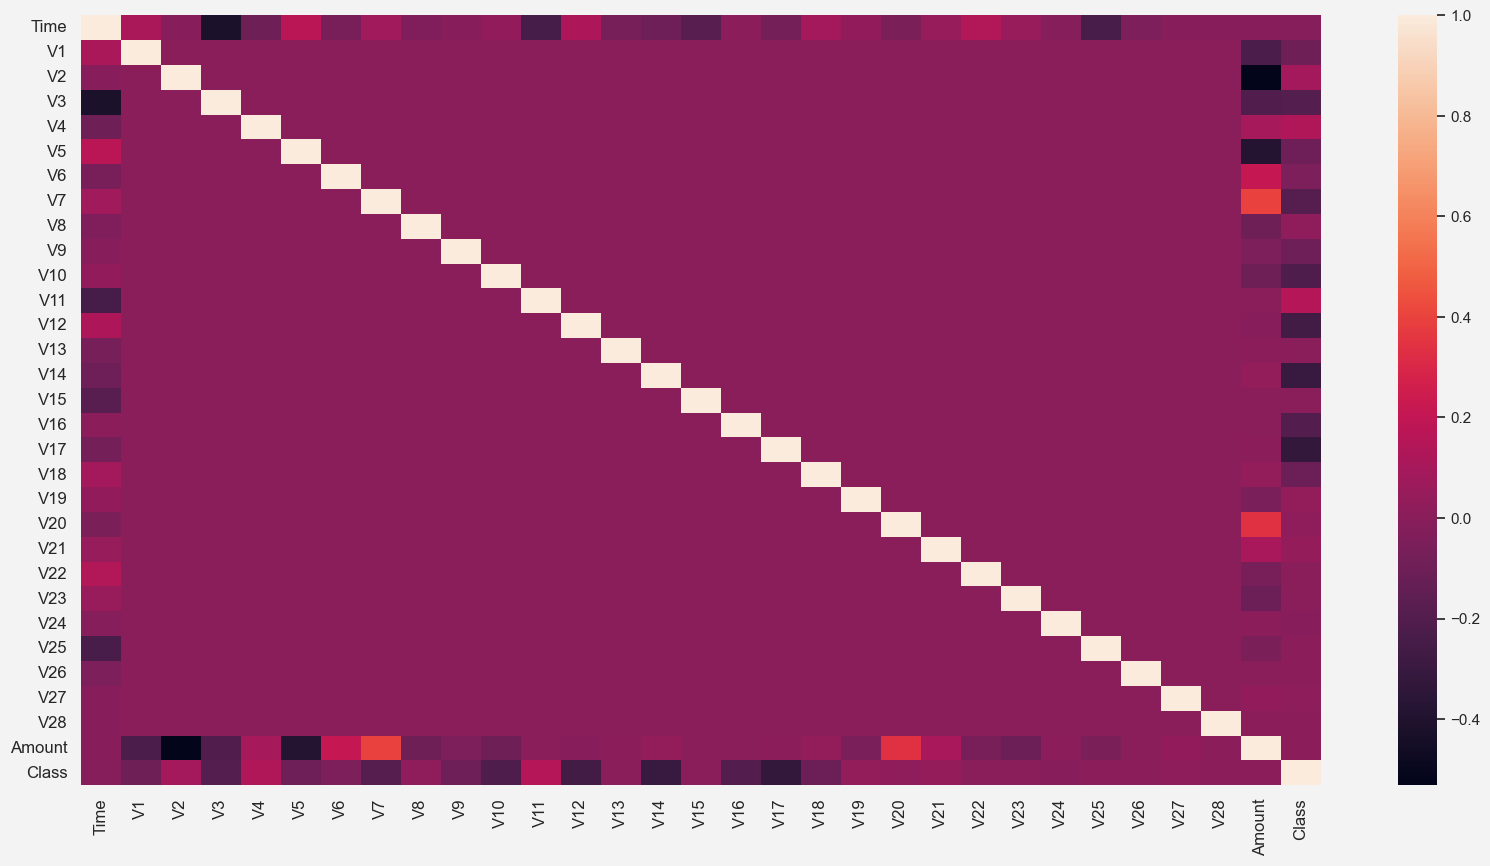

In [72]:
# Evaluate the correlation between different parameters in the dataset if any 

creditcard_corr=df.corr()
fig = plt.figure(figsize=(20,10))
fig.set_facecolor("#F3F3F3")
ax=sns.heatmap(creditcard_corr)
plt.tick_params(labelsize=12)
plt.show();

Here we will observe the distribution of our classes

Text(0.5, 1.0, 'Distribution of Class')

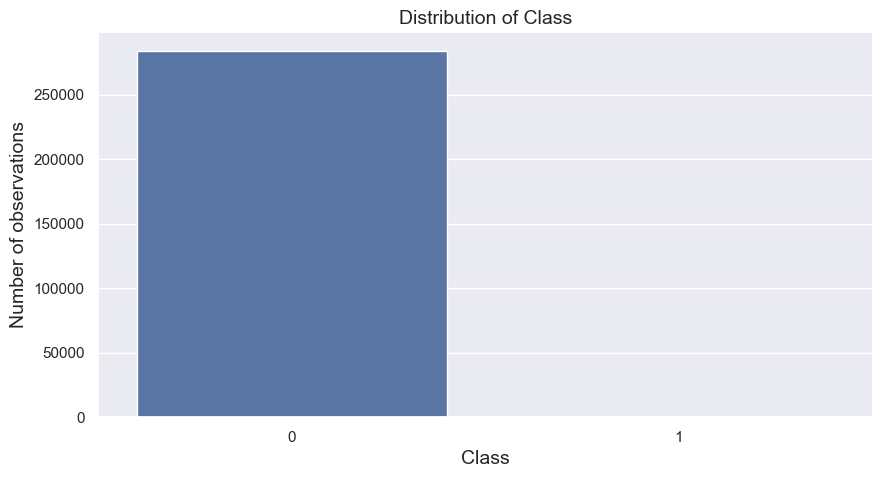

In [73]:
fig = plt.figure(figsize=(10,5))
ax = sns.countplot(x="Class",  data=df)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of observations', fontsize=14)
plt.title('Distribution of Class', fontsize =14)

In [74]:
# Separate data of Non-Fraudulent and Fraudulent to check the skewness and kurtosis

Non_Fraudulent= df[df["Class"] == 0]
print ("Non_Fraudulent:", Non_Fraudulent.shape);
Fraudulent= df[df["Class"] == 1]
print ("Fraudulent:", Fraudulent.shape);

Non_Fraudulent: (284315, 31)
Fraudulent: (492, 31)


In [75]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


In [76]:
print("Amount details of  fraudulent transactions :");
print(df[df["Class"] == 1].Amount.describe());

Amount details of  fraudulent transactions :
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [77]:
print("Amount details of  non fraudulent transactions :");
print(df[df["Class"] == 0].Amount.describe());

Amount details of  non fraudulent transactions :
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.0, 'Time VS Amount')

<Figure size 1000x500 with 0 Axes>

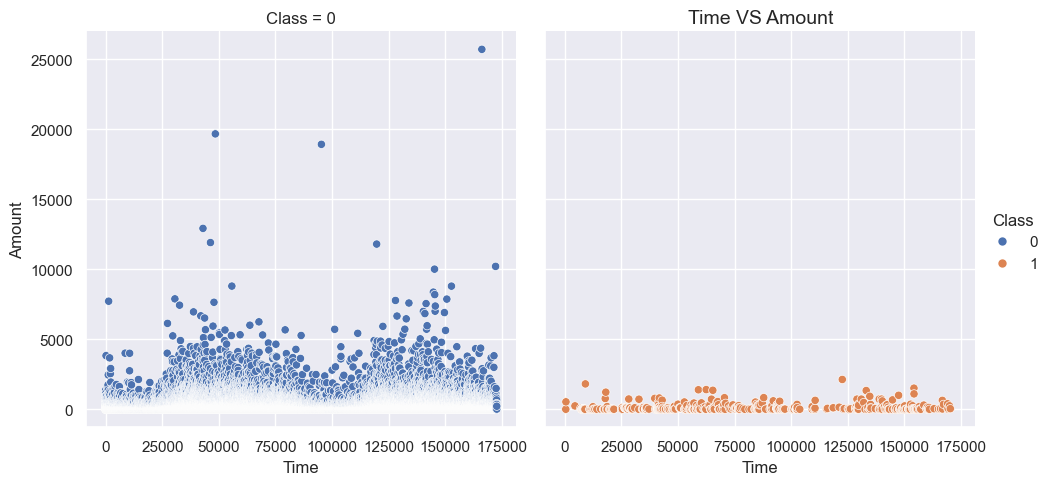

In [78]:
fig = plt.figure(figsize=(10,5))
sns.relplot(x="Time", y="Amount",
                 col="Class", hue="Class",
                 kind="scatter", data=df)
plt.title('Time VS Amount', fontsize =14)

Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables 1-12


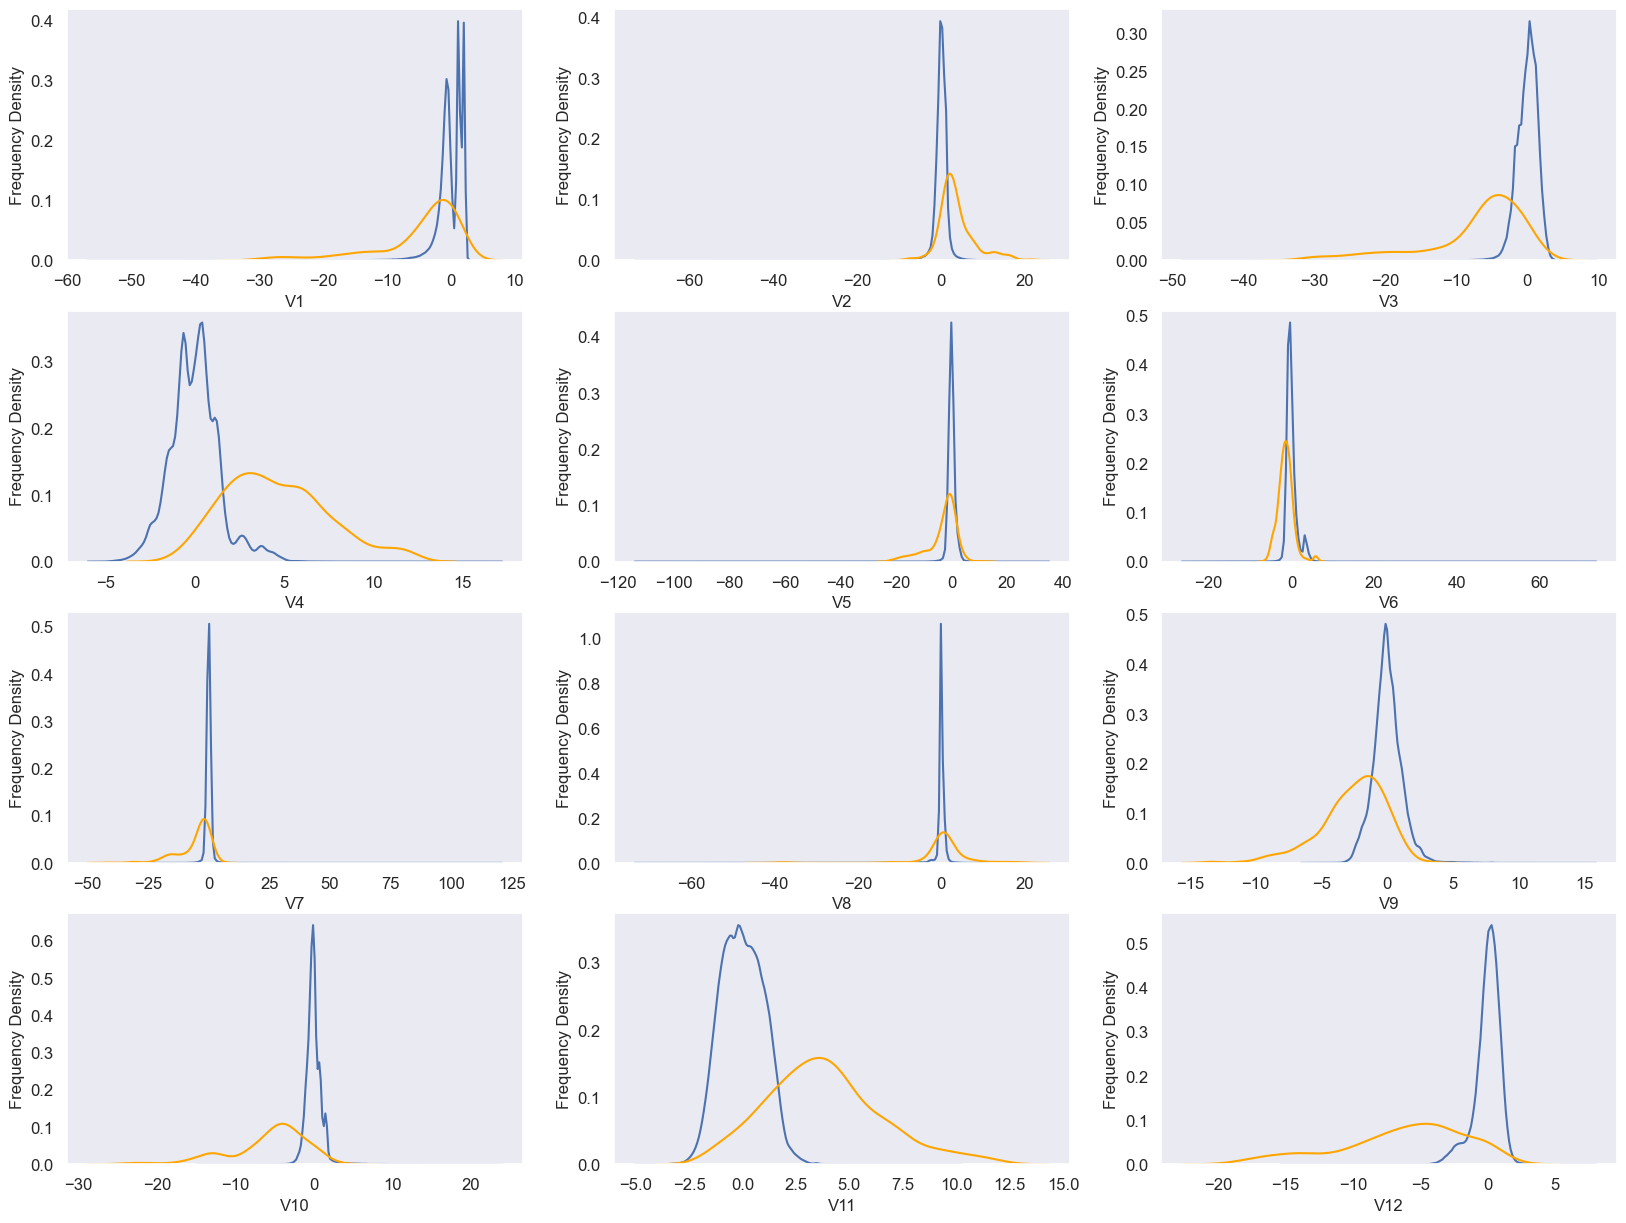

In [79]:
# Evaluate the data distributions of each variable

print("Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables 1-12");
fig = plt.figure(figsize=(20,15))
x = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12']
i = 1
for col in x:
    plt.subplot(4,3,i)
    g=sns.kdeplot(df.loc[(df["Class"] == 0),col] , color='b',label='Non Fraudulent')
    g=sns.kdeplot(df.loc[(df['Class'] == 1),col] , color='orange', label='Fraudulent')
    g.grid(False)
    plt.ylabel("Frequency Density", fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.tick_params(labelsize=12)
    i = i+1

plt.show();

Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables 13-24


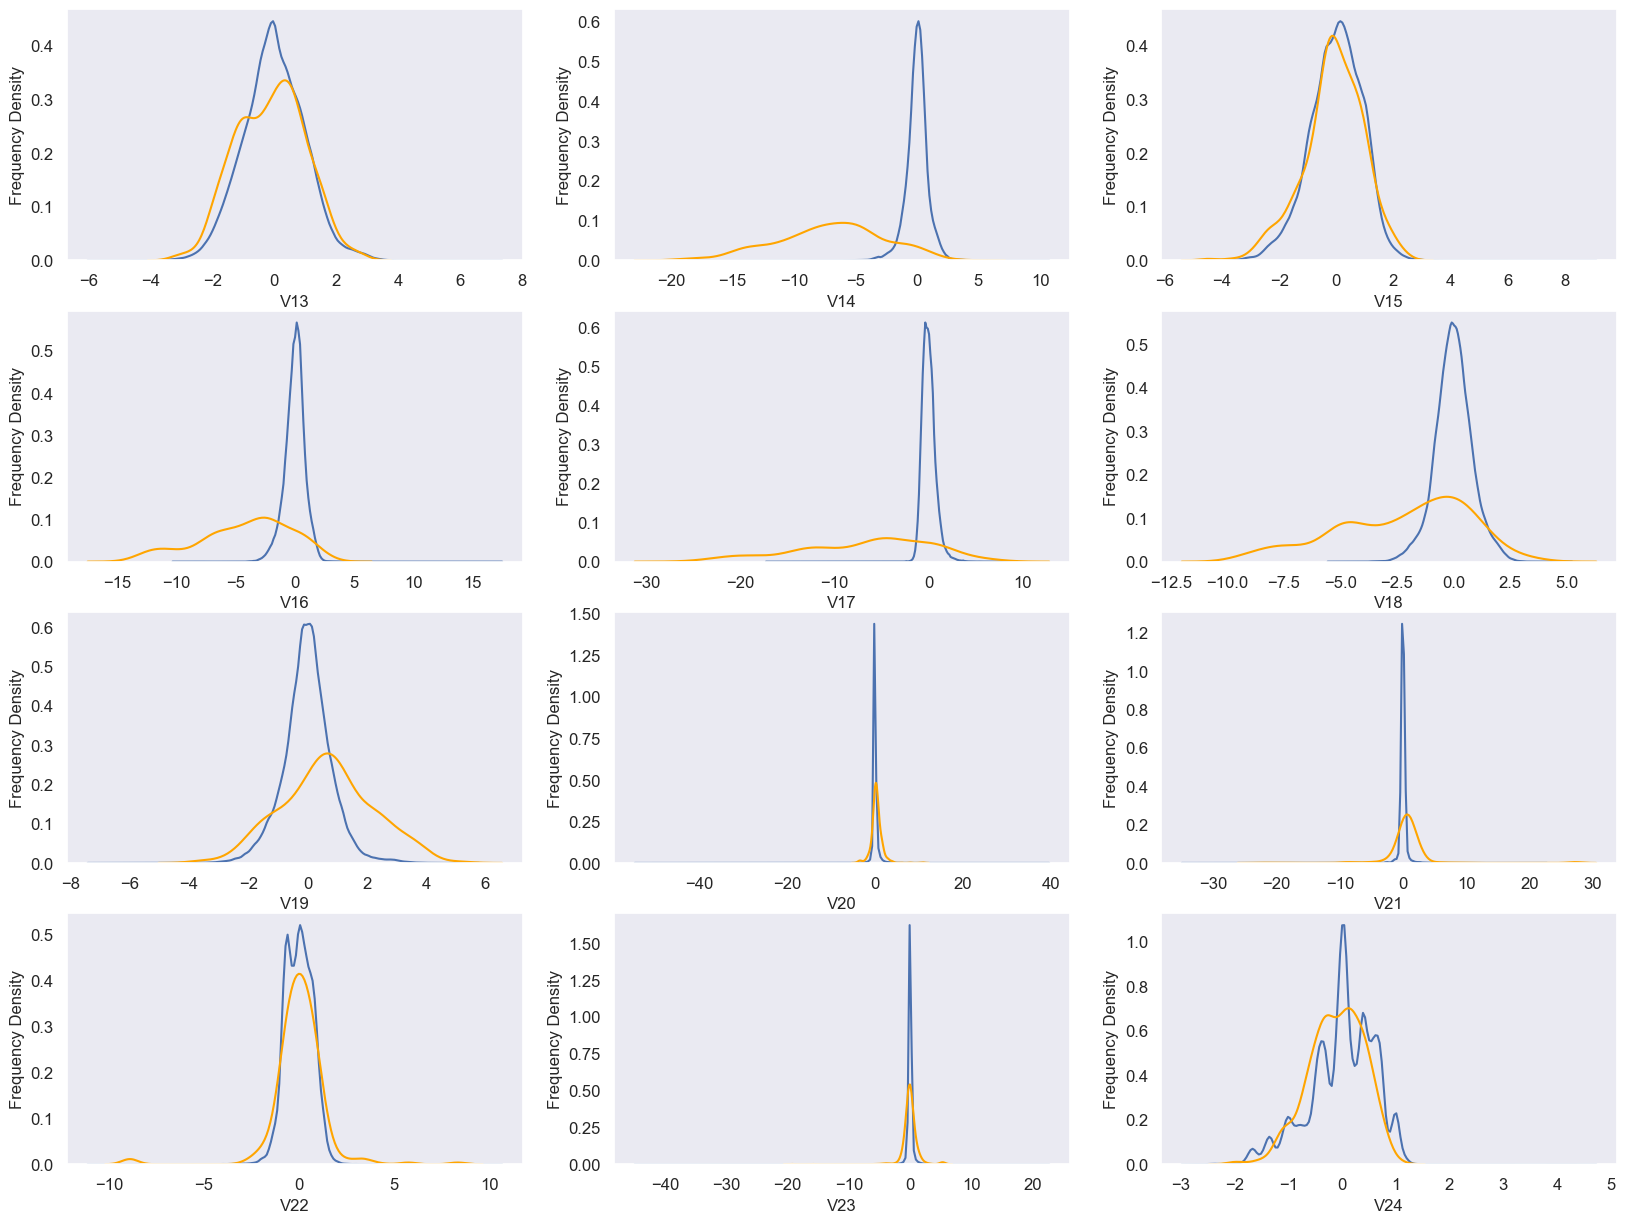

In [80]:
# Evaluate the data distributions of each variable

print("Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables 13-24");
fig = plt.figure(figsize=(20,15))
x = ['V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24']
i = 1
for col in x:
    plt.subplot(4,3,i)
    g=sns.kdeplot(df.loc[(df["Class"] == 0),col] , color='b',label='Non Fraudulent')
    g=sns.kdeplot(df.loc[(df['Class'] == 1),col] , color='orange', label='Fraudulent')
    g.grid(False)
    plt.ylabel("Frequency Density", fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.tick_params(labelsize=12)
    i = i+1

plt.show();

Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables 25-28


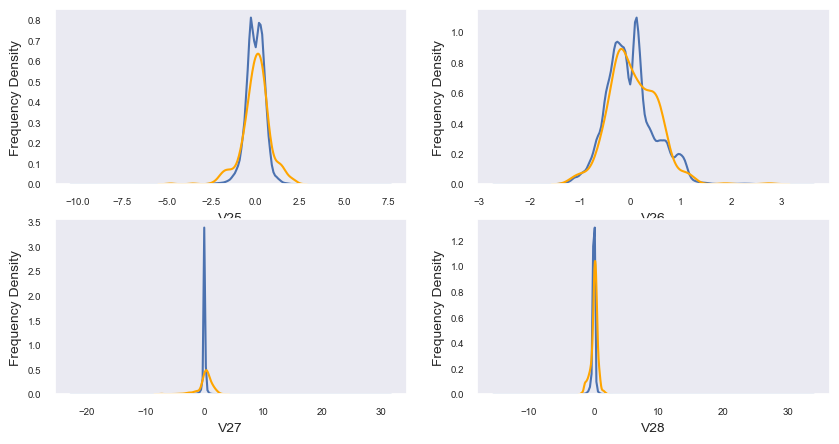

In [81]:
# Evaluate the data distributions of each variable

print("Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables 25-28");
fig = plt.figure(figsize=(10,5))
x = ['V25','V26','V27','V28']
i = 1
for col in x:
    plt.subplot(2,2,i)
    g=sns.kdeplot(df.loc[(df["Class"] == 0),col] , color='b',label='Non Fraudulent')
    g=sns.kdeplot(df.loc[(df['Class'] == 1),col] , color='orange', label='Fraudulent')
    g.grid(False)
    plt.ylabel("Frequency Density", fontsize=10)
    plt.xlabel(col, fontsize=10)
    plt.tick_params(labelsize=7)
    i = i+1

plt.show();

Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables Time-Amount


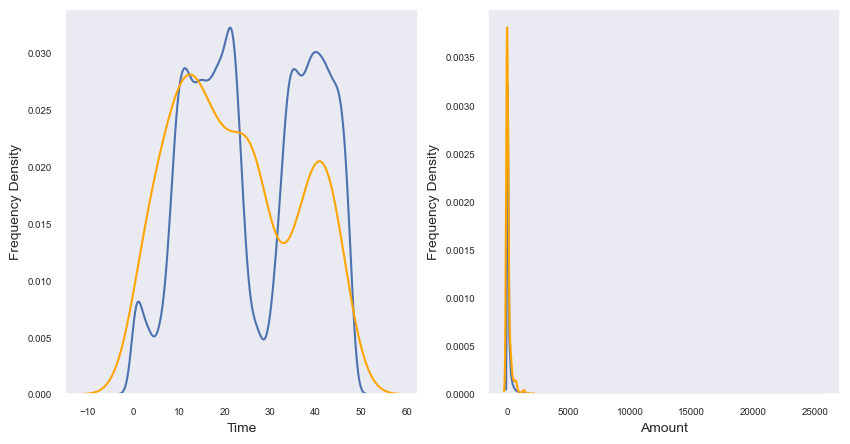

In [82]:
# Evaluate the data distributions of each variable

print("Plotting the Shape of a Distribution of each Variable in 'Non-Fraudulent' & 'Fraudulent': Variables Time-Amount");
fig = plt.figure(figsize=(10,5))
x = ['Time','Amount']
df['Time'] = df['Time']/3600 #convert to hours
i = 1
for col in x:
    plt.subplot(1,2,i)
    g=sns.kdeplot(df.loc[(df["Class"] == 0),col] , color='b',label='Non Fraudulent')
    g=sns.kdeplot(df.loc[(df['Class'] == 1),col] , color='orange', label='Fraudulent')
    g.grid(False)
    plt.ylabel("Frequency Density", fontsize=10)
    plt.xlabel(col, fontsize=10)
    plt.tick_params(labelsize=7)
    i = i+1

plt.show();

In [83]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


,Correlation
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413


In [84]:
# Drop unnecessary columns
df.drop('Time', axis = 1, inplace= True)


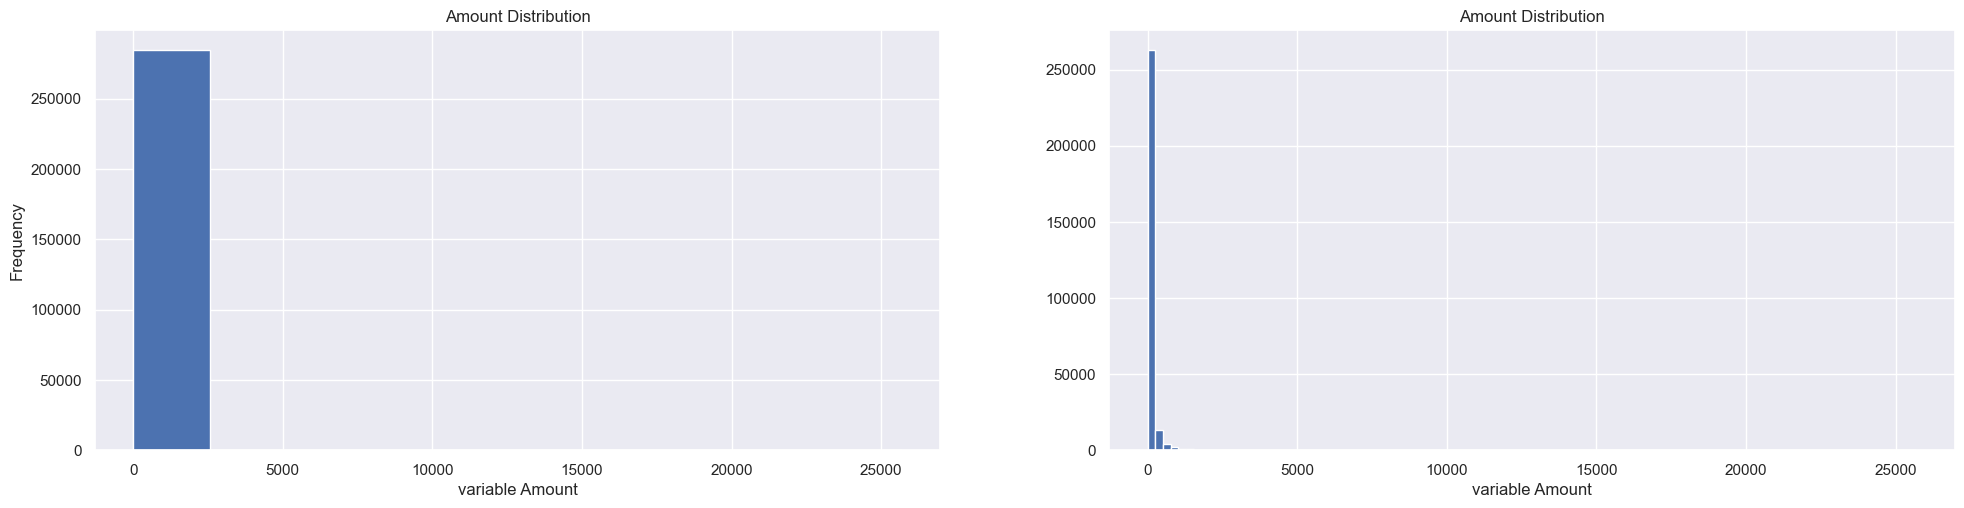

In [85]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()


### Splitting the data into train & test data

In [158]:
#Create X and y dataset for independent and dependent data
y= df['Class']
X = df.drop(['Class'], axis=1)

In [87]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [202]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [186]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [107]:
#Create a dictionary to store results
df_Results = dict({'Data_Imbalance_Handiling':[],'Model':[],'Accuracy':[],'roc_value':[],'threshold':[]})

In [108]:
def merge_dicts(dict1, dict2):
    for key in dict1.keys():
        dict1[key].append(dict2[key])
    return dict1

In [92]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [93]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = merge_dicts(df_Results,dict({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}))

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = merge_dicts(df_Results,dict({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}))
  return df_Results

In [94]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = merge_dicts(df_Results,dict({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}))

  return df_Results




In [95]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = merge_dicts(df_Results,dict({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}))

  return df_Results

In [96]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = merge_dicts(df_Results,dict({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}))

  return df_Results
      


In [97]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = merge_dicts(df_Results,dict({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}))

  return df_Results

In [98]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = merge_dicts(df_Results,dict({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}))

  return df_Results
  



In [203]:
from sklearn.preprocessing import StandardScaler

def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical].values.reshape(-1,1))
    return dataset

df = feature_scaling(df, 'Amount')

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [204]:
# Skewness observed in the distribution hence will use power transformation by 'yeo-johnson' method

creditcard_pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)
creditcard_pt.fit(X_train)

X_train_pt = creditcard_pt.transform(X_train)
X_test_pt = creditcard_pt.transform(X_test)

y_train_pt = y_train


In [101]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=X.columns)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=X.columns)

## Model Building
- Build different models on the imbalanced dataset and see the result

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9835809723709812
Max auc_roc for l1: 0.9853219439271429
Parameters for l2 regularisations
[[-0.09181889 -0.0712374  -0.28531014  0.55091475  0.02781282  0.01048326
  -0.06526899 -0.20404618 -0.19129152 -0.20367634  0.1699086  -0.4842302
  -0.12688193 -0.67607523 -0.07608236 -0.17854077 -0.08488114  0.03807597
  -0.03595016 -0.02173413  0.10387455  0.09976224 -0.03232496 -0.02864527
   0.01085616  0.0077547  -0.04525285 -0.02264856  0.0207067 ]]
[-8.0670714]
{1: array([[0.90480168, 0.90467957, 0.90467957, 0.90467957, 0.90467957,
        0.90507886, 0.96766036, 0.9925943 , 0.99533679, 0.99629898,
        0.99629898, 0.99629898, 0.99629898, 0.99629898, 0.99629898,
        0.99629898, 0.99629898, 0.99629898, 0.99629898, 0.99629898],
       [0.93560593, 0.93560205, 0.93560205, 0.93560205, 0.93560335,
        0.9359511 , 0.96663754, 0.98015472, 0.97723953, 0.97641733,
        0.97641733, 0.97641733, 0.97641733, 0.9764173

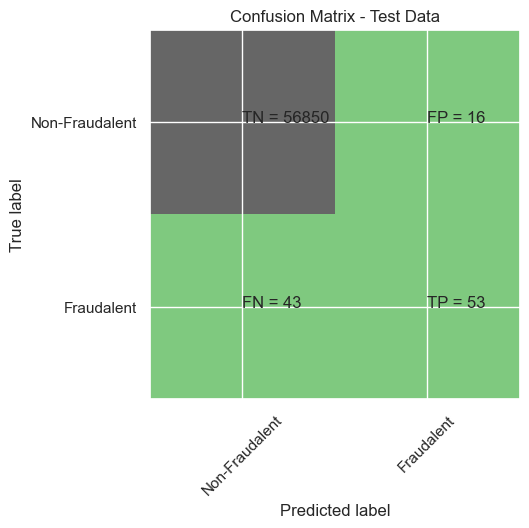

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.55      0.64        96

    accuracy                           1.00     56962
   macro avg       0.88      0.78      0.82     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


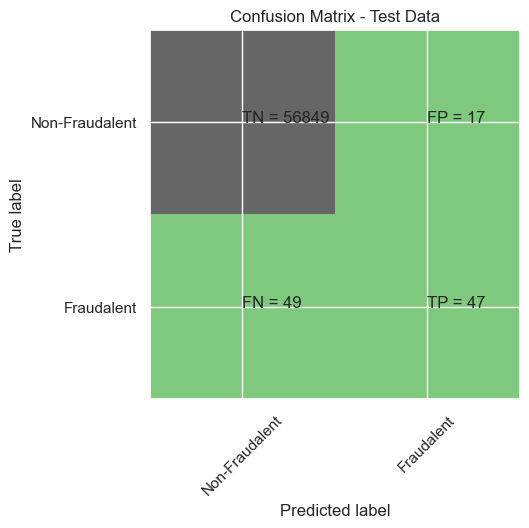

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9663073057714628
l2 threshold: 0.0010291757515746606
ROC for the test dataset 96.6%


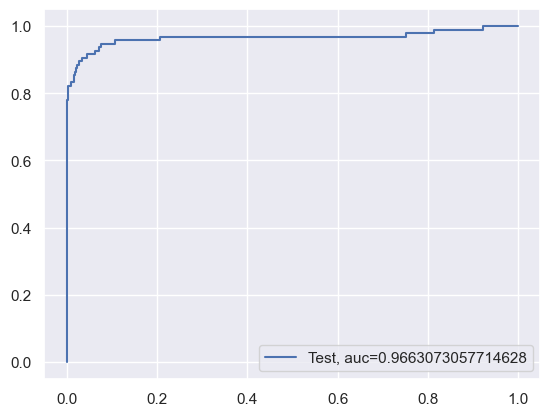

l1 roc_value: 0.9715465963844828
l1 threshold: 0.009045426444491592
ROC for the test dataset 97.2%


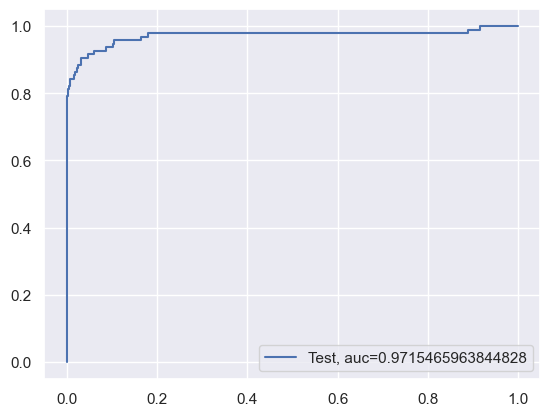

Time Taken by Model: --- 86.21413207054138 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9993504441557529
Confusion Matrix


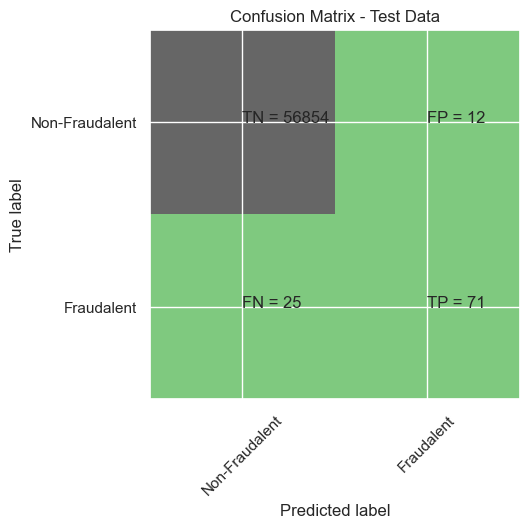

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.86      0.74      0.79        96

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.9008513435093026
KNN threshold: 0.2
ROC for the test dataset 90.1%


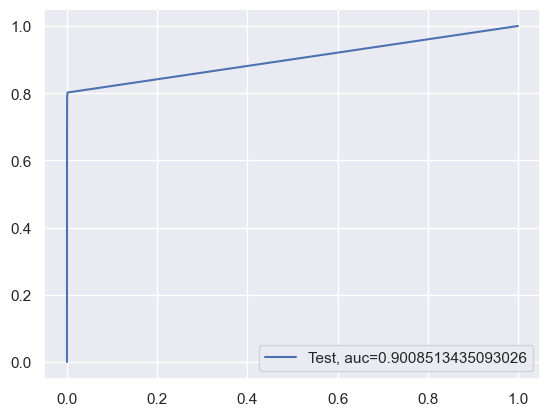

Time Taken by Model: --- 31.742968559265137 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989993328885924
Confusion Matrix


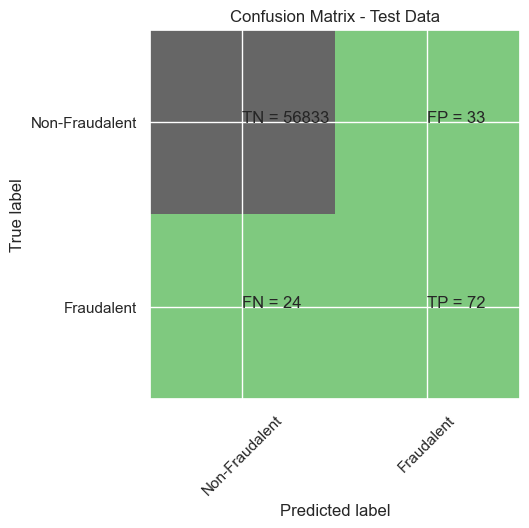

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.69      0.75      0.72        96

    accuracy                           1.00     56962
   macro avg       0.84      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8747098441951253
Tree threshold: 1.0
ROC for the test dataset 87.5%


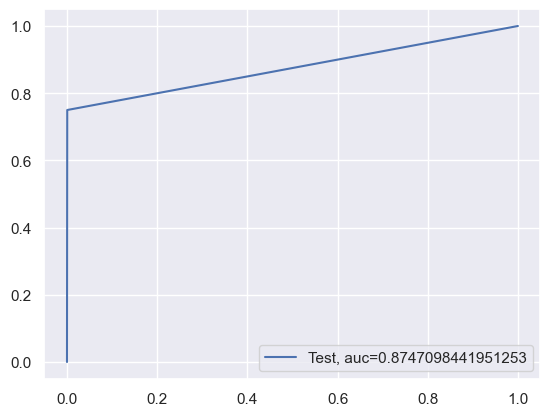

entropy score: 0.9991046662687406
Confusion Matrix


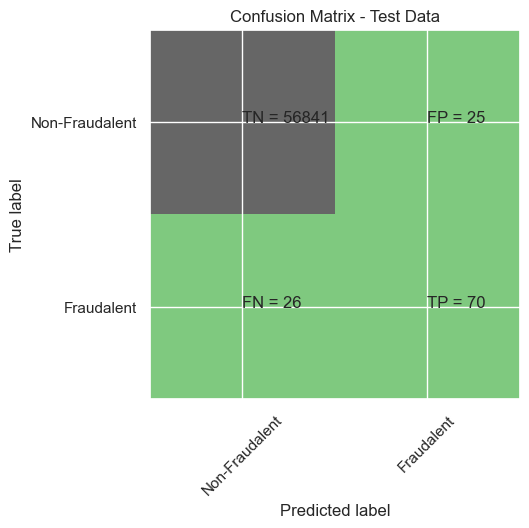

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.73      0.73        96

    accuracy                           1.00     56962
   macro avg       0.87      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643635183296404
Tree threshold: 1.0
ROC for the test dataset 86.4%


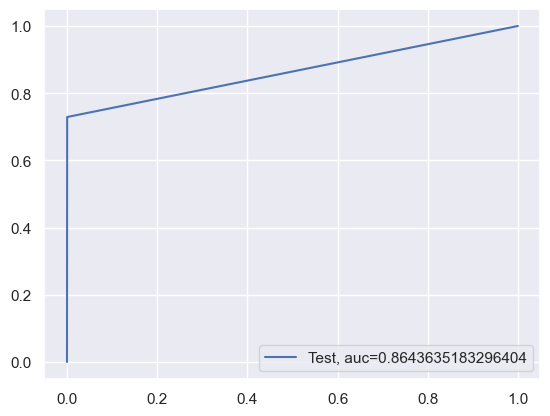

Time Taken by Model: --- 22.45212435722351 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


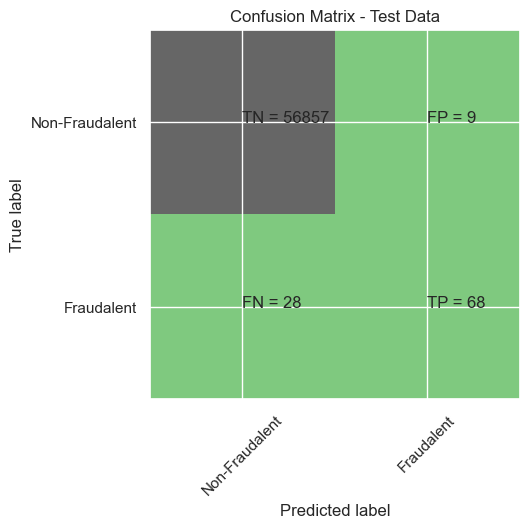

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.9250142330214891
Random Forest threshold: 0.01
ROC for the test dataset 92.5%


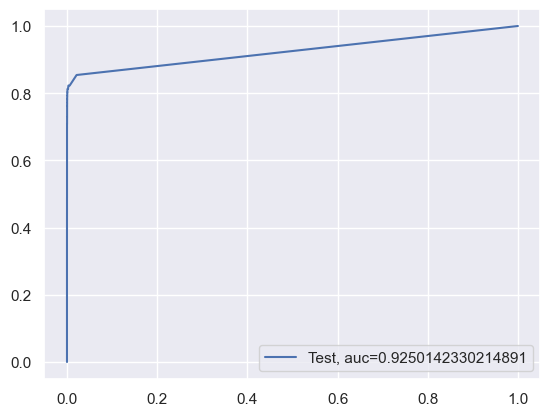

Time Taken by Model: --- 213.22896218299866 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999420666409185
Confusion Matrix


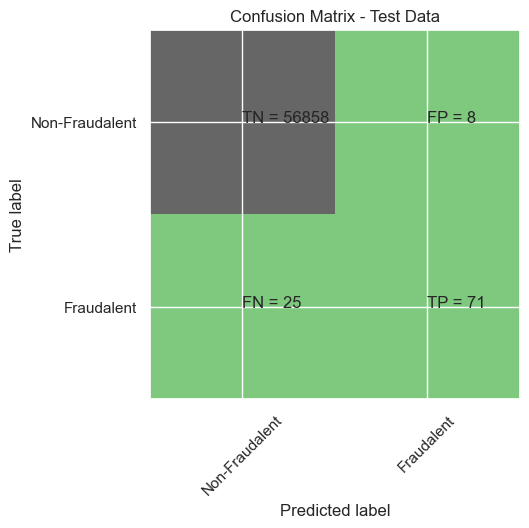

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9723599118981465
XGBoost threshold: 3.55349293386098e-05
ROC for the test dataset 97.2%


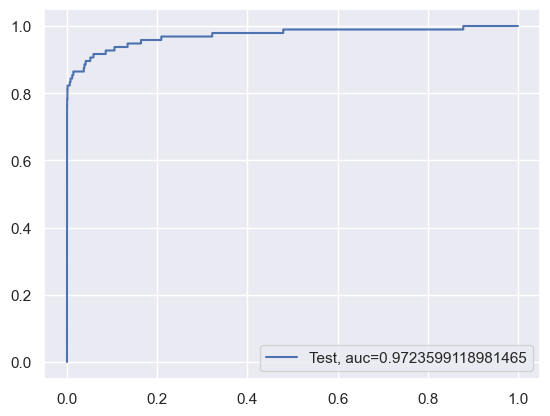

Time Taken by Model: --- 1.3291032314300537 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985779993679997
Confusion Matrix


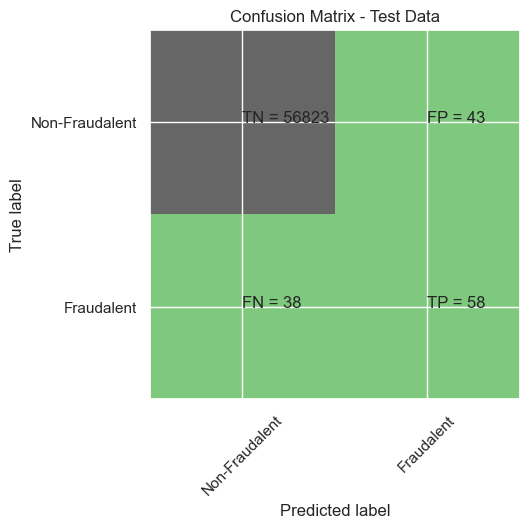

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.79      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8876203120786879
SVM threshold: 0.0007661941863427908
ROC for the test dataset 88.8%


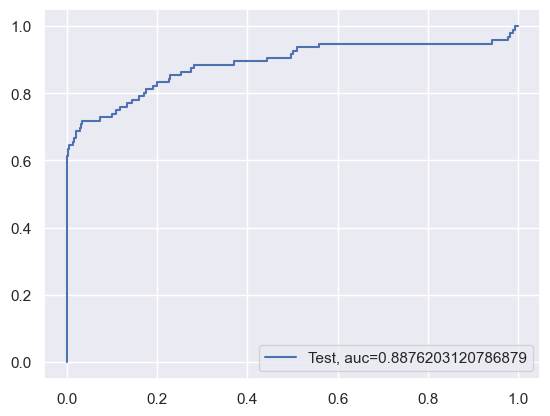

Time Taken by Model: --- 65.82259750366211 seconds ---


In [109]:
import time

#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [116]:
pd.DataFrame(df_Results)

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966307,0.001029
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971547,0.009045
2,Power Transformer,KNN,0.999350,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998999,0.874710,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000
5,Power Transformer,Random Forest,0.999350,0.925014,0.010000
6,Power Transformer,XGBoost,0.999421,0.972360,0.000036
7,Power Transformer,SVM,0.998578,0.887620,0.000766


# Perform cross validation with RepeatedKFold

In [117]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     1      2      3 ... 284803 284804 284805] TEST: [     0      6      7 ... 284791 284799 284806]
TRAIN: [     0      3      4 ... 284802 284804 284806] TEST: [     1      2     11 ... 284797 284803 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5      9     15 ... 284790 284793 284802]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     3      4     31 ... 284800 284801 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    10     12     17 ... 284756 284786 284798]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     4      7     14 ... 284800 284802 284806]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1     13     21 ... 284785 284786 284795]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     5      6      8 ... 284784 284796 284805]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0     10     11 ... 284767 284783 284803]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9836080504665737
Max auc_roc for l1: 0.9817256006946149
Parameters for l2 regularisations
[[-4.50226427e-03  3.87554866e-02 -8.48267782e-02  2.39263596e-01
   8.90239184e-02 -4.39419339e-02 -3.86510740e-02 -1.23445307e-01
  -7.85853854e-02 -1.63303343e-01  1.35943134e-01 -1.89324431e-01
  -4.38072091e-02 -3.73370966e-01 -1.06136702e-02 -9.71430022e-02
  -7.34121543e-02  2.77117412e-03  1.59598971e-02 -1.10364456e-02
   4.48327068e-02  2.44473356e-02 -1.27202105e-02 -1.07884324e-02
  -9.08601184e-03  6.11425861e-03 -1.12878109e-02 -3.52584641e-03
   3.09871581e-04]]
[-7.36934041]
{1: array([[0.63038228, 0.6320938 , 0.65586528, 0.80753219, 0.9601739 ,
        0.99274748, 0.99494908, 0.99570404, 0.99669063, 0.99607294,
        0.99607294, 0.99607294, 0.99607294, 0.99607294, 0.99607294,
        0.99607294, 0.99607294, 0.99607294, 0.99607294, 0.99607294],
       [0.66083791, 0.66219439, 0.68068849, 0.8009009 , 0.9560770

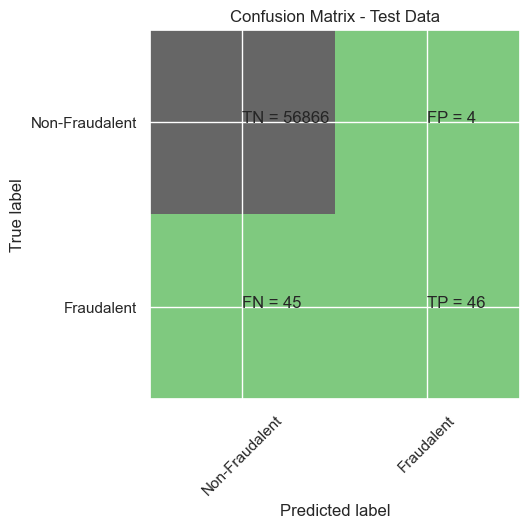

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.92      0.51      0.65        91

    accuracy                           1.00     56961
   macro avg       0.96      0.75      0.83     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9991748740366215
Confusion Matrix


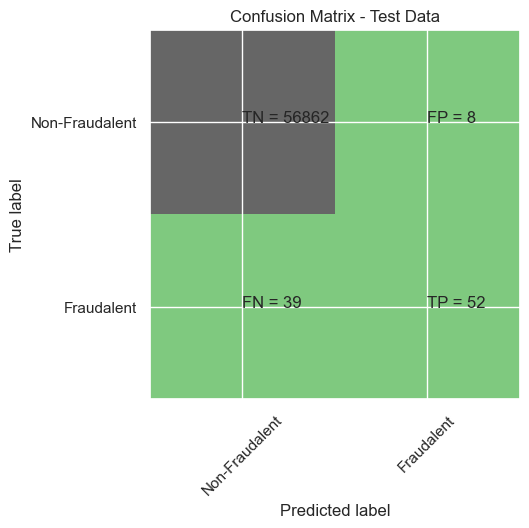

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.87      0.57      0.69        91

    accuracy                           1.00     56961
   macro avg       0.93      0.79      0.84     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9870914385421156
l2 threshold: 0.0017025078723269392
ROC for the test dataset 98.7%


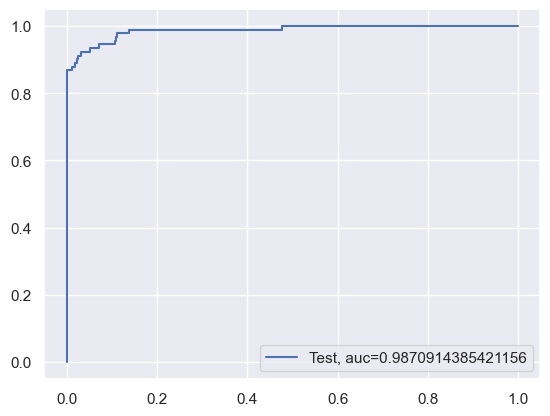

l1 roc_value: 0.9522054347973111
l1 threshold: 0.011446550426303756
ROC for the test dataset 95.2%


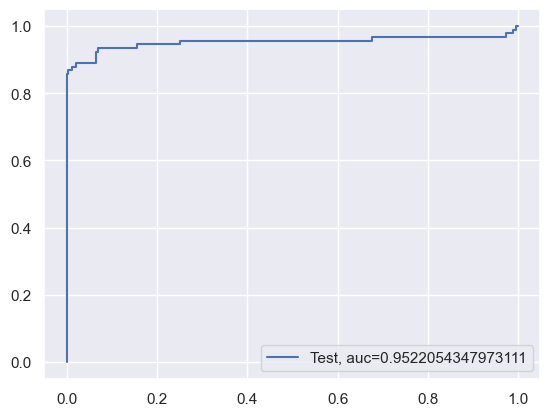

Time Taken by Model: --- 171.97588443756104 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.999420656238479
Confusion Matrix


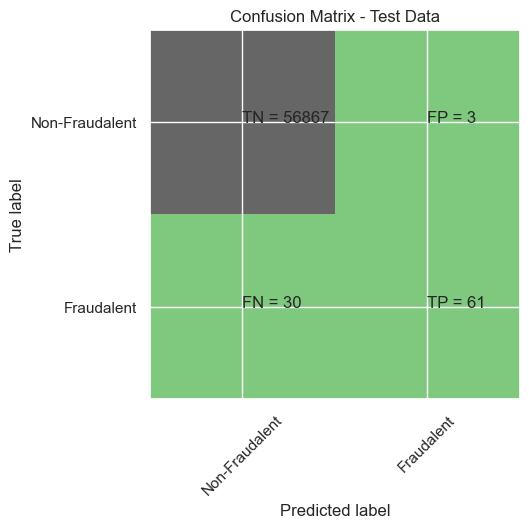

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.95      0.67      0.79        91

    accuracy                           1.00     56961
   macro avg       0.98      0.84      0.89     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.9064636524017569
KNN threshold: 0.2
ROC for the test dataset 90.6%


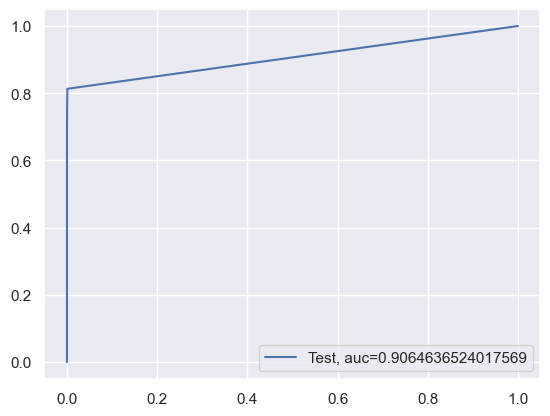

Time Taken by Model: --- 31.734711170196533 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9990519829356929
Confusion Matrix


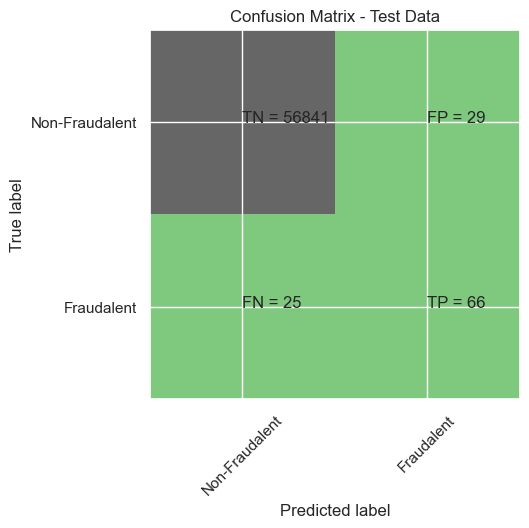

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.69      0.73      0.71        91

    accuracy                           1.00     56961
   macro avg       0.85      0.86      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8623823951676949
Tree threshold: 1.0
ROC for the test dataset 86.2%


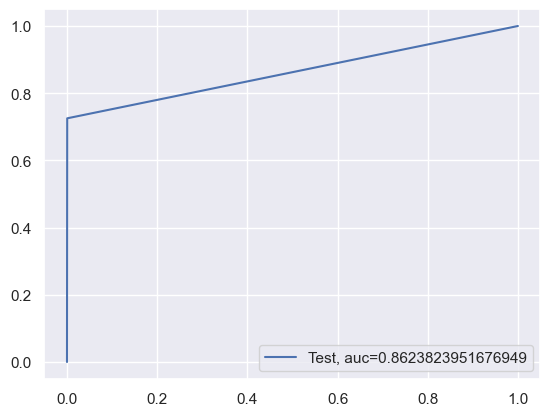

entropy score: 0.9992275416513052
Confusion Matrix


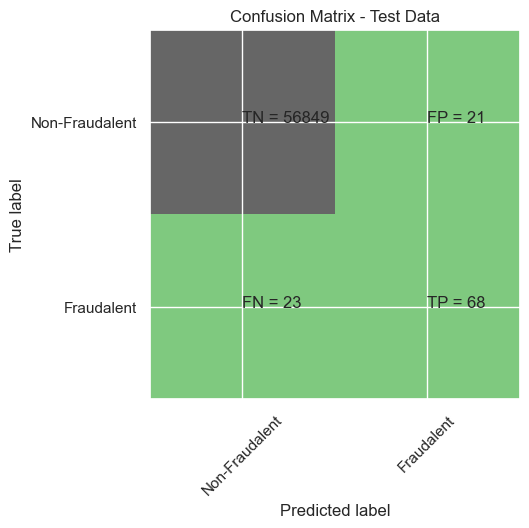

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.76      0.75      0.76        91

    accuracy                           1.00     56961
   macro avg       0.88      0.87      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8734417420104075
Tree threshold: 1.0
ROC for the test dataset 87.3%


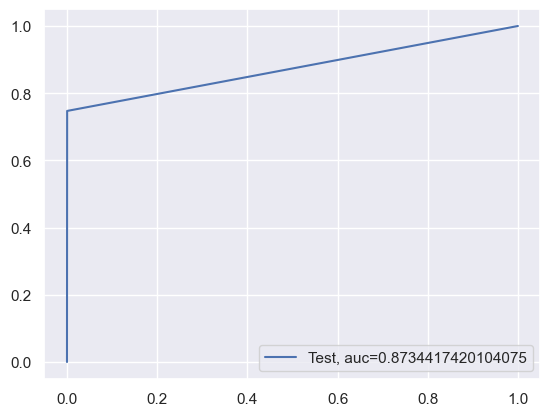

Time Taken by Model: --- 22.649363040924072 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995962149540913
Confusion Matrix


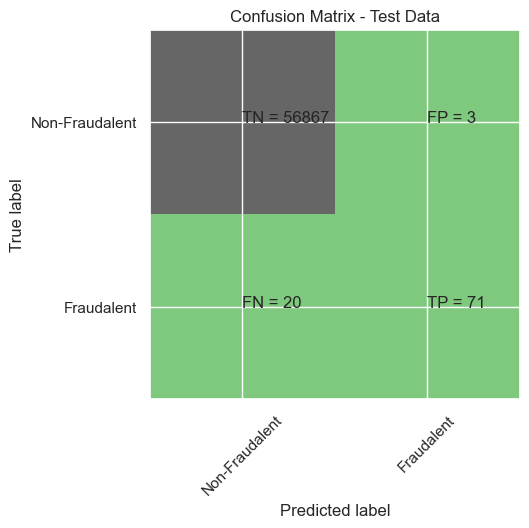

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.96      0.78      0.86        91

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9491137489203253
Random Forest threshold: 0.03
ROC for the test dataset 94.9%


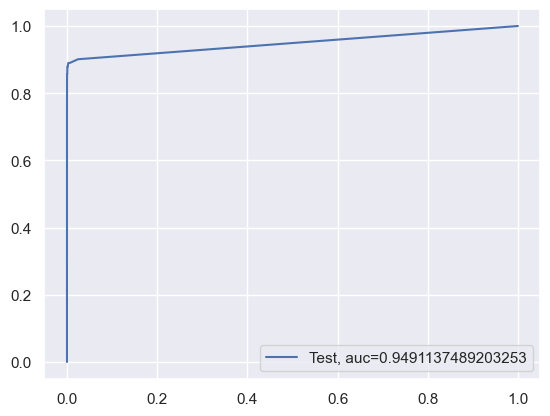

Time Taken by Model: --- 219.61620473861694 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9996488825687752
Confusion Matrix


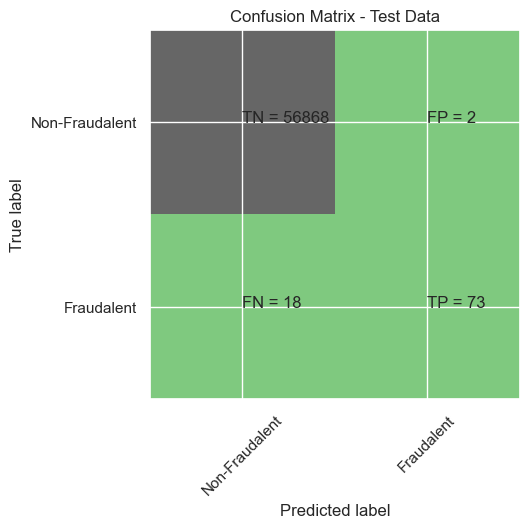

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.97      0.80      0.88        91

    accuracy                           1.00     56961
   macro avg       0.99      0.90      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9806910690856532
XGBoost threshold: 0.0002253980637760833
ROC for the test dataset 98.1%


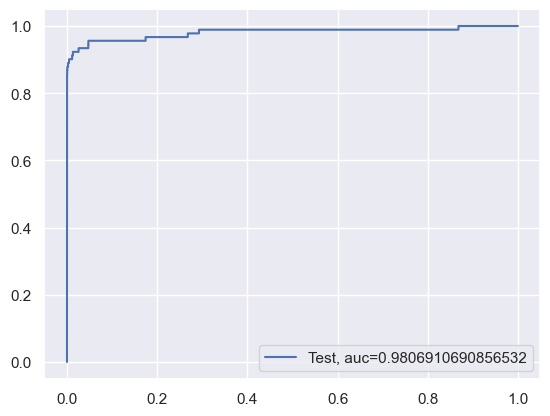

Time Taken by Model: --- 1.3222203254699707 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9984726391741718
Confusion Matrix


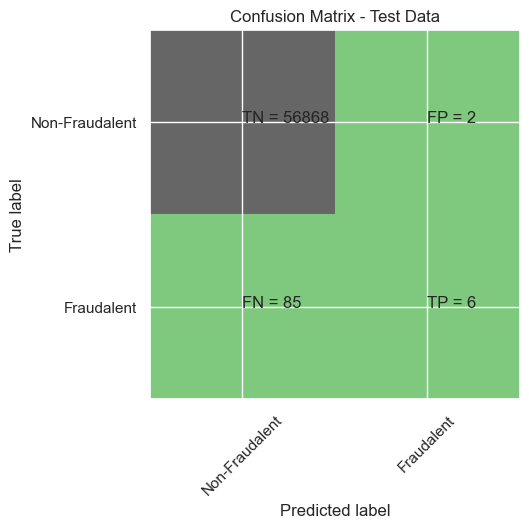

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.75      0.07      0.12        91

    accuracy                           1.00     56961
   macro avg       0.87      0.53      0.56     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.49350861904053395
SVM threshold: 0.004471016809767853
ROC for the test dataset 49.4%


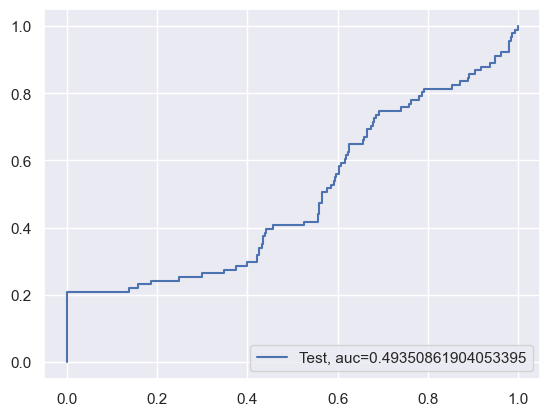

Time Taken by Model: --- 130.35334992408752 seconds ---


In [118]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [119]:
pd.DataFrame(df_Results)

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966307,0.001029
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971547,0.009045
2,Power Transformer,KNN,0.999350,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998999,0.874710,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000
5,Power Transformer,Random Forest,0.999350,0.925014,0.010000
6,Power Transformer,XGBoost,0.999421,0.972360,0.000036
7,Power Transformer,SVM,0.998578,0.887620,0.000766
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999140,0.987091,0.001703
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999175,0.952205,0.011447


In [120]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


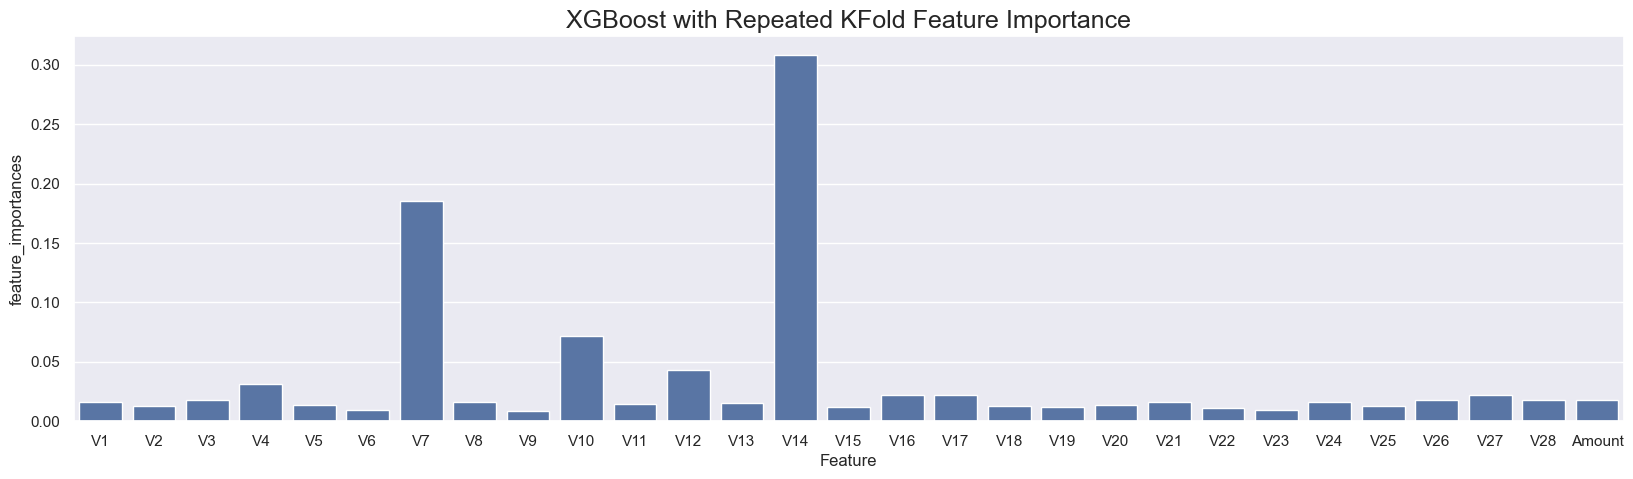

In [121]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

In [124]:
import pickle
import os
def export_model_to_pkl(model, filename):
    os.chdir('../models')
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
export_model_to_pkl(XGBmodel, 'XGBmodel.pkl')


# Perform cross validation with StratifiedKFold

In [122]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9827565909483766
Max auc_roc for l1: 0.9674949730621465
Parameters for l2 regularisations
[[ 0.00687118  0.06109997 -0.06701604  0.21789381  0.05384676 -0.03188839
  -0.02267845 -0.1147322  -0.06969902 -0.1634288   0.12753968 -0.19117655
  -0.03719024 -0.36012912  0.00365374 -0.08783644 -0.07293195 -0.0007911
   0.00391437 -0.02778637  0.03807507  0.02329032 -0.01169625 -0.00996206
  -0.0065975   0.0062745  -0.01013212 -0.00169643  0.00039437]]
[-7.40238339]
{1: array([[0.69891353, 0.70149499, 0.72141509, 0.84389929, 0.96686259,
        0.99058273, 0.99618304, 0.99483369, 0.99145525, 0.99151499,
        0.99151499, 0.99151499, 0.99151499, 0.99151499, 0.99151499,
        0.99151499, 0.99151499, 0.99151499, 0.99151499, 0.99151499],
       [0.60290955, 0.60404646, 0.62418615, 0.76517518, 0.91405801,
        0.95983011, 0.97487288, 0.9820415 , 0.98534743, 0.98191985,
        0.9791136 , 0.9791136 , 0.9791136 , 0.979113

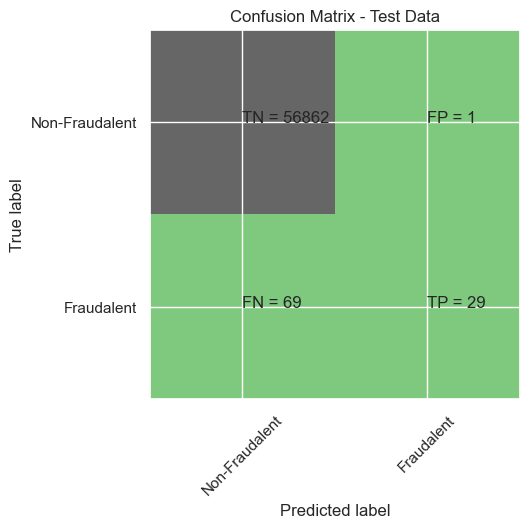

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9988588683485191
Confusion Matrix


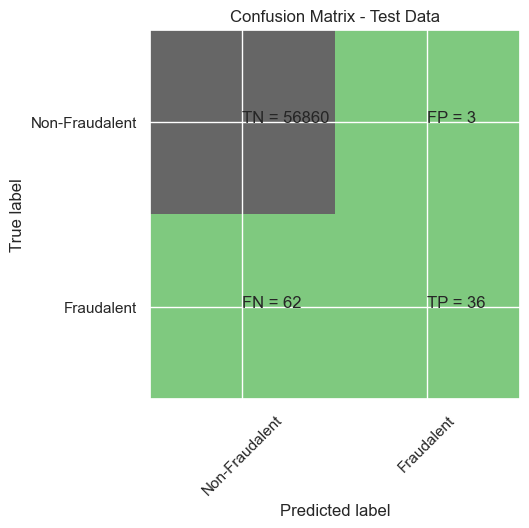

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.37      0.53        98

    accuracy                           1.00     56961
   macro avg       0.96      0.68      0.76     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833414504679525
l2 threshold: 0.0015928532352412707
ROC for the test dataset 98.3%


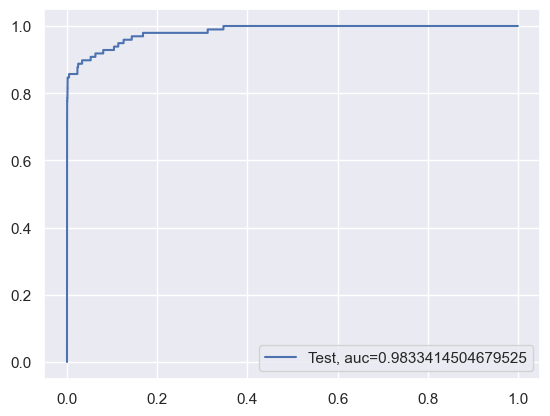

l1 roc_value: 0.9376666868847323
l1 threshold: 0.014337642491982433
ROC for the test dataset 93.8%


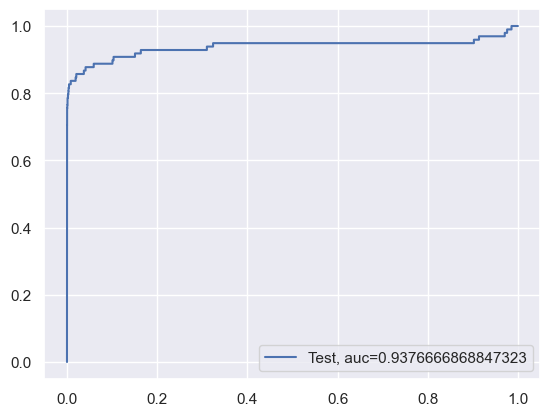

Time Taken by Model: --- 178.38825798034668 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9991222064219378
Confusion Matrix


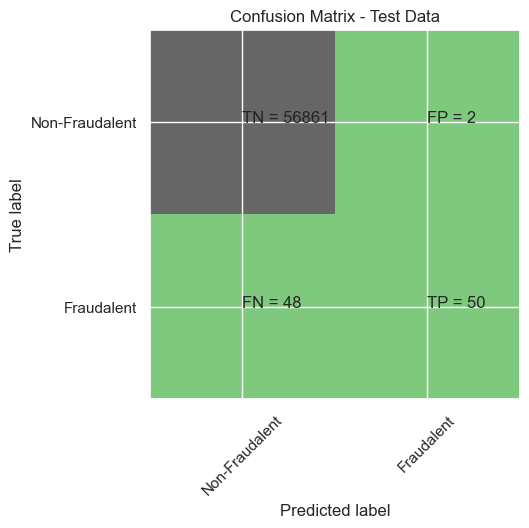

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.51      0.67        98

    accuracy                           1.00     56961
   macro avg       0.98      0.76      0.83     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8110050220957138
KNN threshold: 0.2
ROC for the test dataset 81.1%


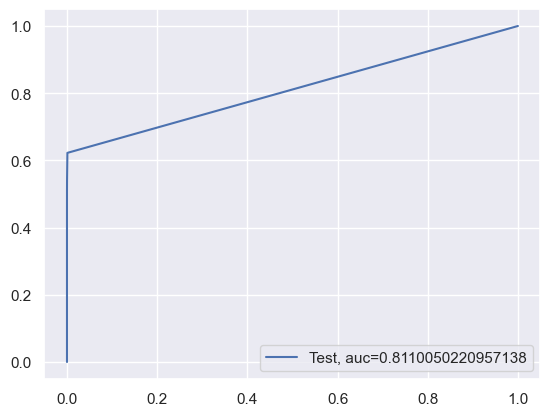

Time Taken by Model: --- 34.742679834365845 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989642035778866
Confusion Matrix


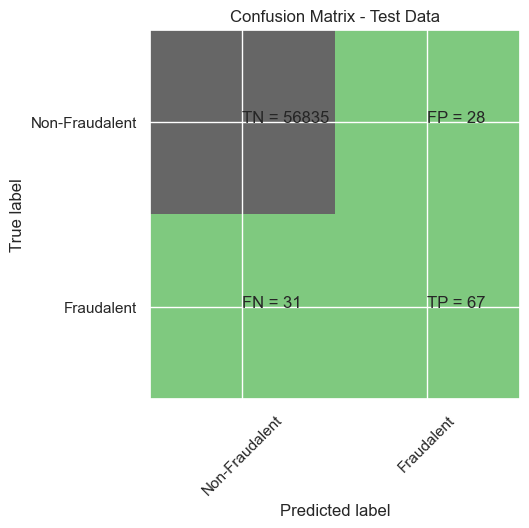

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.71      0.68      0.69        98

    accuracy                           1.00     56961
   macro avg       0.85      0.84      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8415905289010069
Tree threshold: 1.0
ROC for the test dataset 84.2%


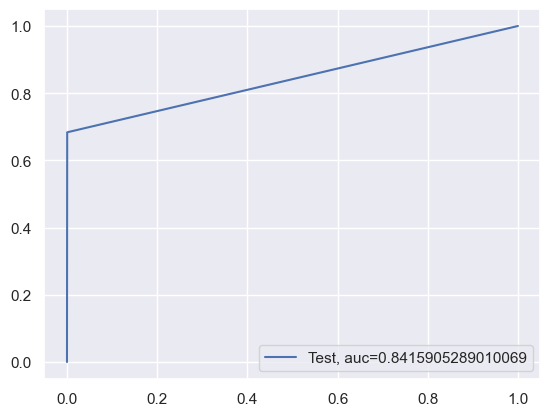

entropy score: 0.9990870946788153
Confusion Matrix


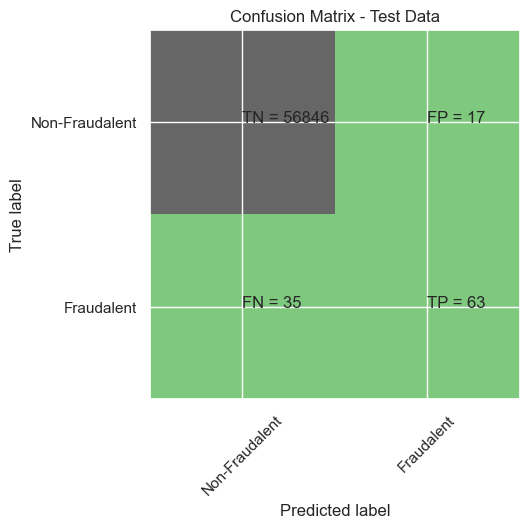

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.64      0.71        98

    accuracy                           1.00     56961
   macro avg       0.89      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212790893400429
Tree threshold: 1.0
ROC for the test dataset 82.1%


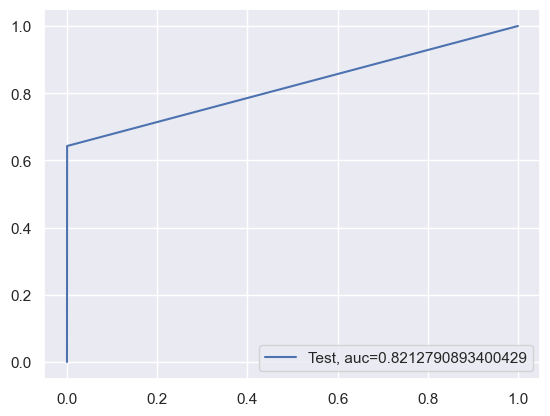

Time Taken by Model: --- 22.654136419296265 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


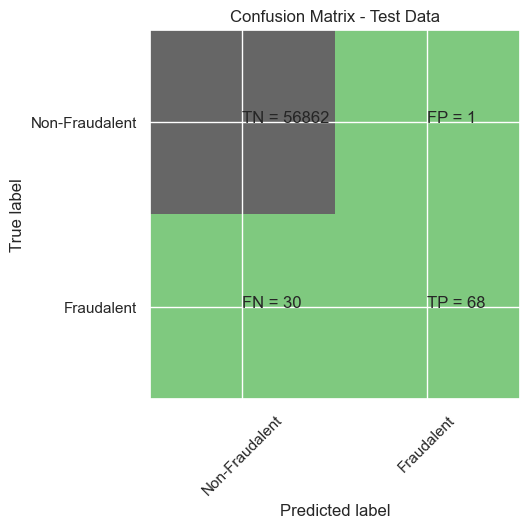

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9265156460910164
Random Forest threshold: 0.01
ROC for the test dataset 92.7%


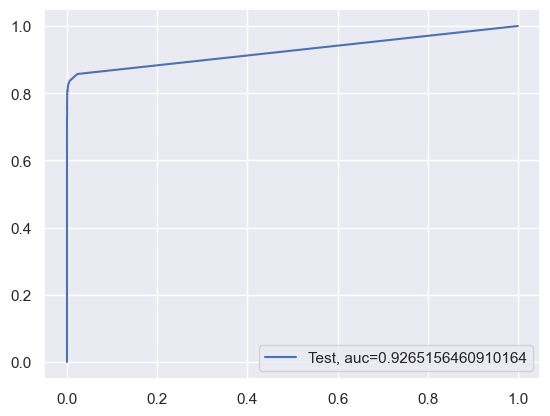

Time Taken by Model: --- 195.22738122940063 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


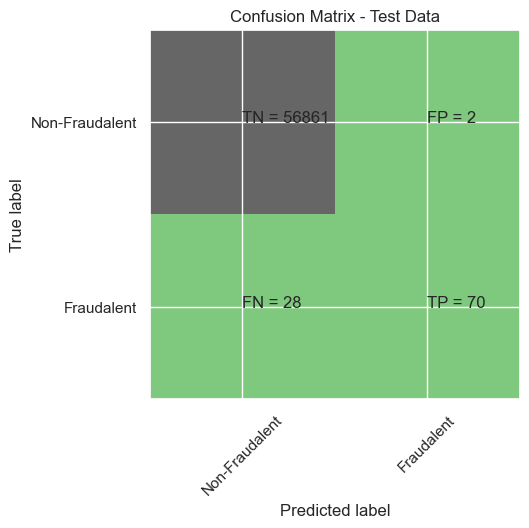

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.71      0.82        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9812878213909766
XGBoost threshold: 6.587481766473502e-05
ROC for the test dataset 98.1%


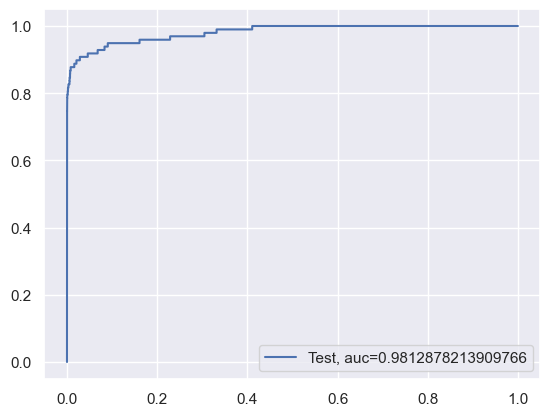

Time Taken by Model: --- 1.2941362857818604 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


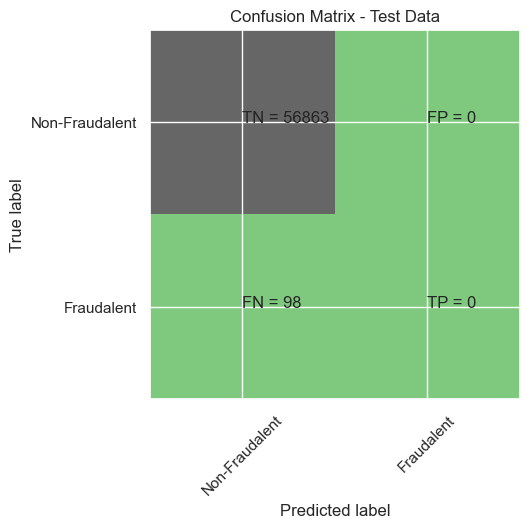

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961



C:\Users\akash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\akash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\akash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


SVM roc_value: 0.40214557940370105
SVM threshold: 0.001907428037789332
ROC for the test dataset 40.2%


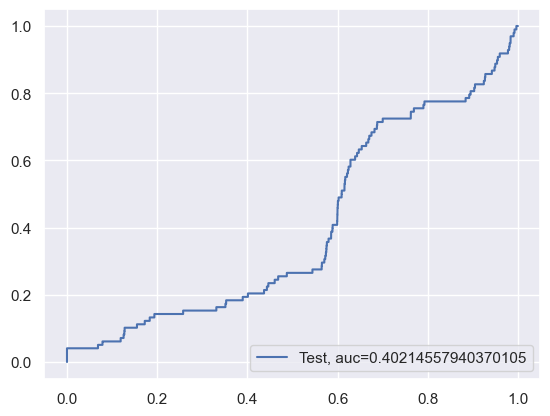

Time Taken by Model: --- 336.9014639854431 seconds ---


In [123]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
pd.DataFrame(df_Results)

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998999,0.966806,0.001289
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998947,0.970246,0.002676
2,Power Transformer,KNN,0.999298,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998806,0.859015,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999052,0.864337,1.000000
5,Power Transformer,Random Forest,0.999350,0.940564,0.010000
6,Power Transformer,XGBoost,0.999315,0.975037,0.000756
7,Power Transformer,SVM,0.998560,0.891341,0.000934
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999210,0.989580,0.001313
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999228,0.907356,0.065160


**As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**



#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [125]:
  # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))




Max auc_roc for l2: 0.9860537386274644
Parameters for l2 regularisations
[[ 2.06335174e-02  3.37627041e-02 -8.96117860e-02  2.39510873e-01
   8.34262356e-02 -4.97404194e-02 -3.39753023e-02 -1.08469857e-01
  -9.39888580e-02 -1.76293135e-01  1.34272815e-01 -2.05513473e-01
  -4.52959565e-02 -3.80826774e-01 -1.09577158e-02 -1.04886965e-01
  -1.14738966e-01 -8.51670786e-03  1.53950569e-02 -6.62897600e-03
   4.00141222e-02  2.51907906e-02  2.25293698e-03 -1.58793954e-02
  -7.68883278e-03  5.18438619e-03 -3.47679506e-03 -4.20922639e-04
   3.12783645e-04]]
[-7.47058403]
{1: array([[0.58140285, 0.58339683, 0.60934913, 0.77822102, 0.94830176,
        0.98966988, 0.99568968, 0.99453212, 0.99413039, 0.99458828,
        0.99344171, 0.99344171, 0.99344171, 0.99344171, 0.99344171,
        0.99344171, 0.99344171, 0.99344171, 0.99344171, 0.99344171],
       [0.56432167, 0.5669809 , 0.58323616, 0.72534627, 0.90830784,
        0.97026246, 0.98132467, 0.97684135, 0.97964408, 0.98144102,
        0.98144102

In [127]:
export_model_to_pkl(searchCV_l2, 'L2_StratifiedFold.pkl')

In [128]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

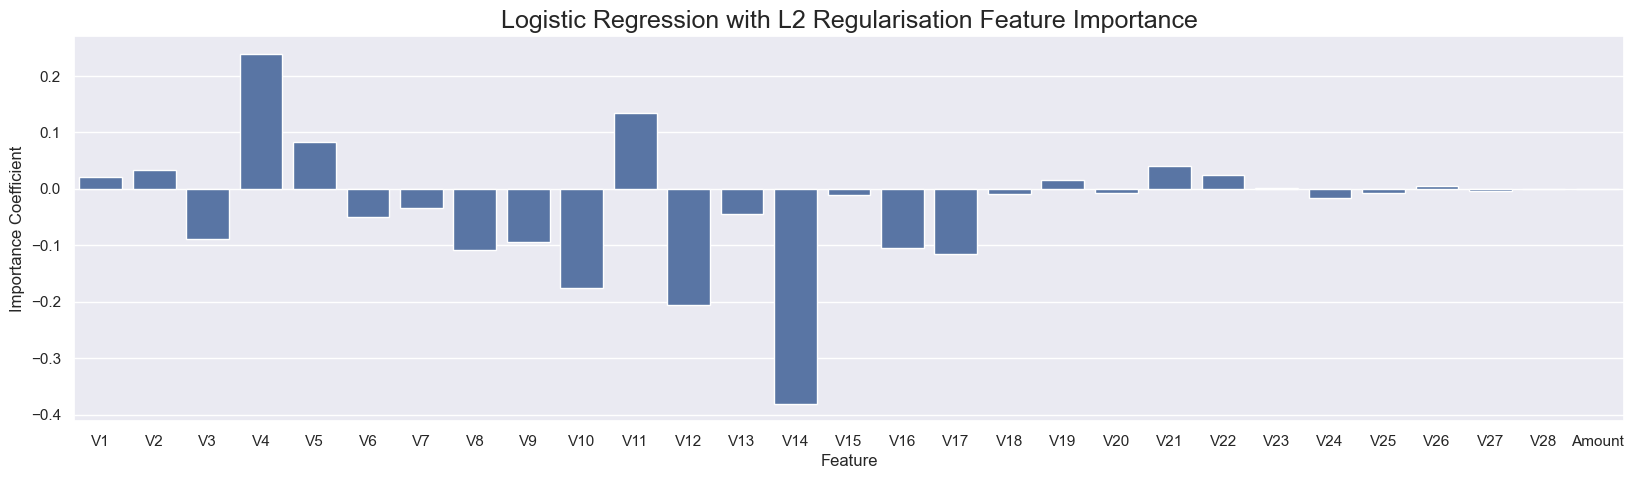

In [129]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()



#As the models Oversampling data, take significantly longer time to run.
We will try with undersampling methods

In [132]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=X.columns)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9873089496417988
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-0.03218637  0.05078139 -0.14304027  0.4254201   0.059192   -0.09683966
  -0.01829434 -0.07250334 -0.05987605 -0.17198606  0.19529071 -0.30630368
  -0.09502525 -0.44867433 -0.01501747 -0.05481615 -0.03032648  0.0339887
  -0.00716208 -0.03258825  0.00827391  0.04360856  0.01743922 -0.02721495
   0.01829884 -0.03674956  0.01149745  0.01841145  0.00125879]]
[-2.94774913]
{1: array([[0.5125    , 0.51538462, 0.52692308, 0.5875    , 0.77339744,
        0.93173077, 0.97083333, 0.98557692, 0.99423077, 0.99487179,
        0.99262821, 0.99262821, 0.99262821, 0.99262821, 0.99262821,
        0.99262821, 0.99262821, 0.99262821, 0.99262821, 0.99262821],
       [0.43794672, 0.43892138, 0.44866797, 0.52046784, 0.708577  ,
        0.87004548, 0.92560104, 0.94964263, 0.96231319, 0.95906433,
        0.95906433, 0.9619883 , 0.9619883 , 0.9619883 , 0.9619883 ,

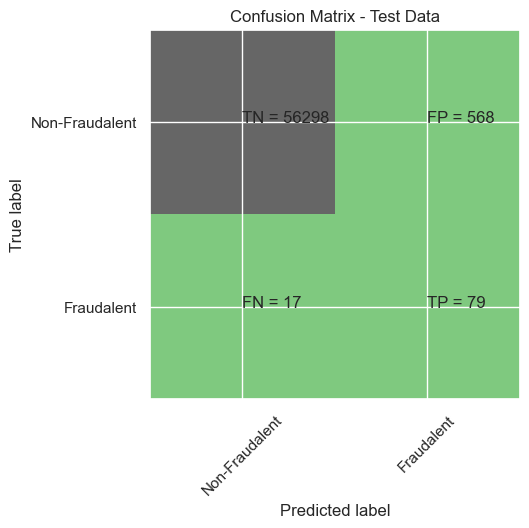

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.12      0.82      0.21        96

    accuracy                           0.99     56962
   macro avg       0.56      0.91      0.60     56962
weighted avg       1.00      0.99      0.99     56962

Accuarcy of Logistic model with l1 regularisation : 0.9983146659176293
Confusion Matrix


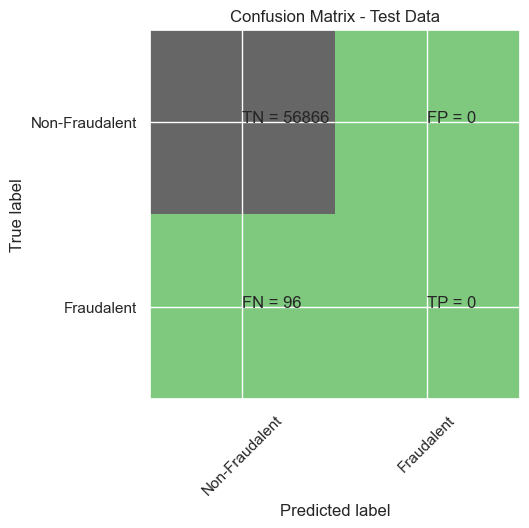

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9712634013880586
l2 threshold: 0.15560951896674557
ROC for the test dataset 97.1%


C:\Users\akash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\akash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\akash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


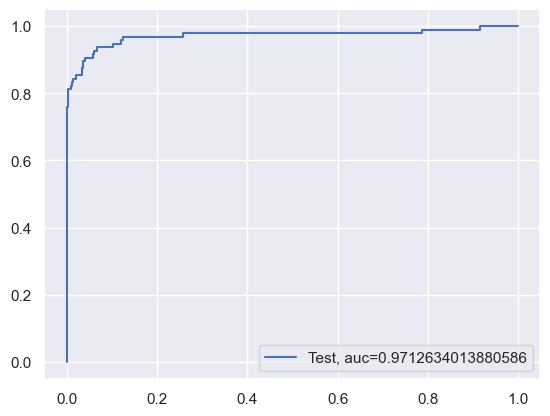

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


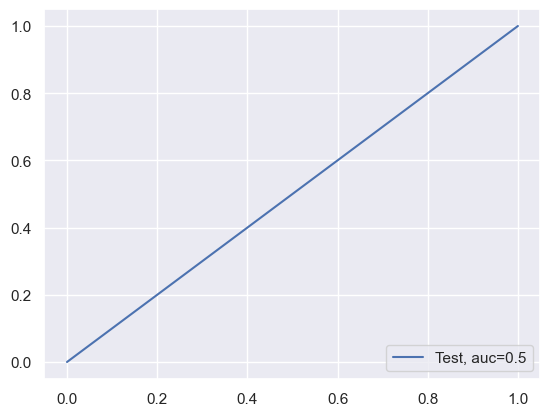

Time Taken by Model: --- 1.6091787815093994 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9773182121414277
Confusion Matrix


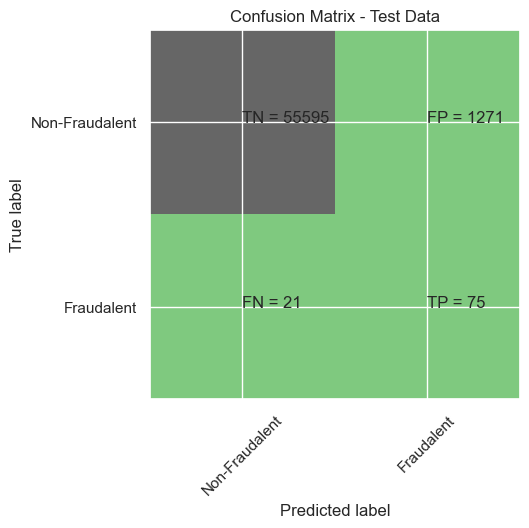

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.78      0.10        96

    accuracy                           0.98     56962
   macro avg       0.53      0.88      0.55     56962
weighted avg       1.00      0.98      0.99     56962

KNN roc_value: 0.9430196463323135
KNN threshold: 0.4
ROC for the test dataset 94.3%


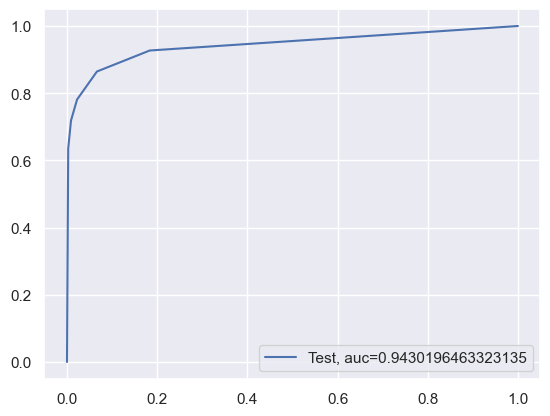

Time Taken by Model: --- 4.730190753936768 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.944506864225273
Confusion Matrix


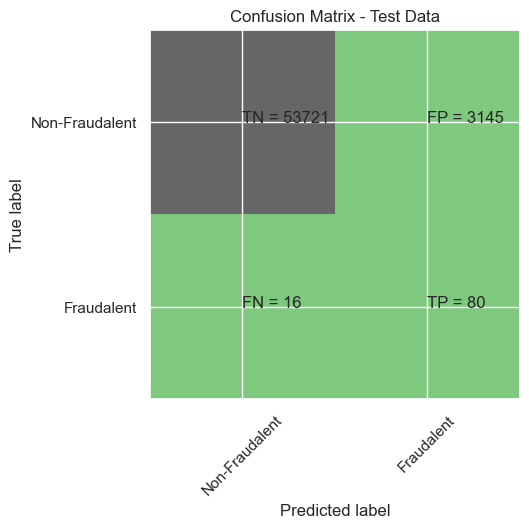

classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.02      0.83      0.05        96

    accuracy                           0.94     56962
   macro avg       0.51      0.89      0.51     56962
weighted avg       1.00      0.94      0.97     56962

gini tree_roc_value: 0.8890139392021009
Tree threshold: 1.0
ROC for the test dataset 88.9%


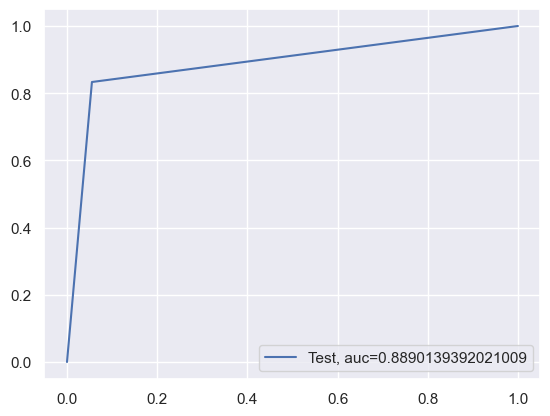

entropy score: 0.9426284189459639
Confusion Matrix


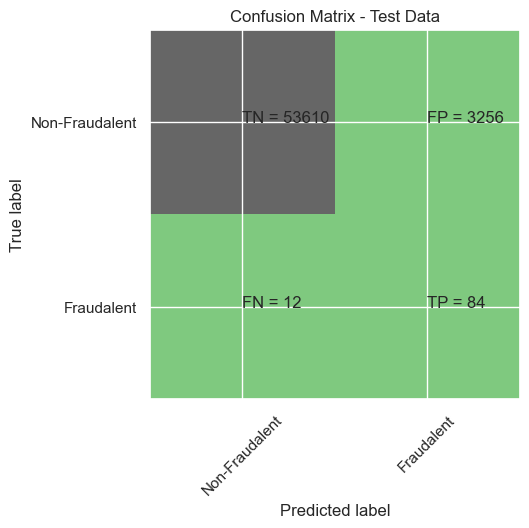

classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.03      0.88      0.05        96

    accuracy                           0.94     56962
   macro avg       0.51      0.91      0.51     56962
weighted avg       1.00      0.94      0.97     56962

entropy tree_roc_value: 0.9088712939190378
Tree threshold: 1.0
ROC for the test dataset 90.9%


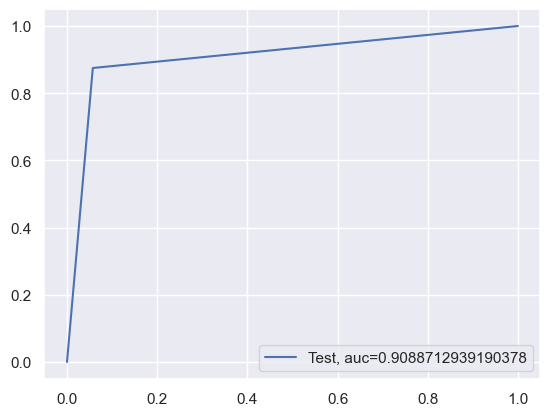

Time Taken by Model: --- 0.6429033279418945 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9901688845195042
Confusion Matrix


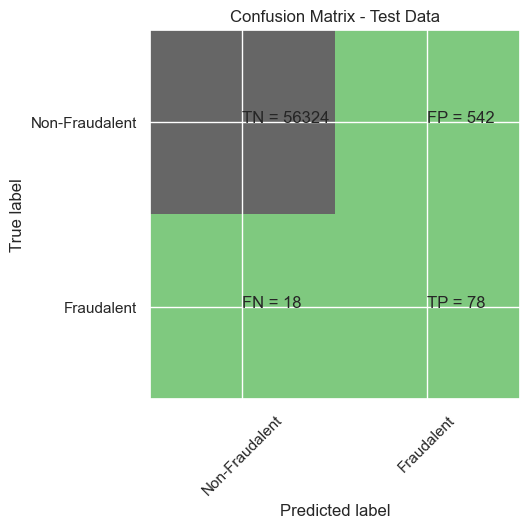

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.13      0.81      0.22        96

    accuracy                           0.99     56962
   macro avg       0.56      0.90      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Random Forest roc_value: 0.9707886925696667
Random Forest threshold: 0.37
ROC for the test dataset 97.1%


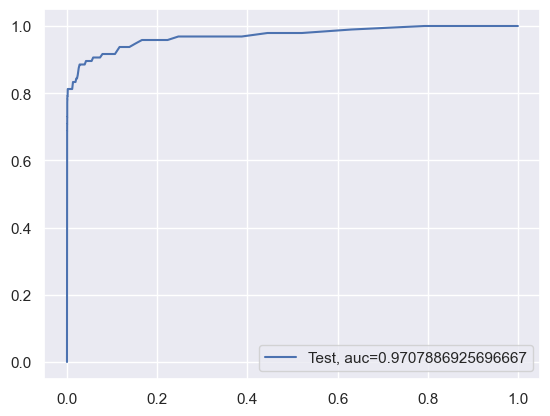

Time Taken by Model: --- 2.1201376914978027 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.980074435588638
Confusion Matrix


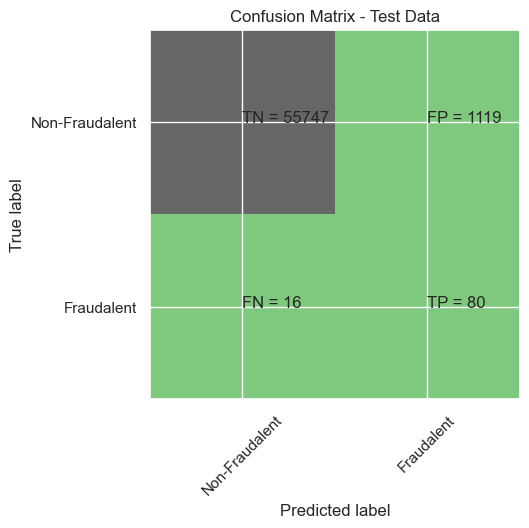

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.83      0.12        96

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962

XGboost roc_value: 0.9775905015006037
XGBoost threshold: 0.06706356257200241
ROC for the test dataset 97.8%


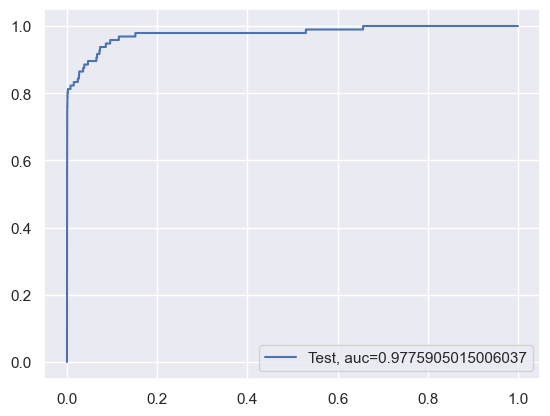

Time Taken by Model: --- 0.46483540534973145 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.6788736350549489
Confusion Matrix


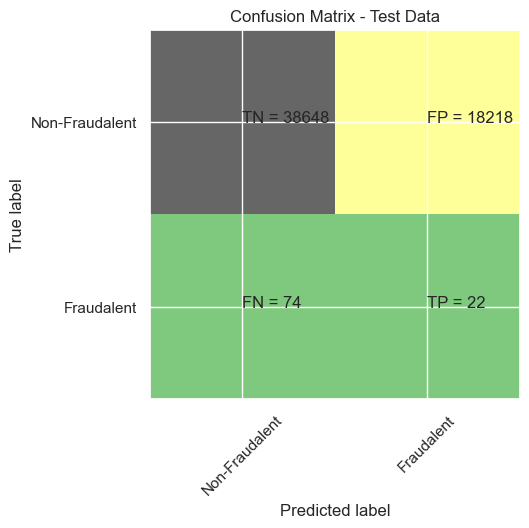

classification Report
              precision    recall  f1-score   support

           0       1.00      0.68      0.81     56866
           1       0.00      0.23      0.00        96

    accuracy                           0.68     56962
   macro avg       0.50      0.45      0.41     56962
weighted avg       1.00      0.68      0.81     56962

SVM roc_value: 0.4491917768672552
SVM threshold: 0.3531655342857249
ROC for the test dataset 44.9%


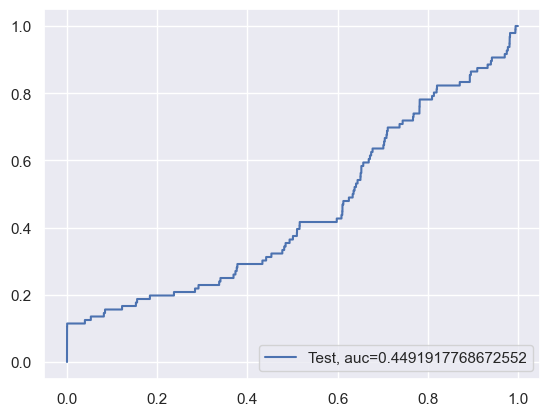

Time Taken by Model: --- 3.0074727535247803 seconds ---


In [152]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [153]:
pd.DataFrame(df_Results)

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966307,0.001029
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971547,0.009045
2,Power Transformer,KNN,0.999350,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998999,0.874710,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000
5,Power Transformer,Random Forest,0.999350,0.925014,0.010000
6,Power Transformer,XGBoost,0.999421,0.972360,0.000036
7,Power Transformer,SVM,0.998578,0.887620,0.000766
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999140,0.987091,0.001703
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999175,0.952205,0.011447


**It seems Undersampling has impoved the XGBoost Results**

## Model building with balancing Classes
- ADASYN

# Oversampling with ADASYN Oversampling

**We will use ADASYN Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the ADASYN Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation	
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the oversampling techinique


In [205]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train) 


print(X_train_ADASYN.shape)
print(y_train_ADASYN.shape)

(454948, 29)
(454948,)


In [162]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=X.columns)

##### Build models on other algorithms to see the better performing on ADASYN

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9591239454285534
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 1.23437807  1.50976923  1.08719625  0.9278086   1.24045949 -1.21532937
  -1.33833959 -0.40688806 -0.41320992 -1.08117351  0.83673858 -1.47663903
  -0.36504976 -2.13308304  0.10273447 -1.15976416 -1.37645416 -0.45808939
   0.52228438 -2.01456781 -0.35727247  0.89976499  1.1968262  -0.99293413
   0.84119843  0.09747607  0.02586094  1.37311735  4.72343999]]
[-2.94931116]
{1: array([[0.91514414, 0.91533036, 0.9170526 , 0.92658921, 0.9377333 ,
        0.94374053, 0.94996366, 0.95524945, 0.95778545, 0.95884674,
        0.95897262, 0.95897262, 0.95897262, 0.95897262, 0.95897262,
        0.95897262, 0.95897262, 0.95897262, 0.95897262, 0.95897262],
       [0.91603314, 0.91621159, 0.91788816, 0.92742157, 0.93853266,
        0.9442932 , 0.95049444, 0.95595802, 0.95861075, 0.95960177,
        0.95971762, 0.95971762, 0.95971762, 0.95971762, 0.95971762

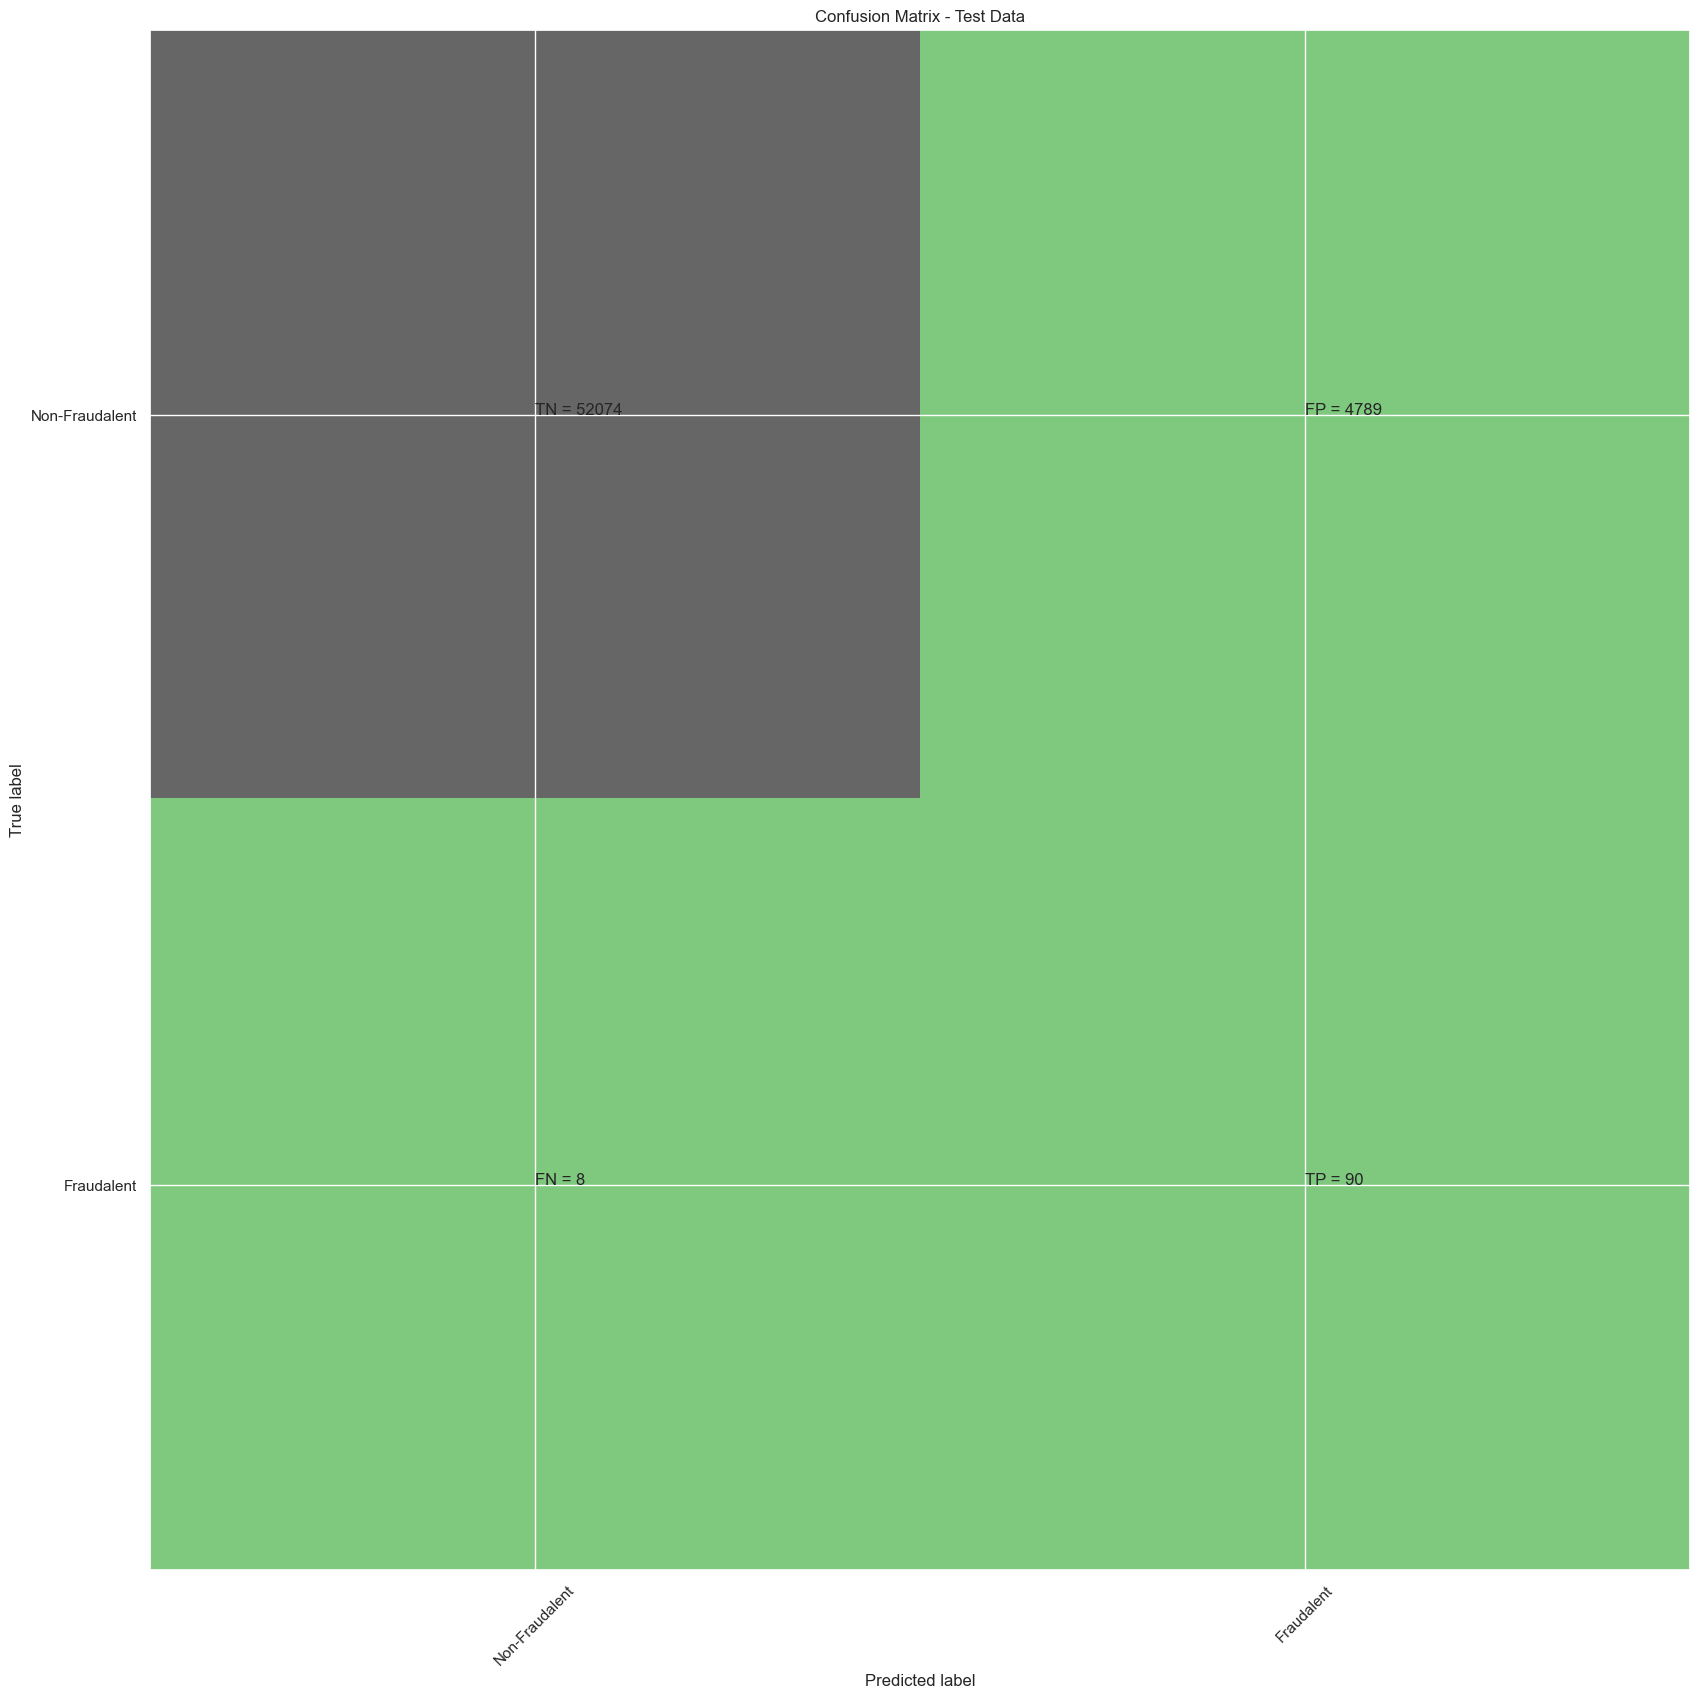

classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56863
           1       0.02      0.92      0.04        98

    accuracy                           0.92     56961
   macro avg       0.51      0.92      0.50     56961
weighted avg       1.00      0.92      0.95     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


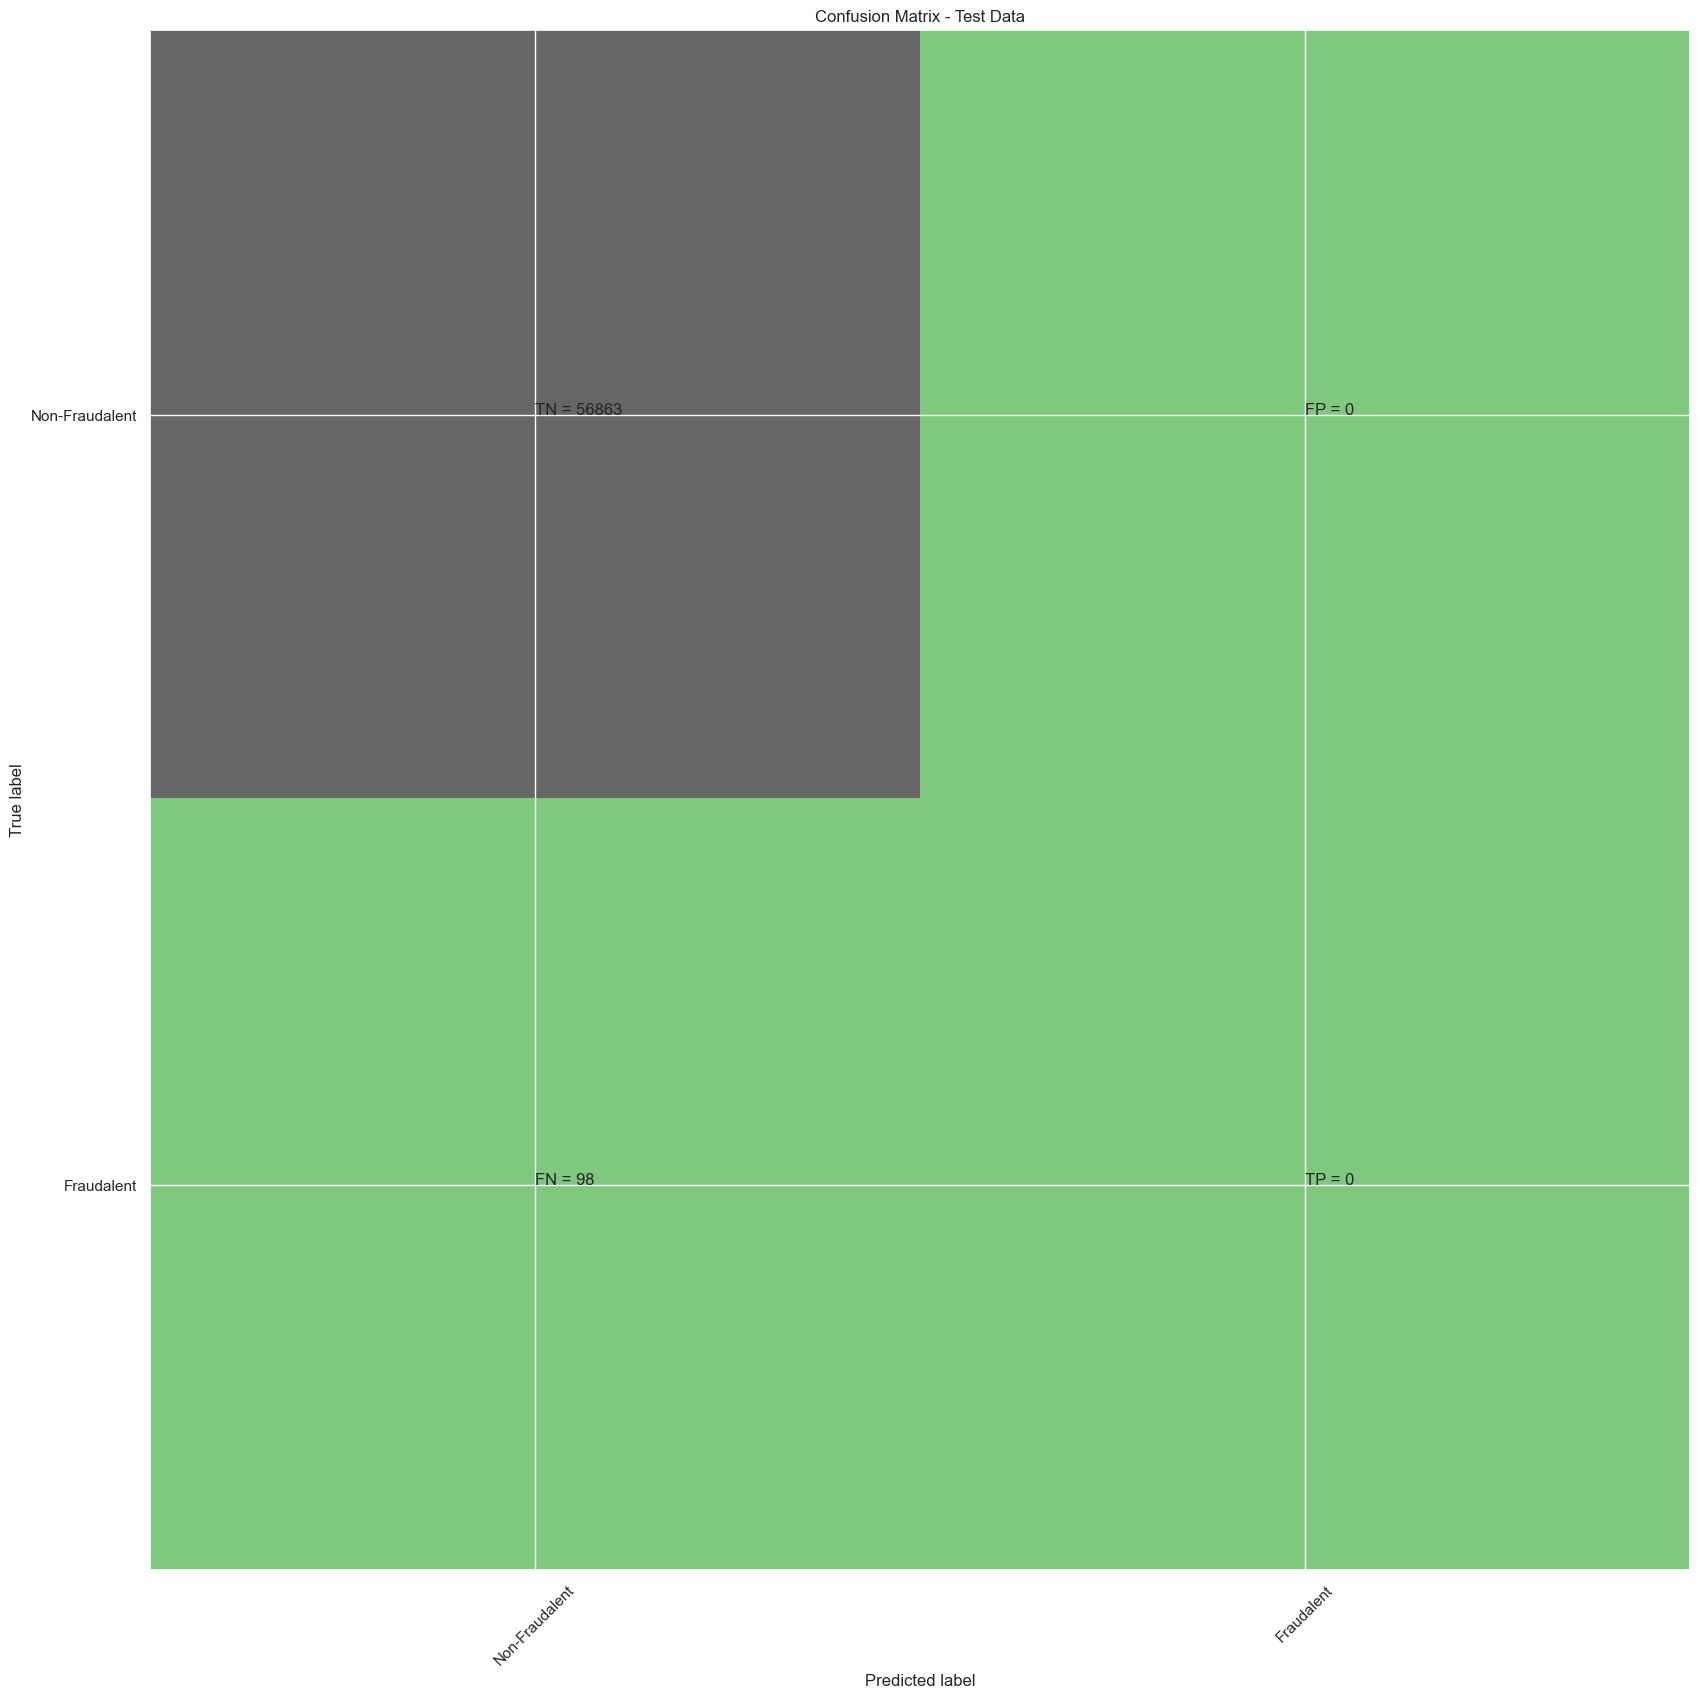

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9798532060767609
l2 threshold: 0.7617072121764729
ROC for the test dataset 98.0%


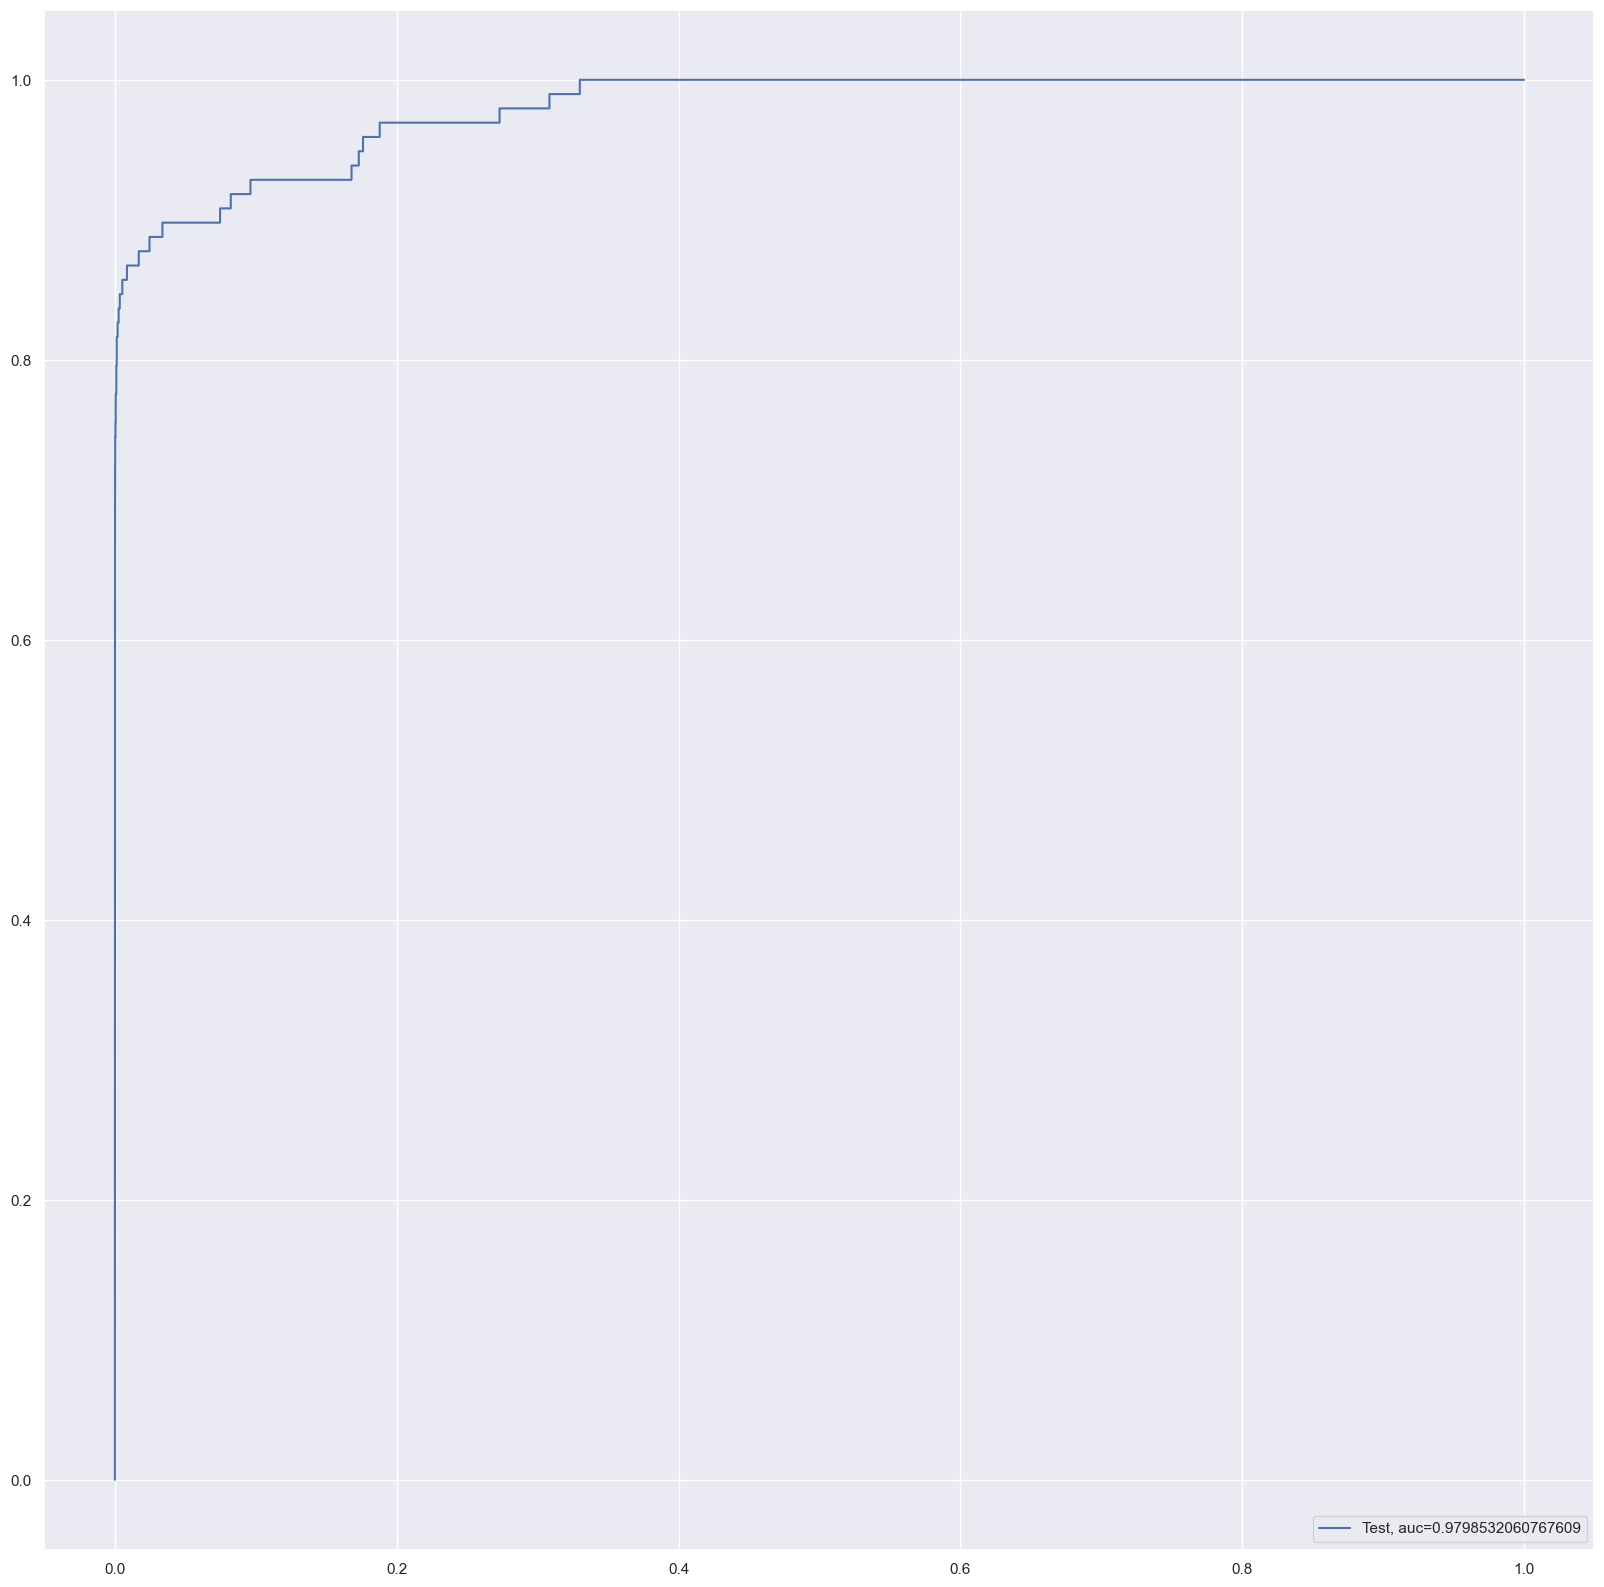

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


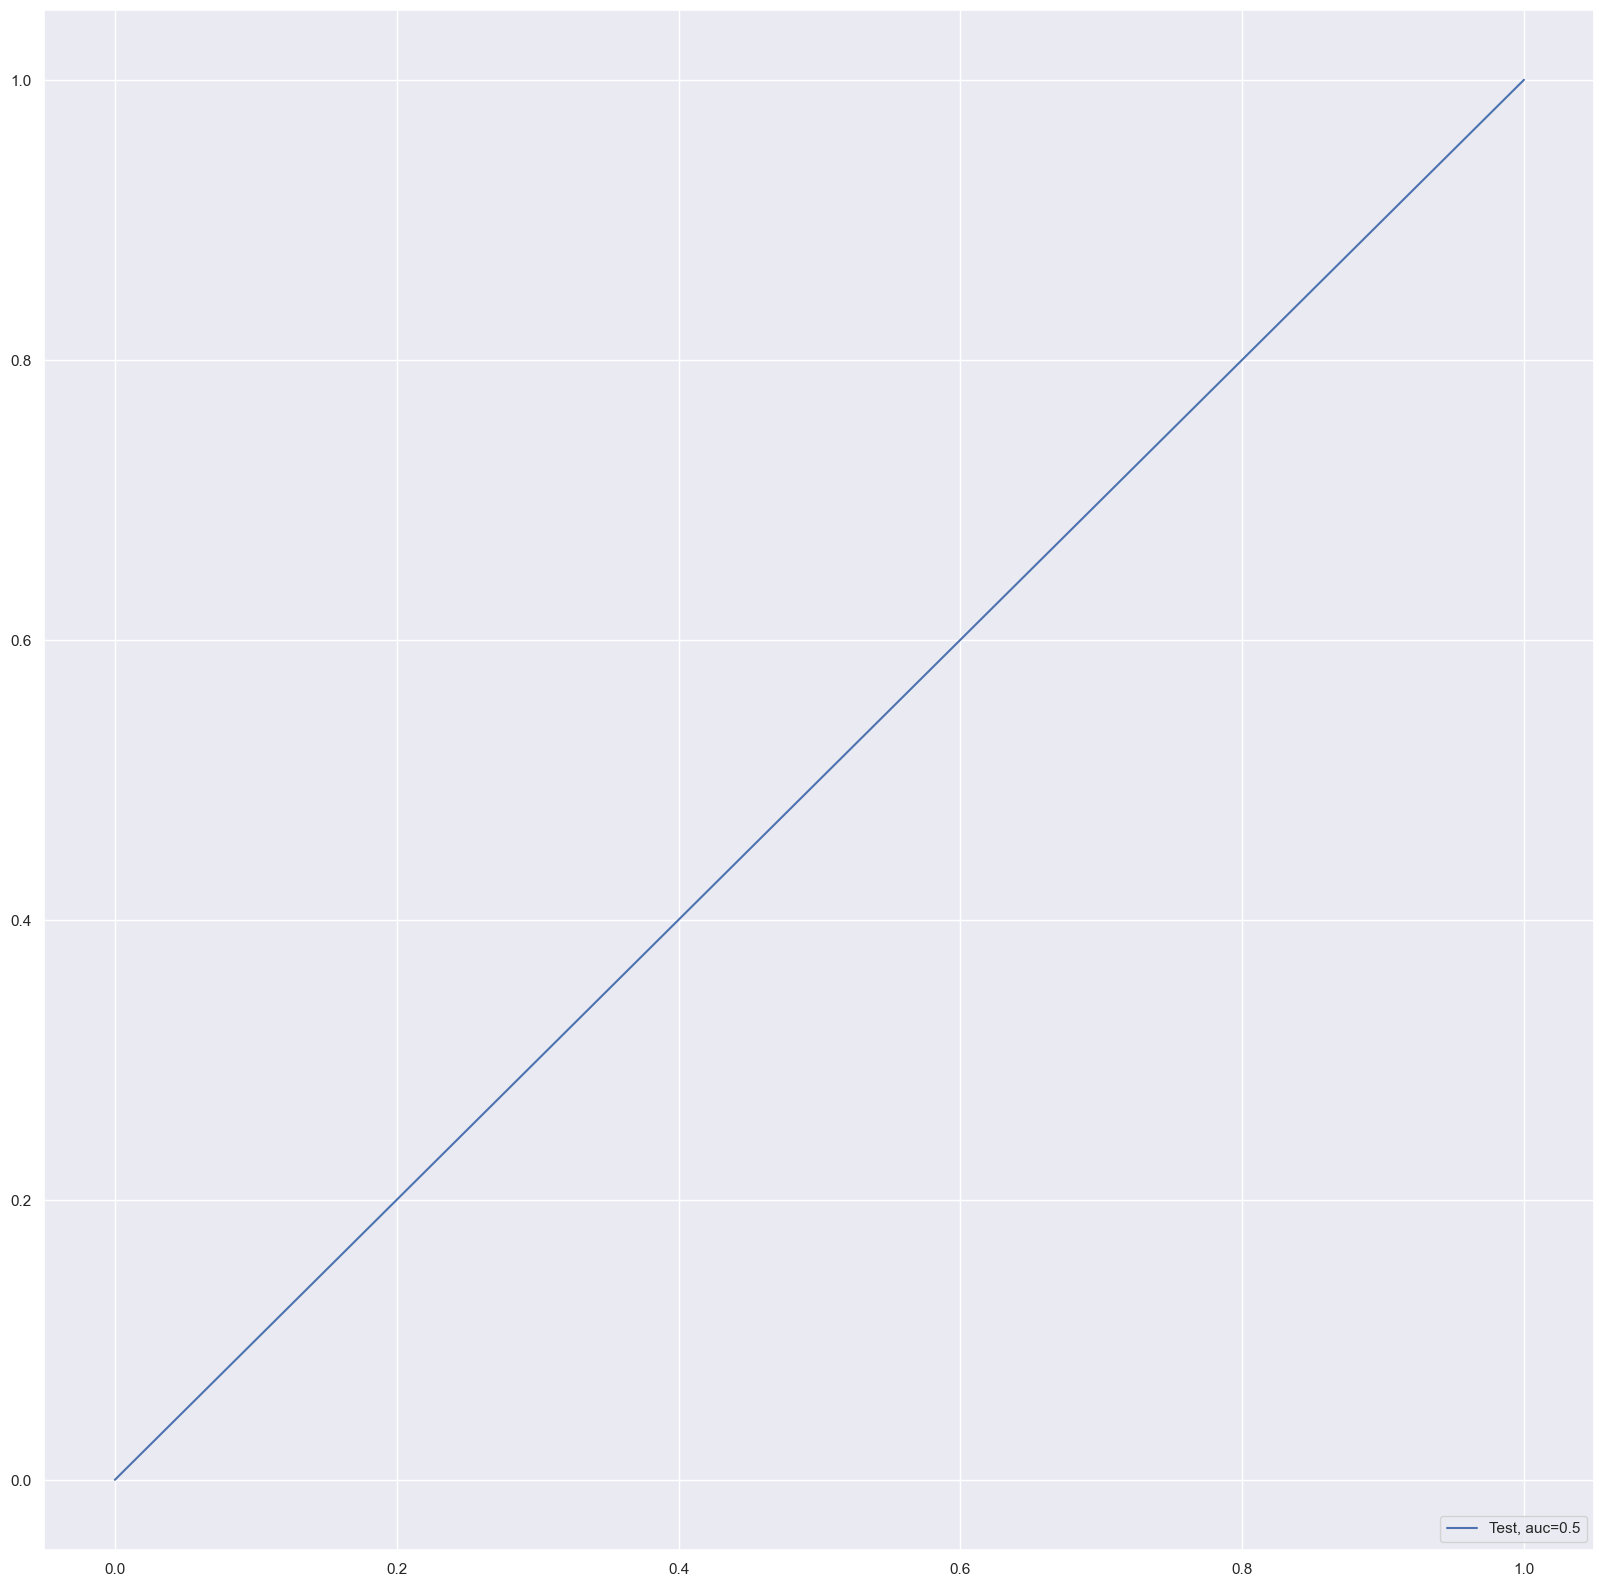

Time Taken by Model: --- 200.79946851730347 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9984726391741718
Confusion Matrix


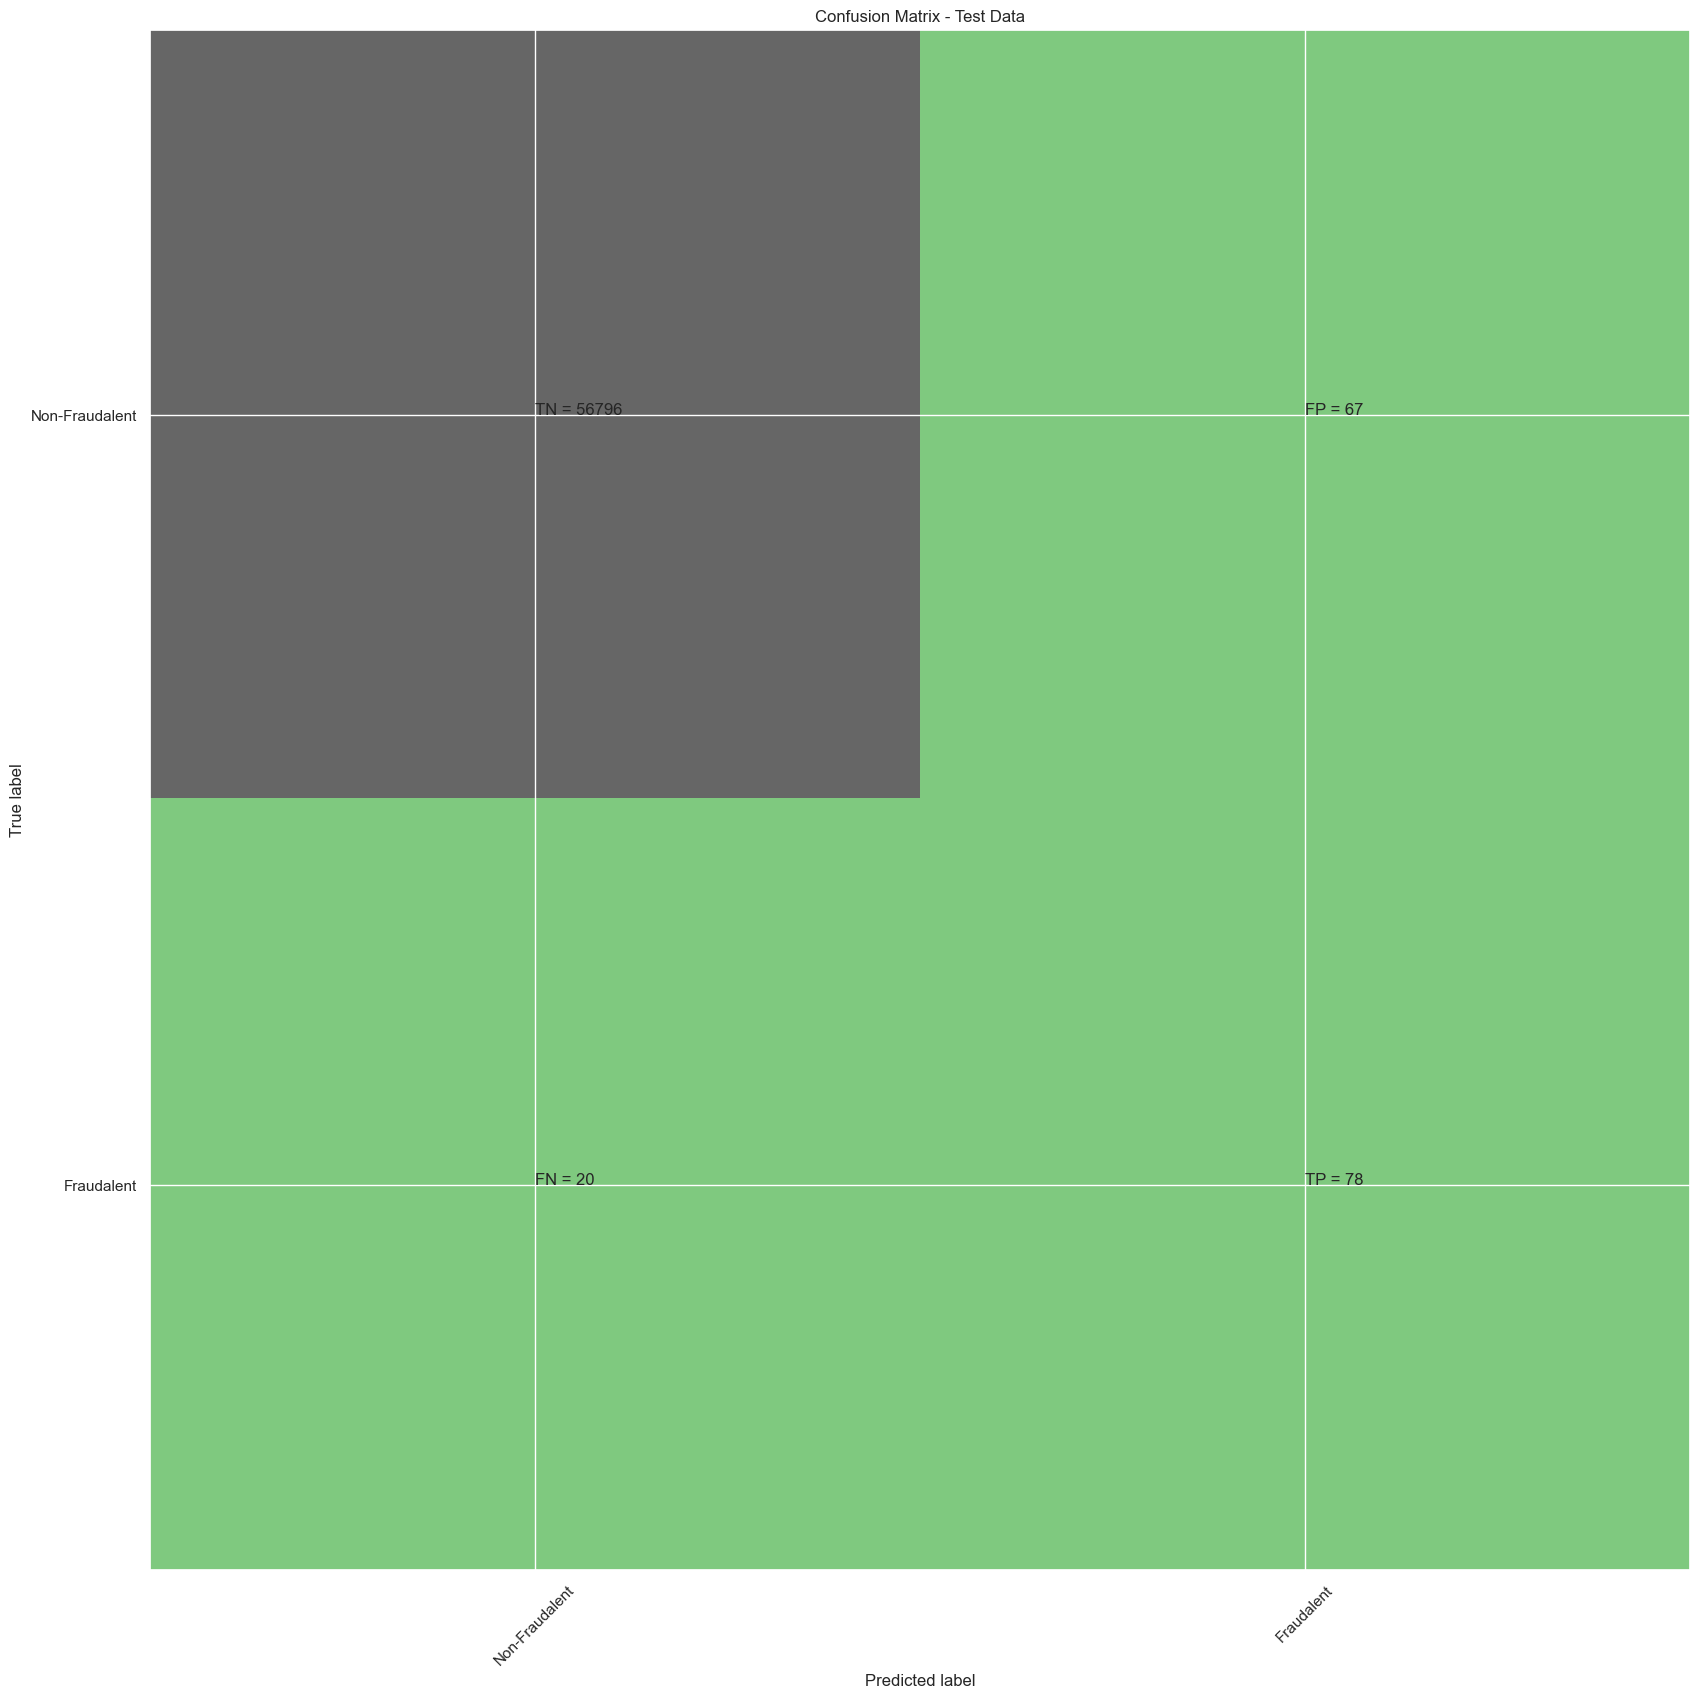

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.54      0.80      0.64        98

    accuracy                           1.00     56961
   macro avg       0.77      0.90      0.82     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.9077813950967721
KNN threshold: 0.2
ROC for the test dataset 90.8%


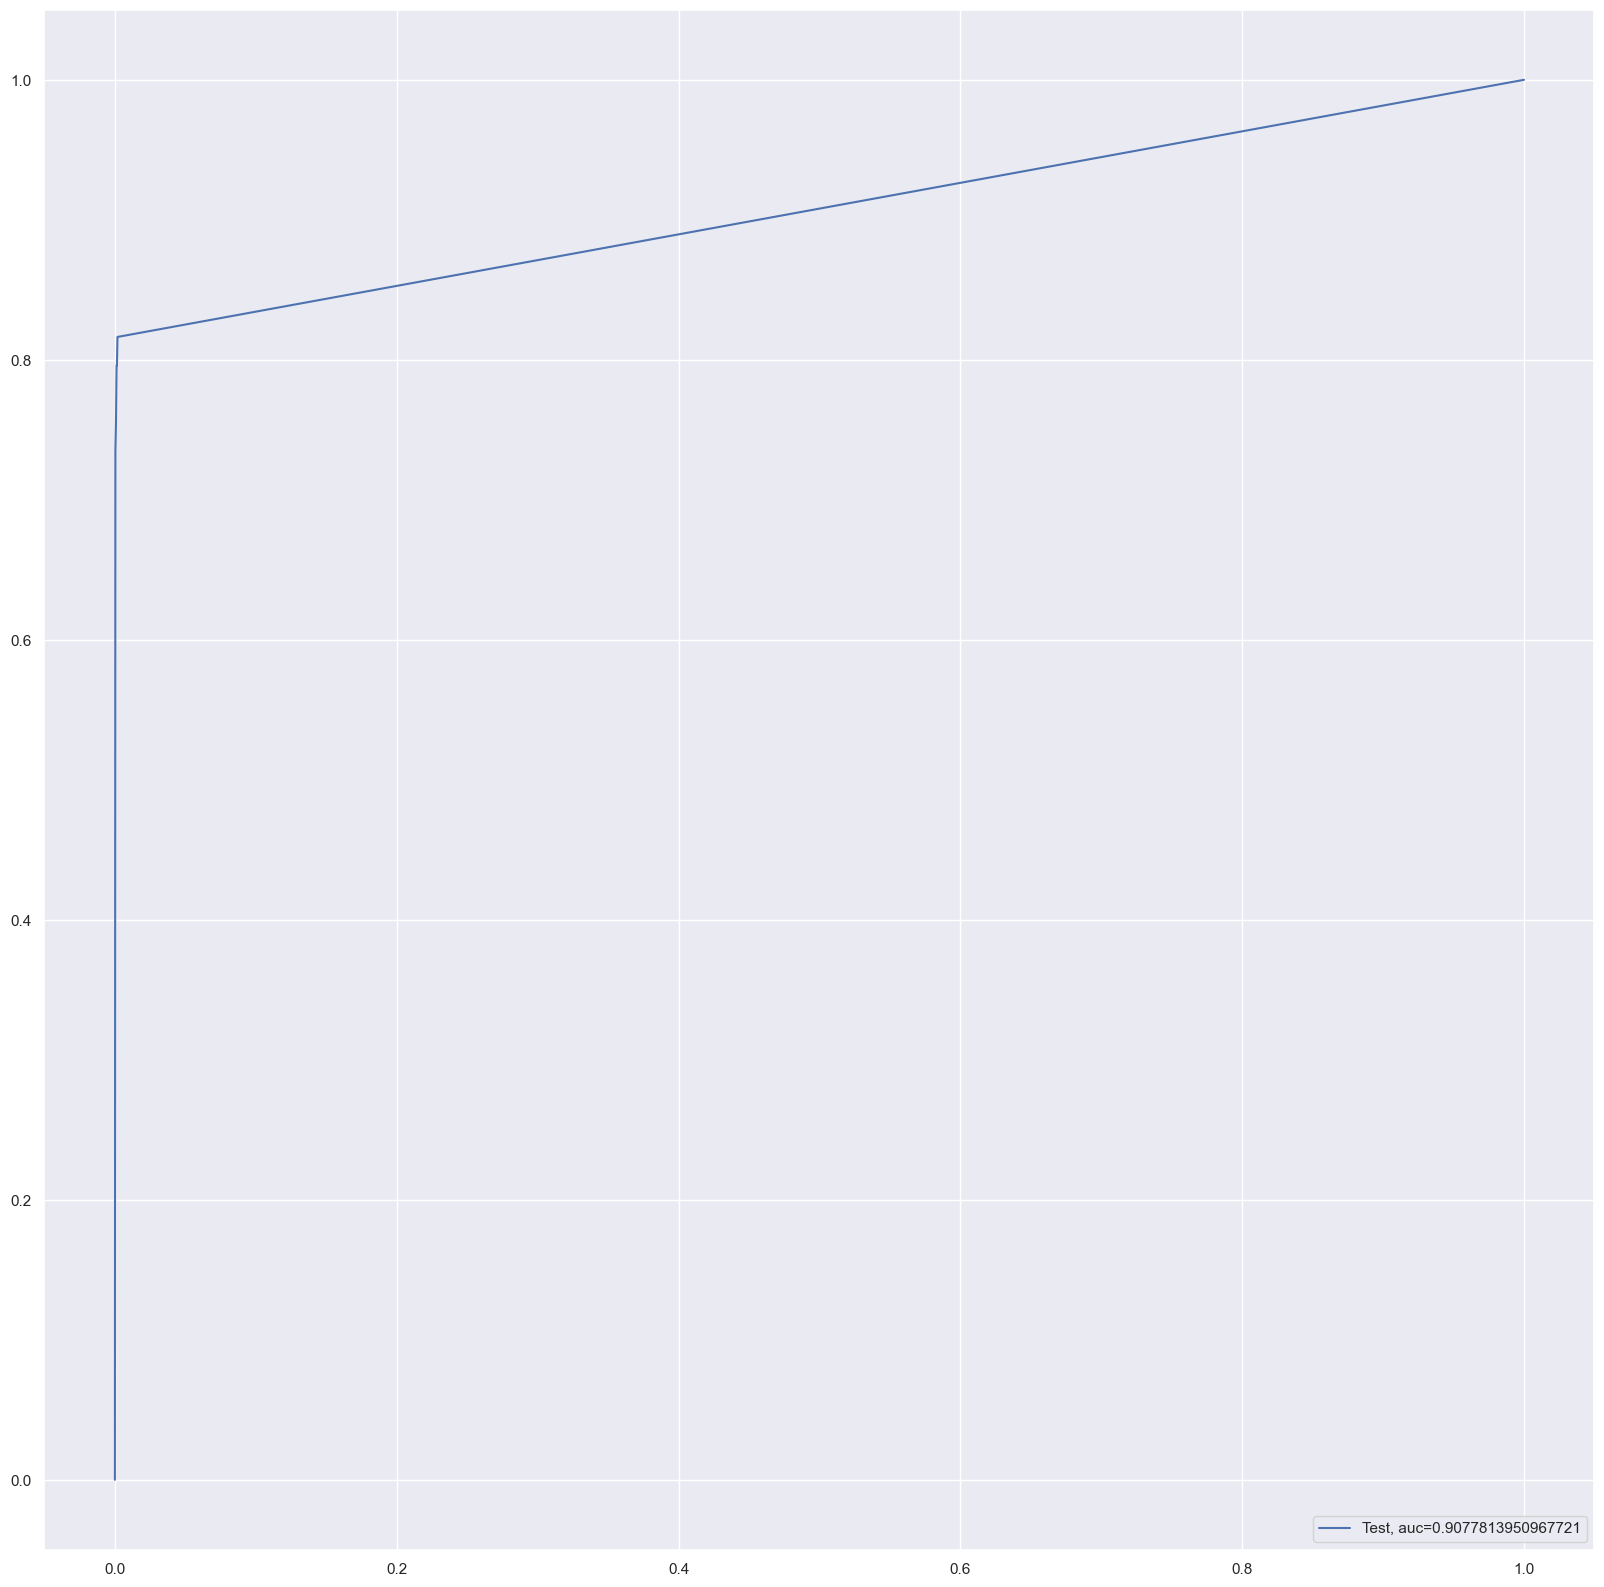

Time Taken by Model: --- 64.49911141395569 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9978055160548446
Confusion Matrix


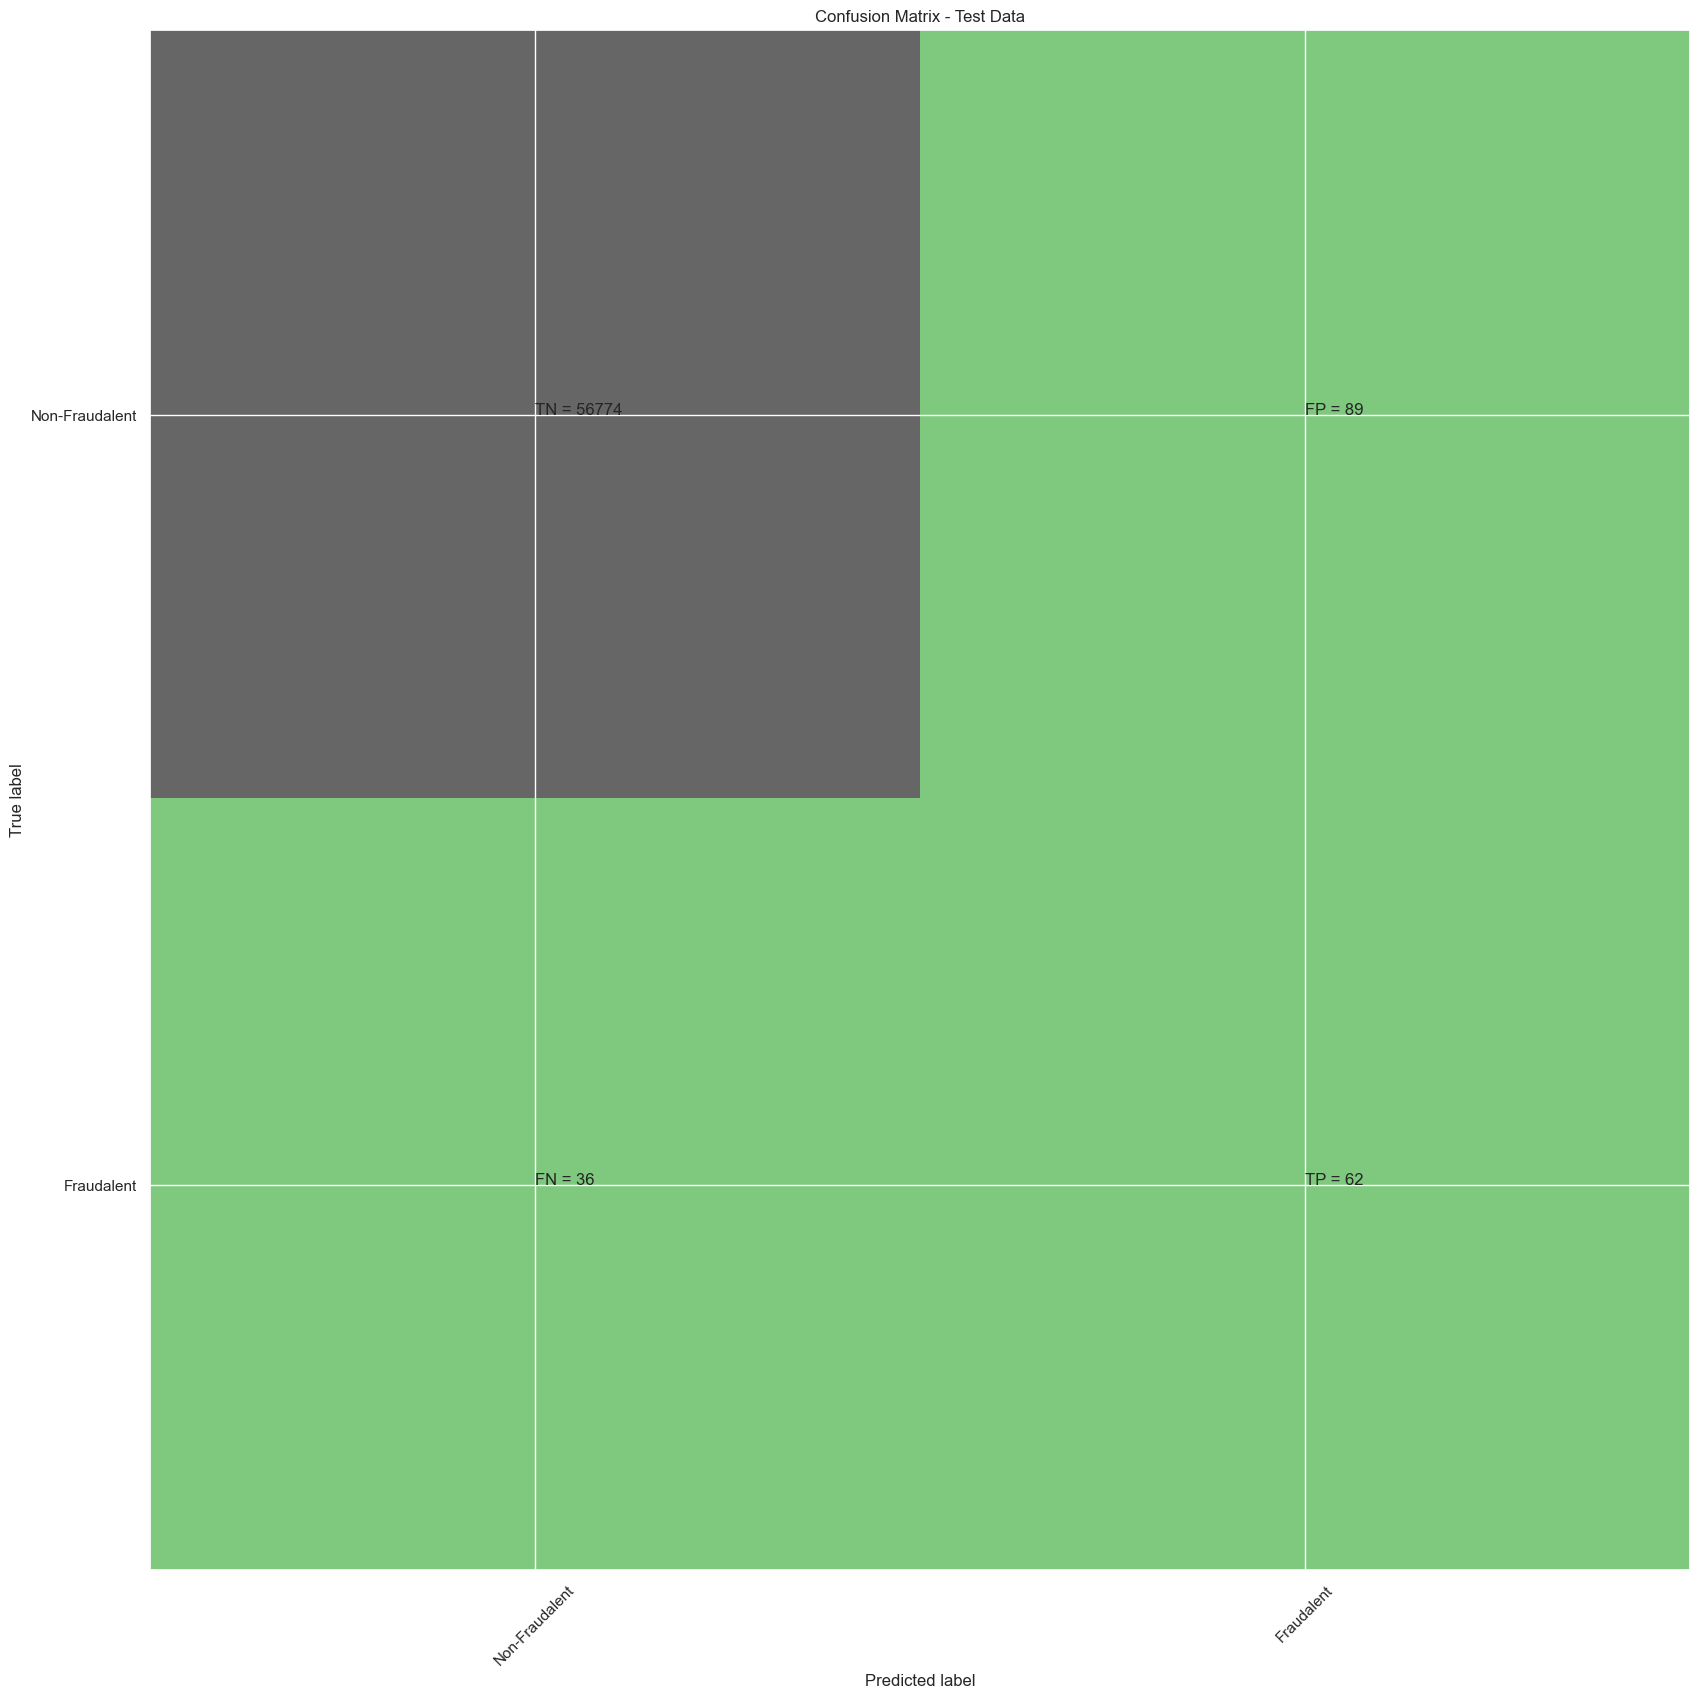

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.63      0.50        98

    accuracy                           1.00     56961
   macro avg       0.70      0.82      0.75     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8155439479134778
Tree threshold: 1.0
ROC for the test dataset 81.6%


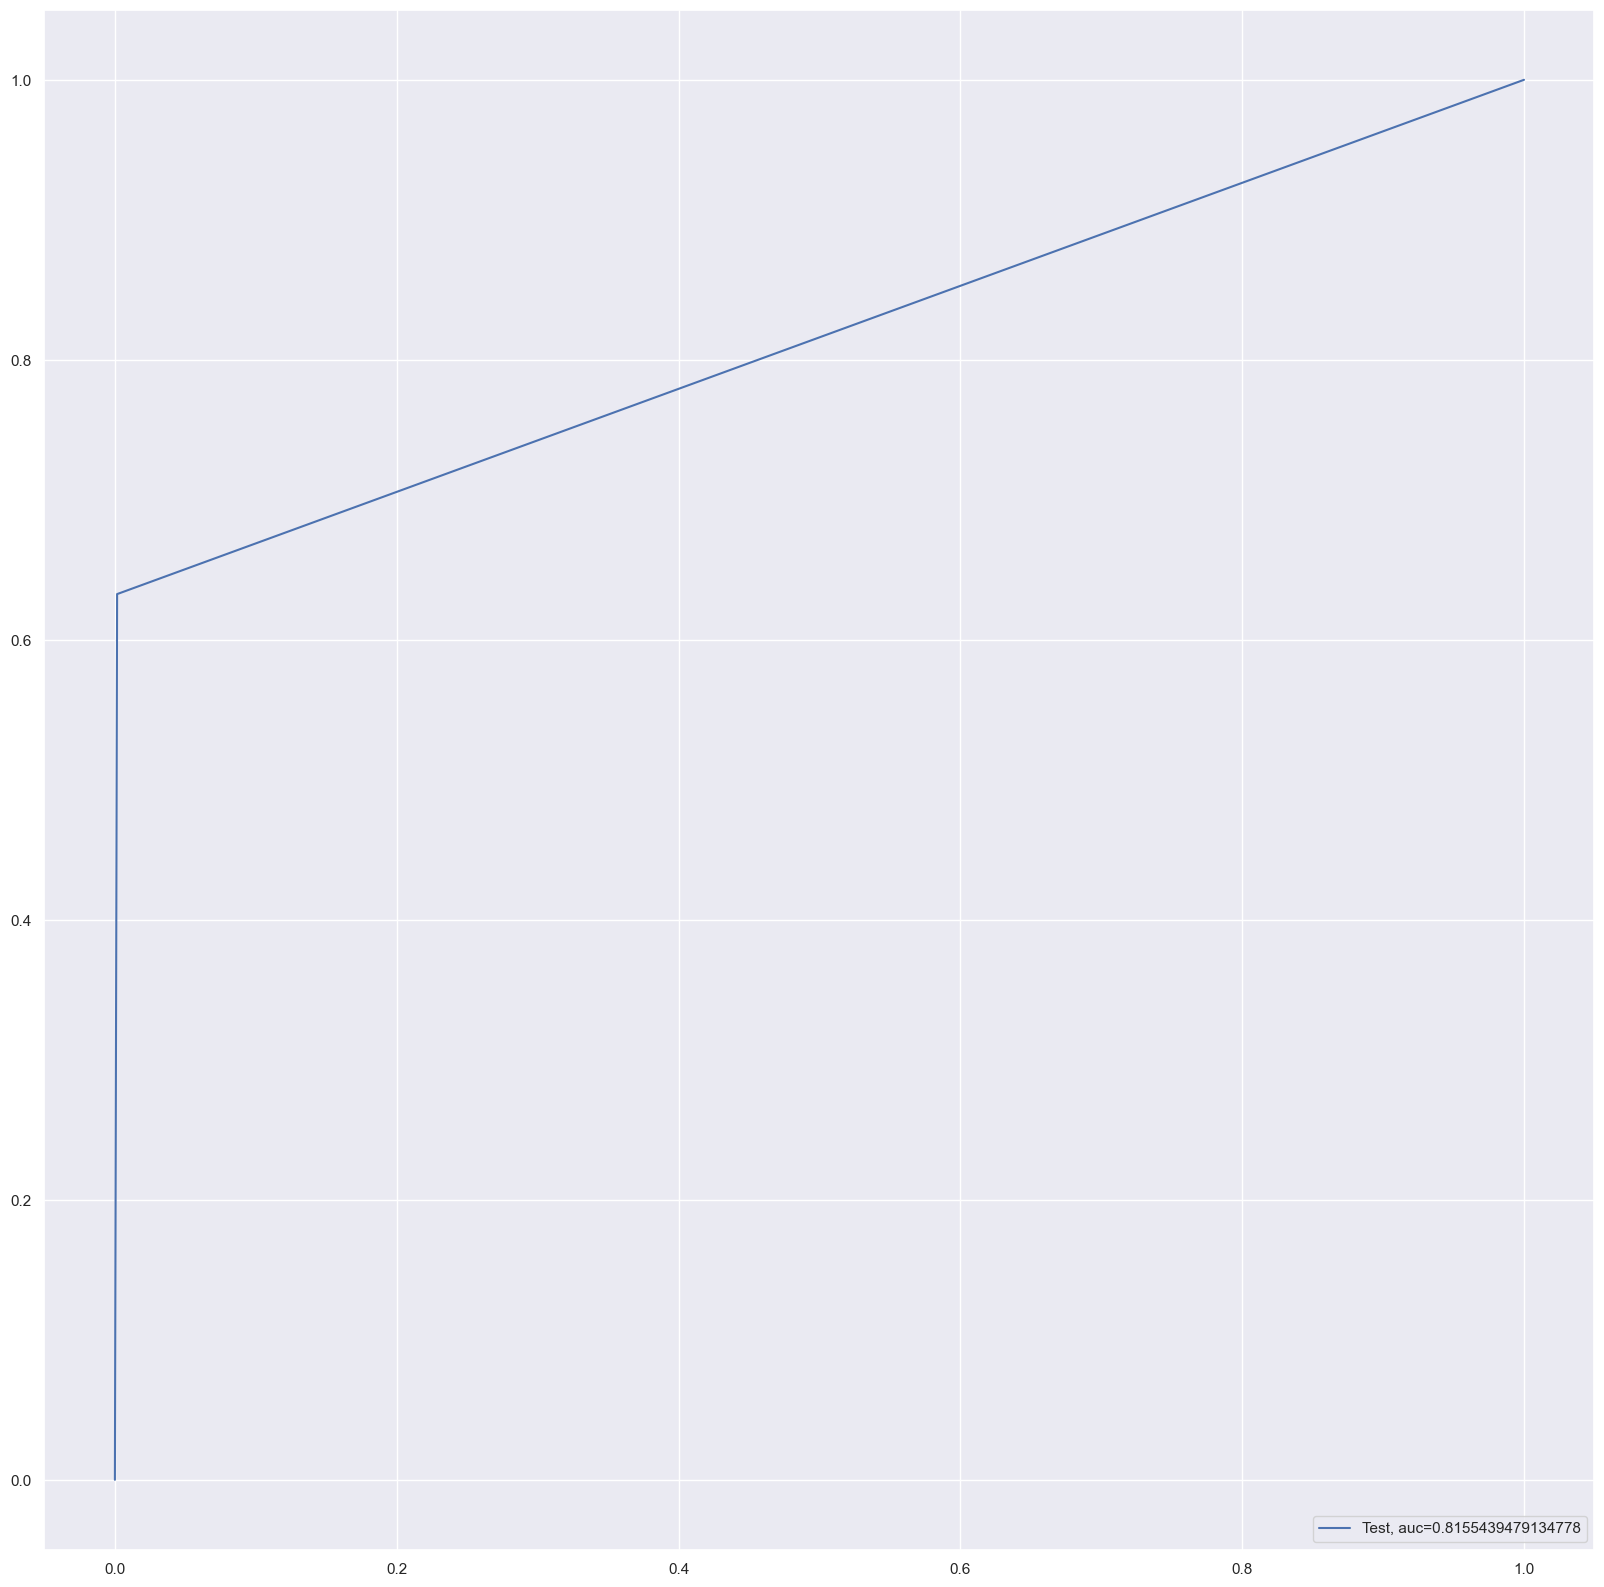

entropy score: 0.9978230719264057
Confusion Matrix


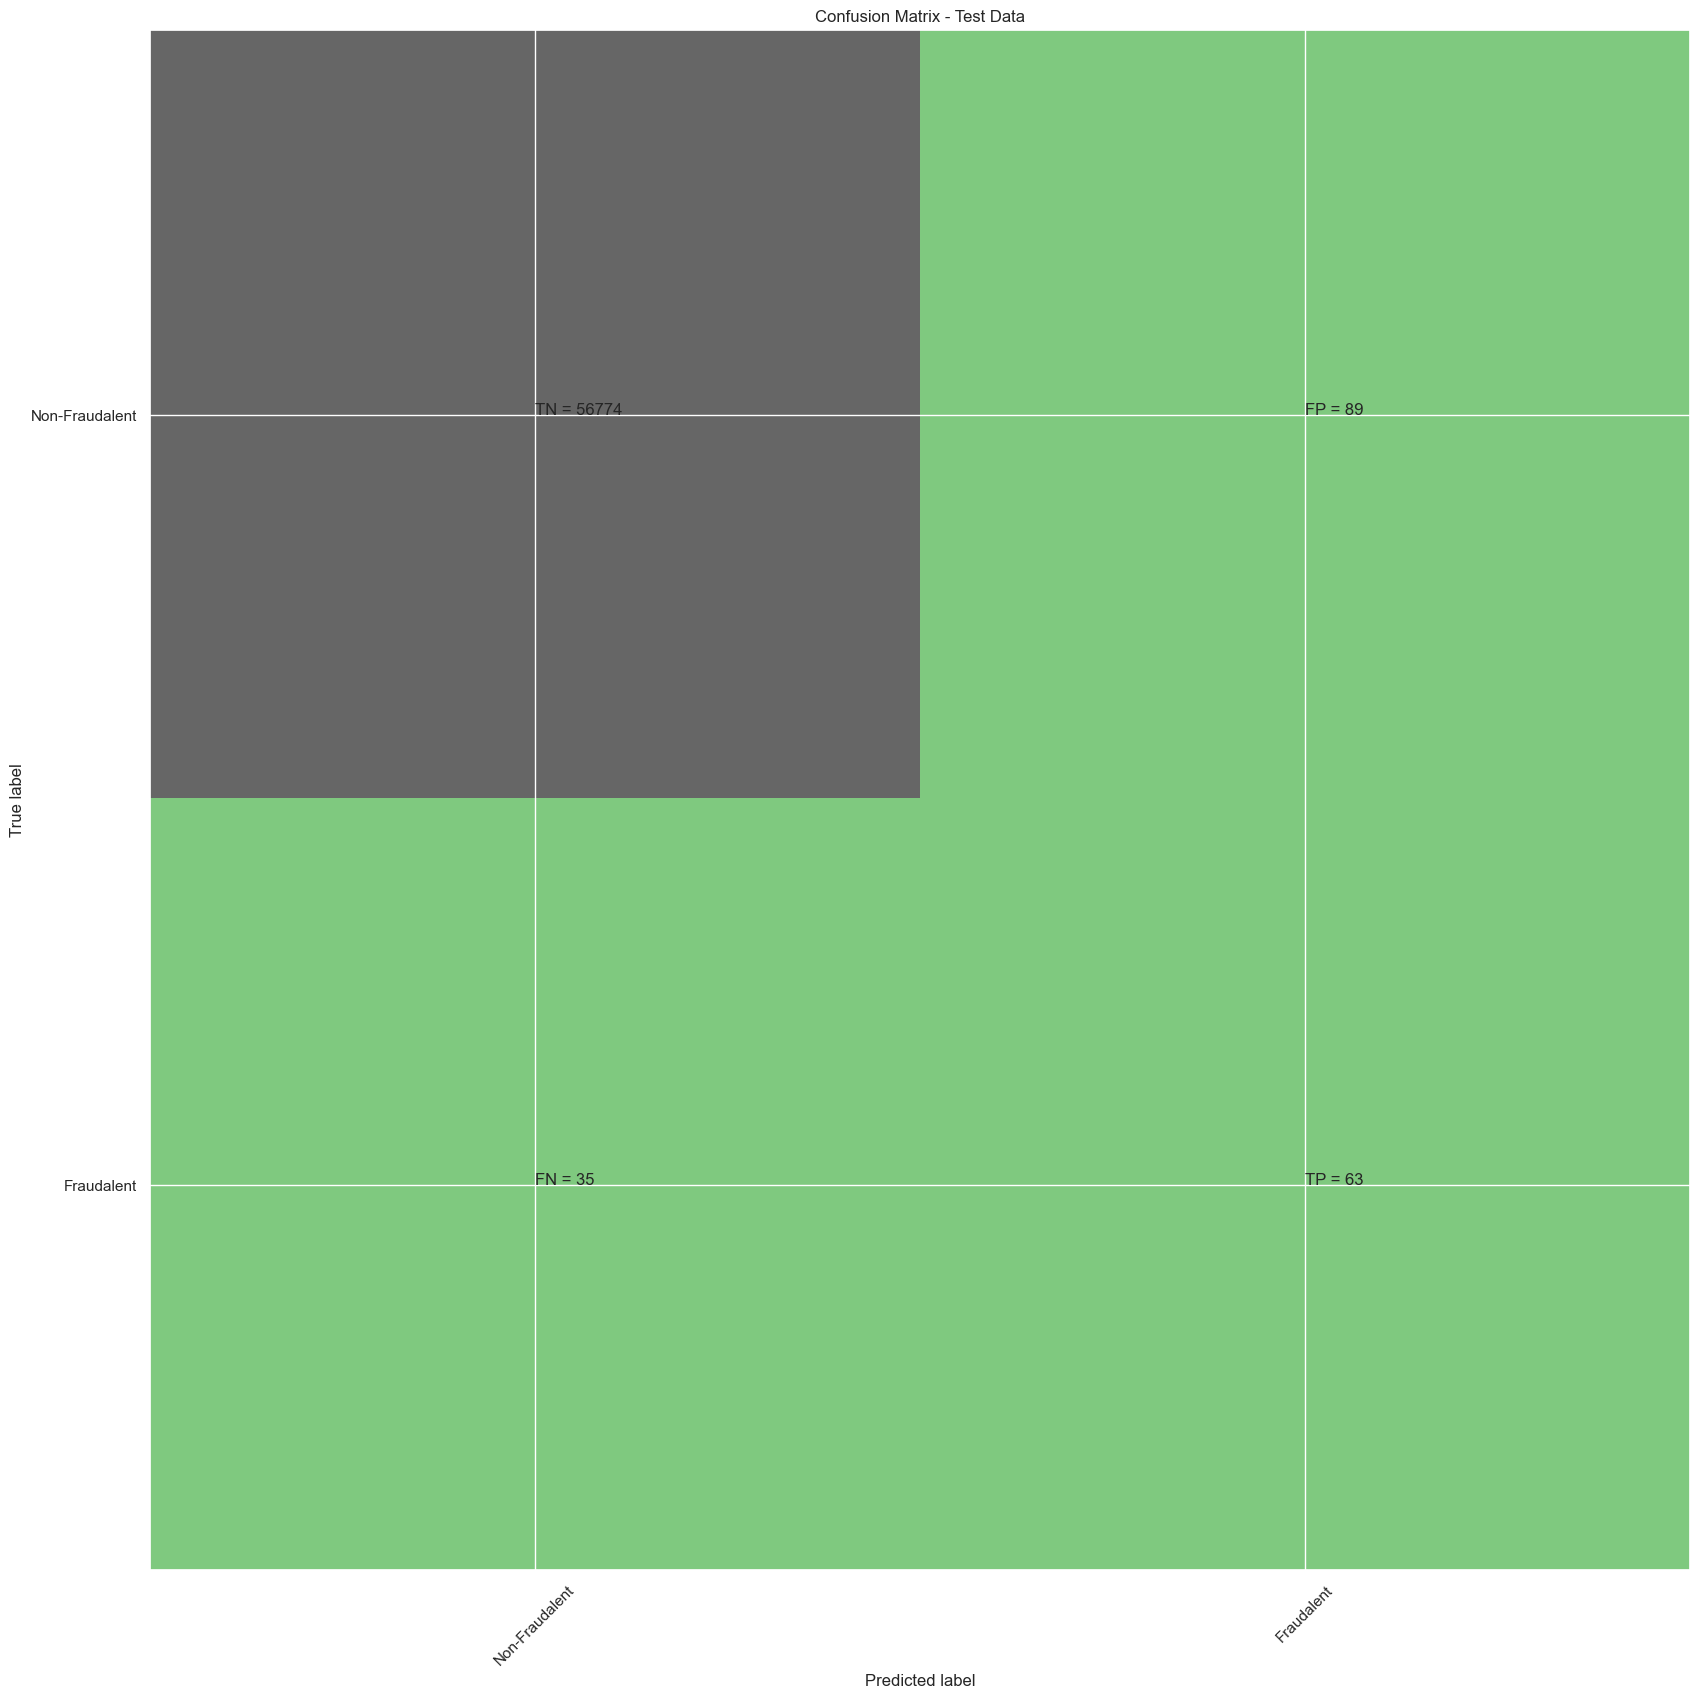

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.64      0.50        98

    accuracy                           1.00     56961
   macro avg       0.71      0.82      0.75     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8206459887298042
Tree threshold: 1.0
ROC for the test dataset 82.1%


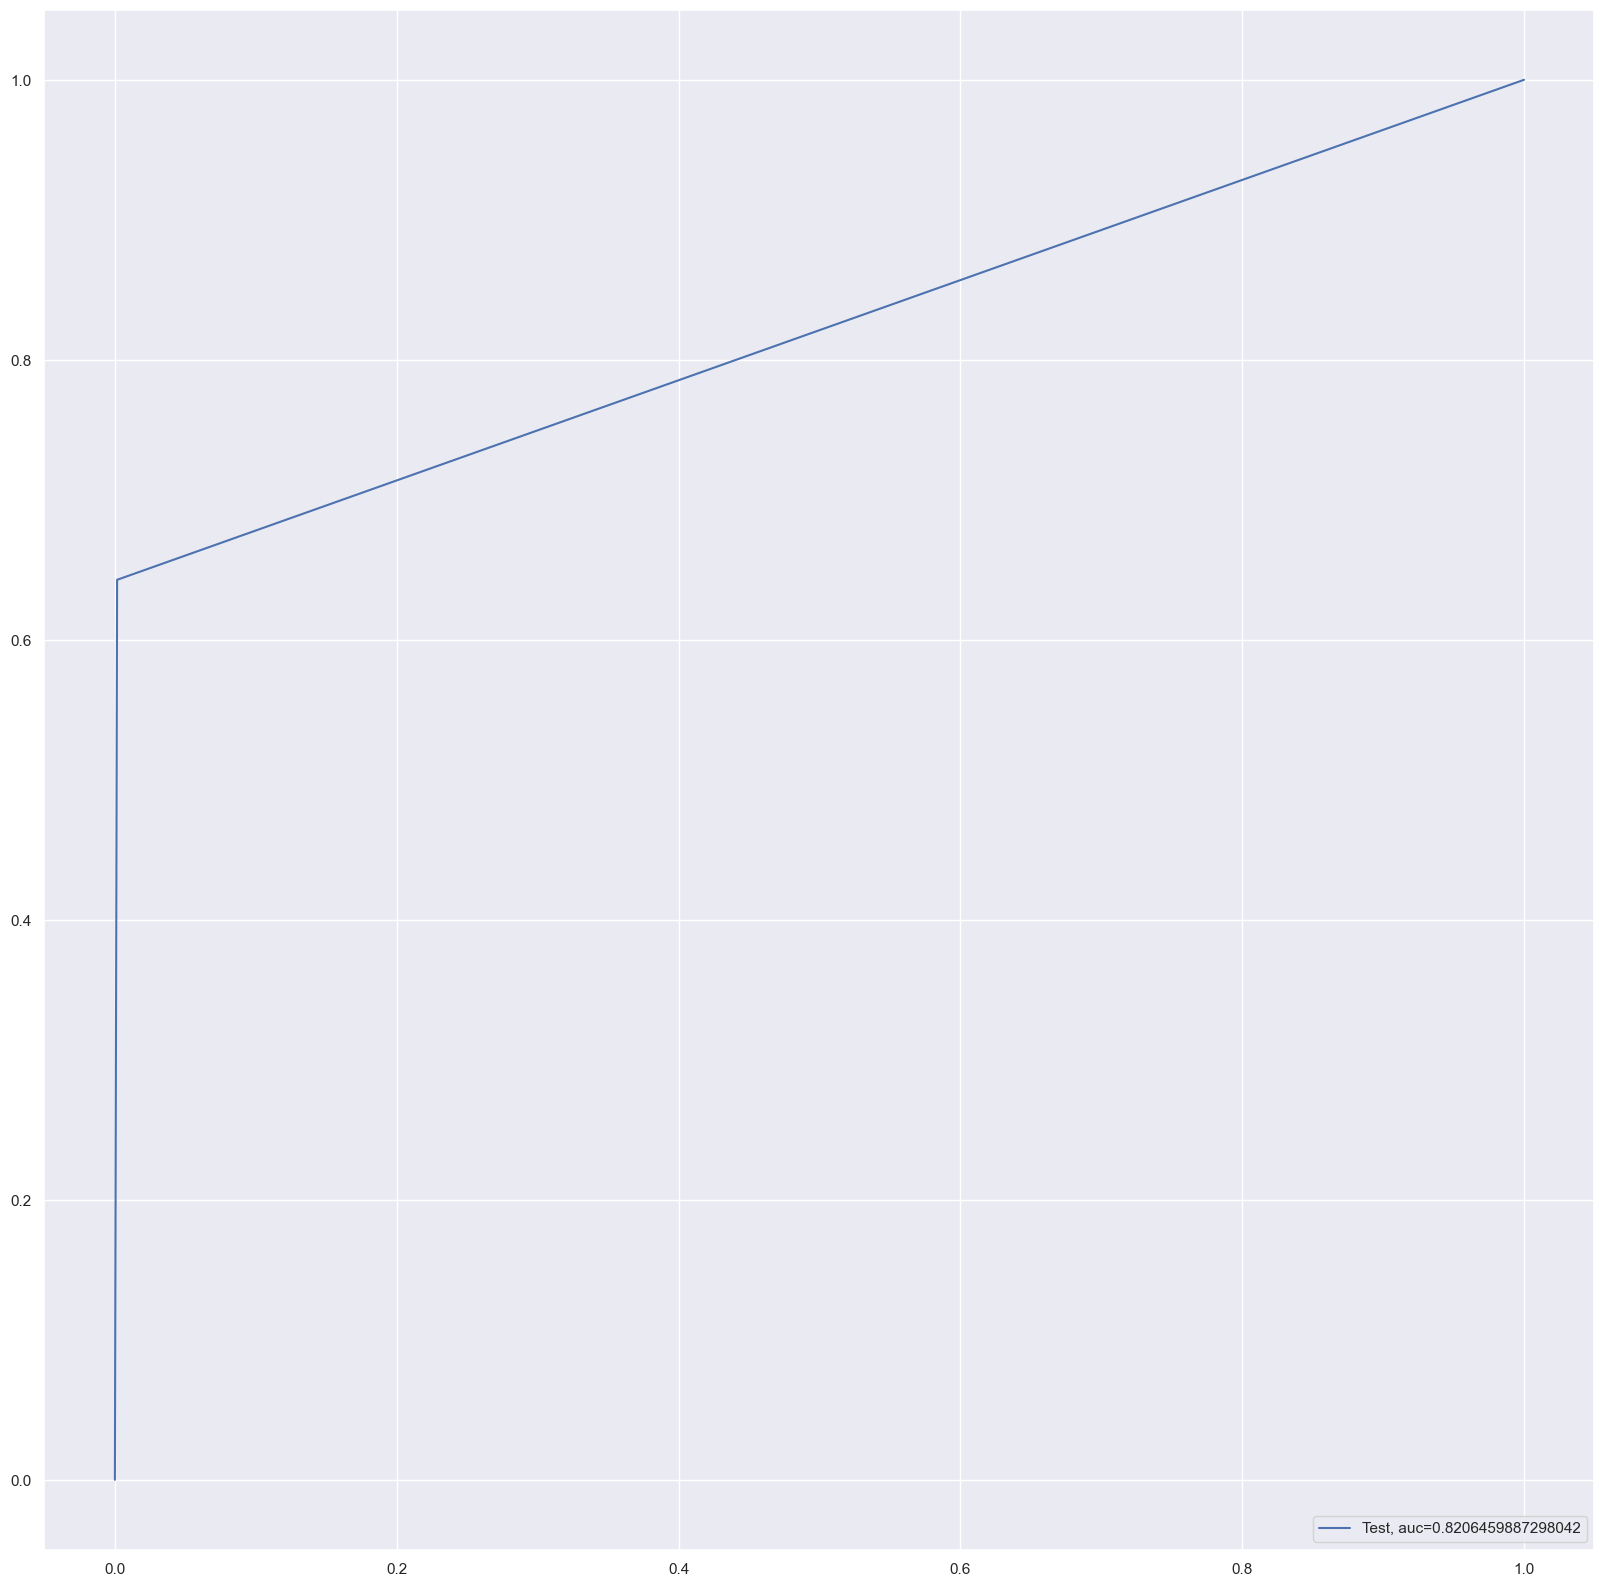

Time Taken by Model: --- 61.86494588851929 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993855444953564
Confusion Matrix


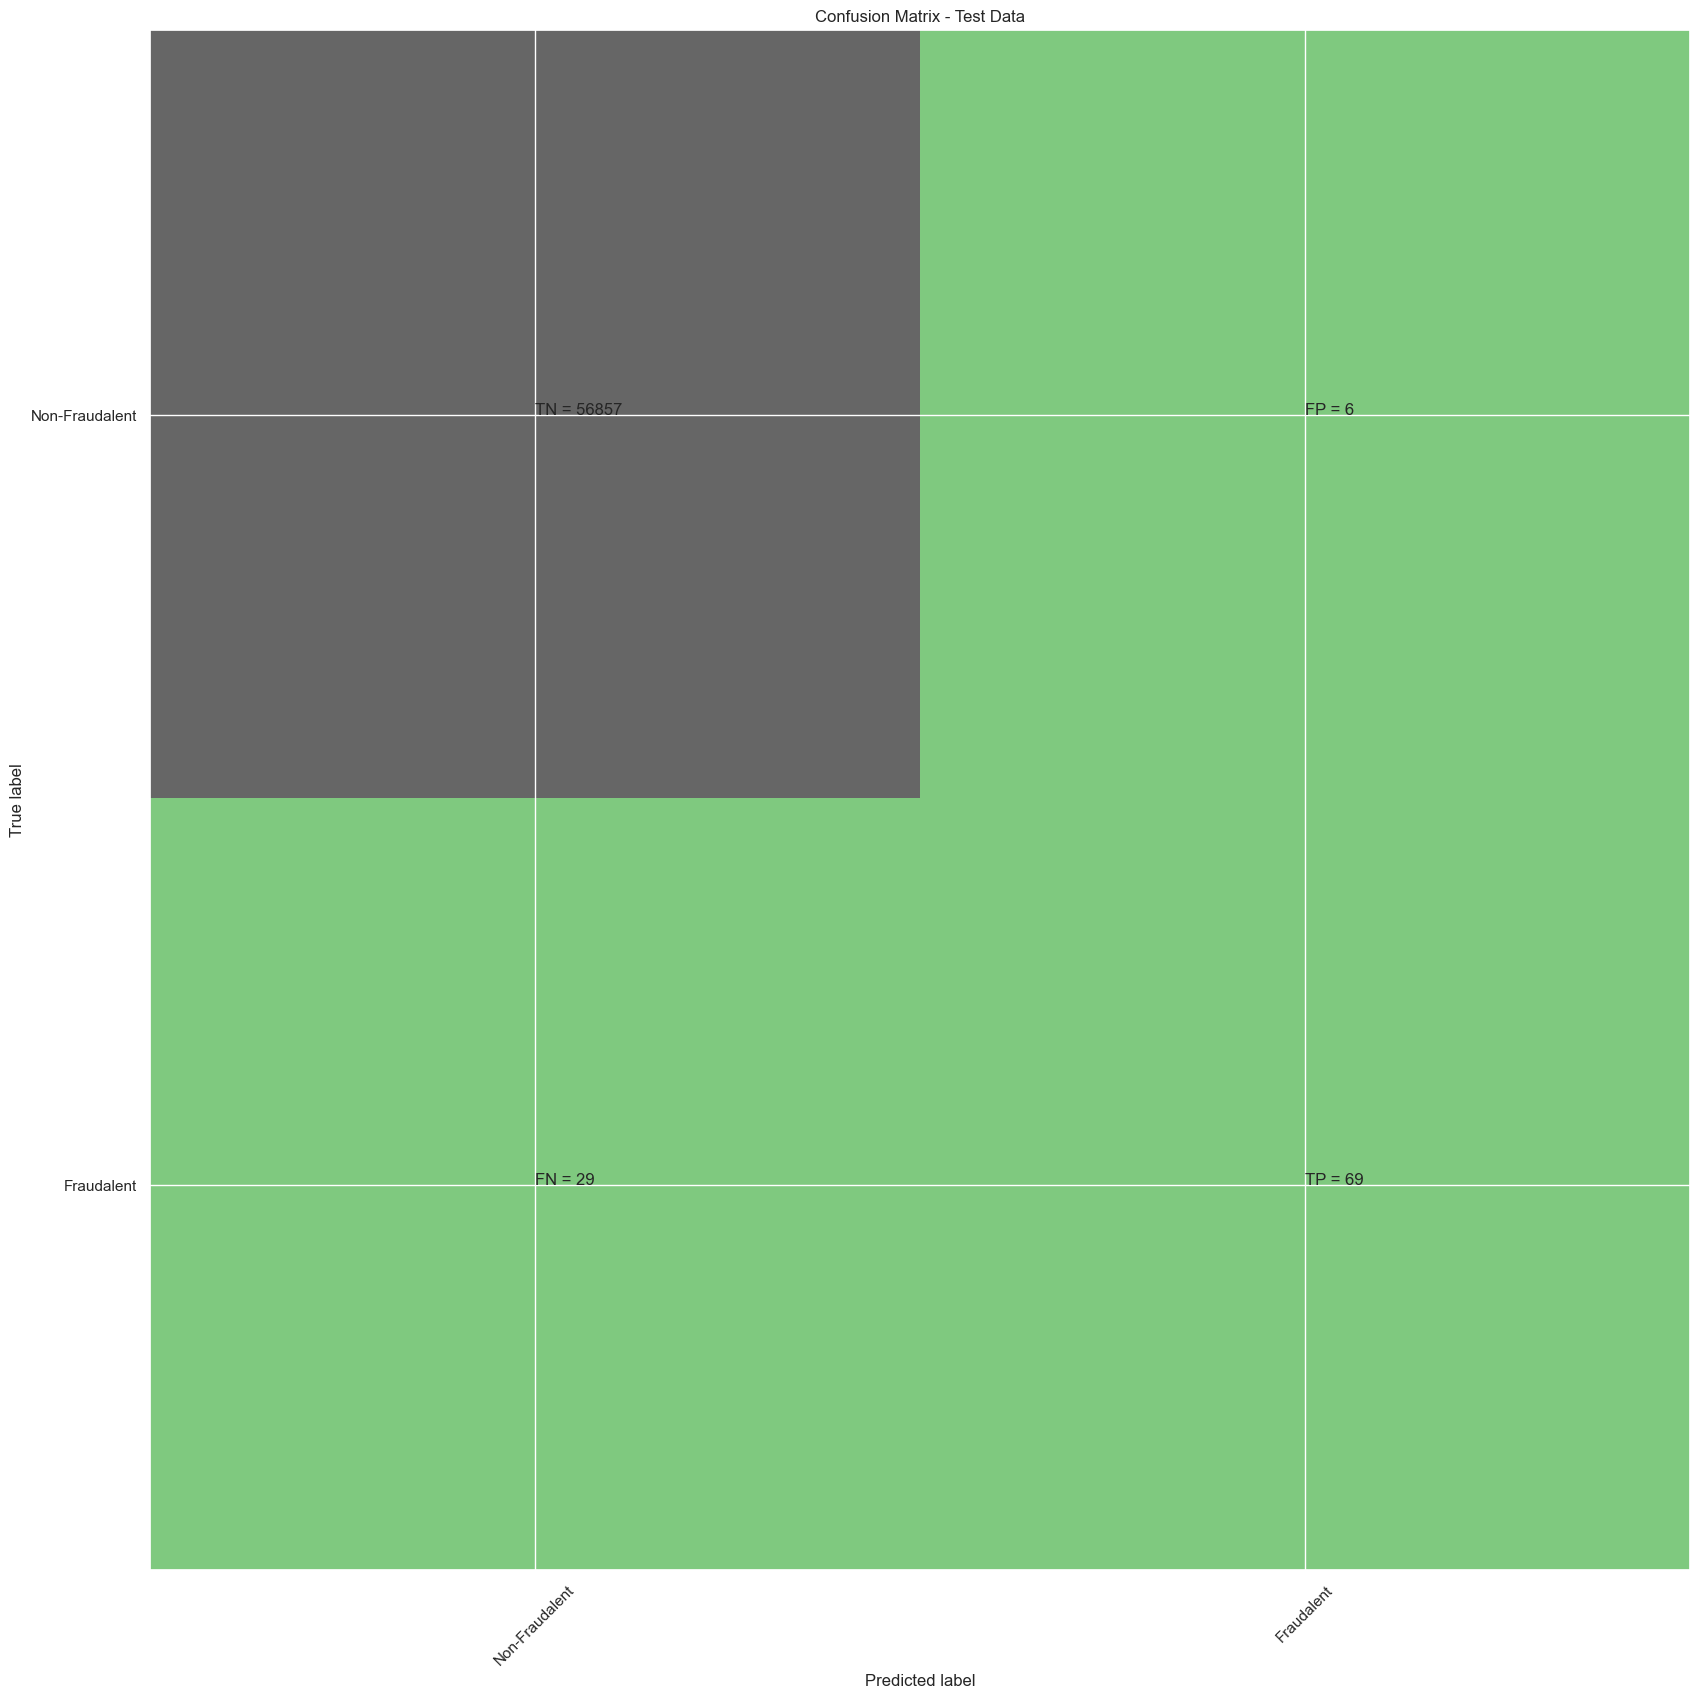

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.70      0.80        98

    accuracy                           1.00     56961
   macro avg       0.96      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9423663104339216
Random Forest threshold: 0.03
ROC for the test dataset 94.2%


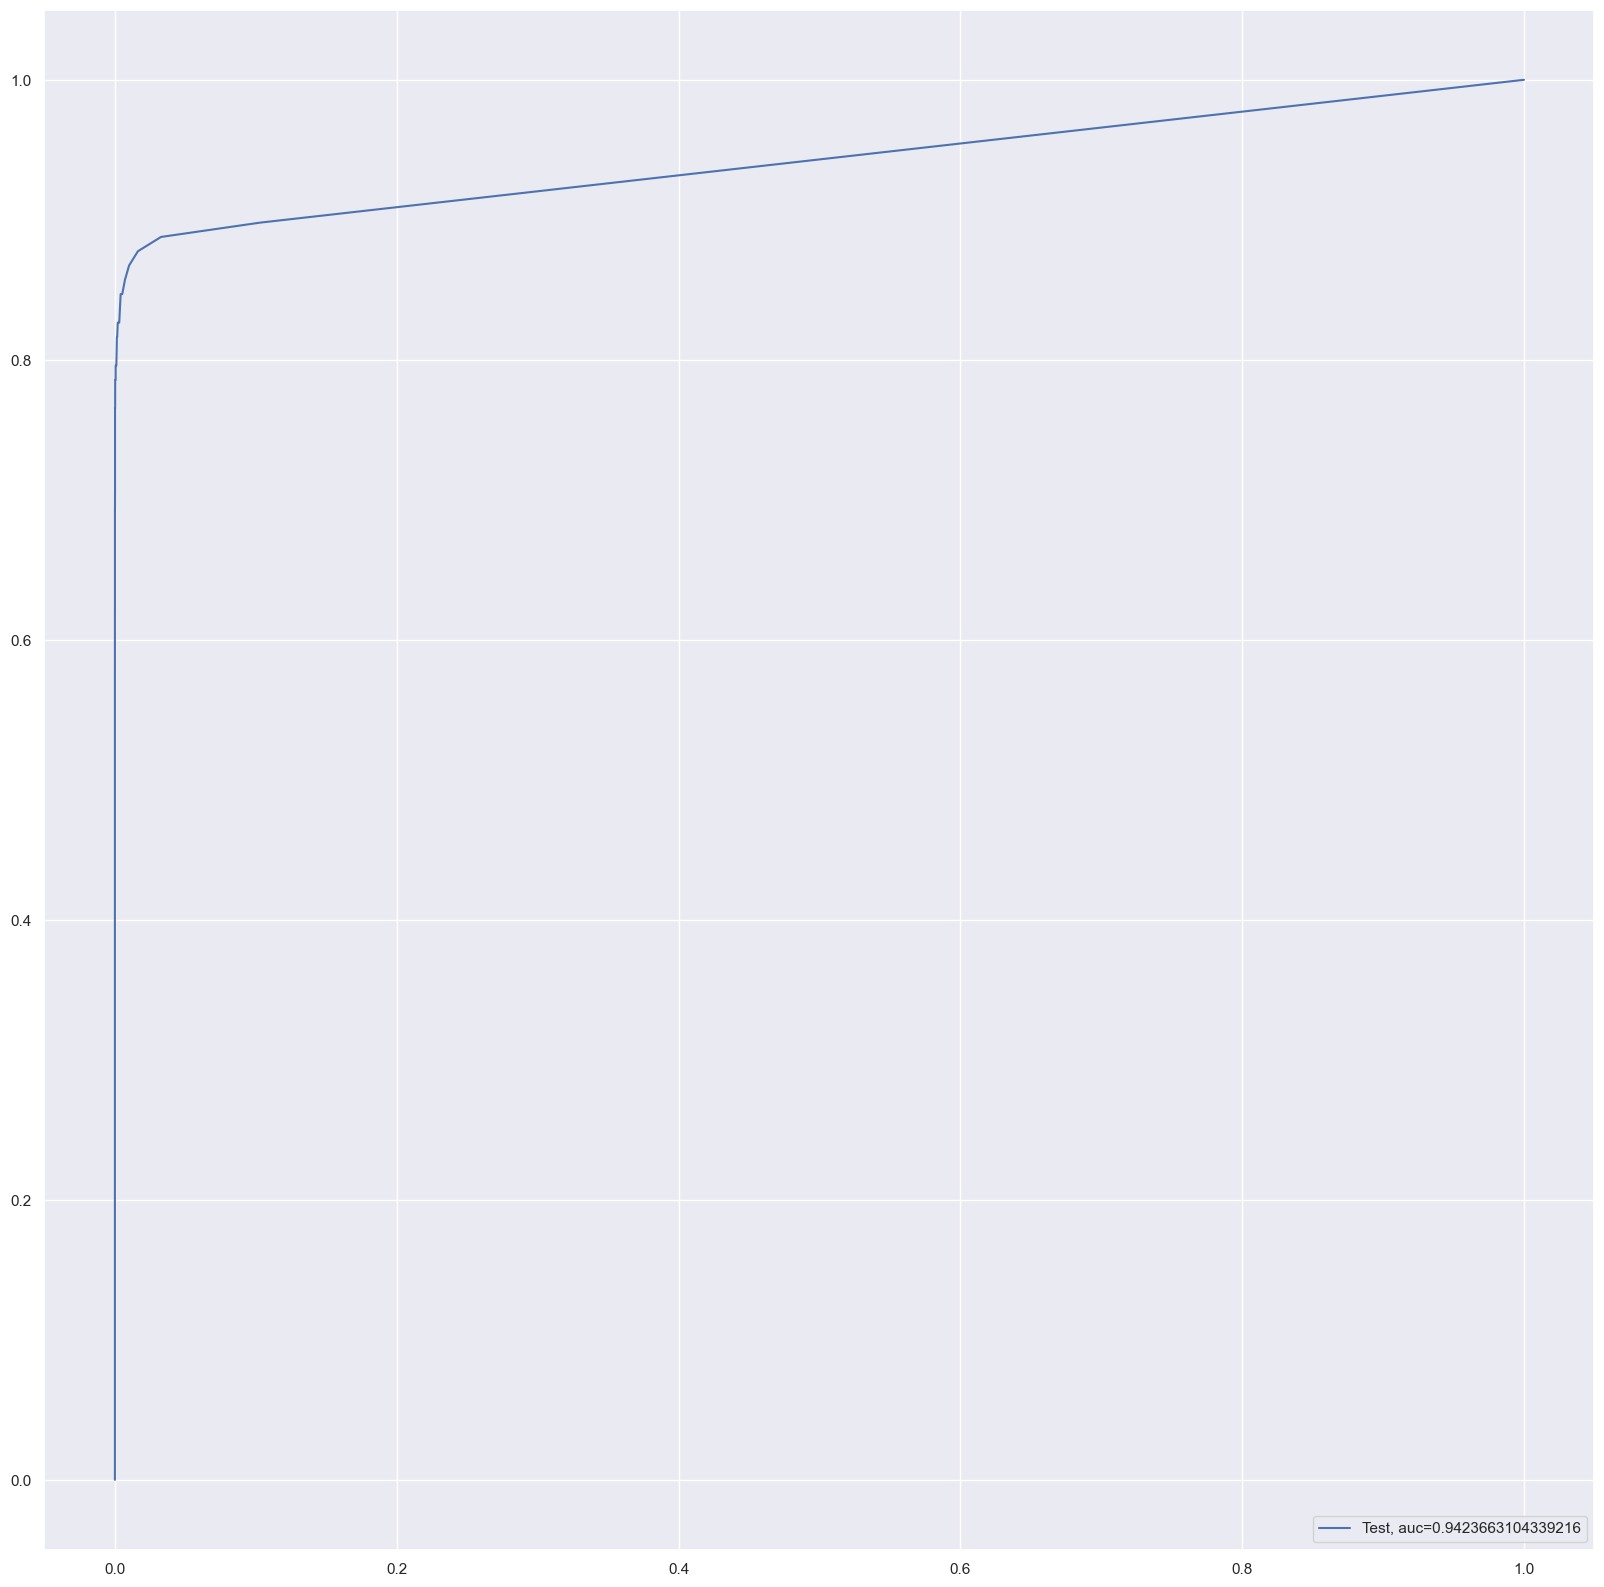

Time Taken by Model: --- 462.0366747379303 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9991046505503766
Confusion Matrix


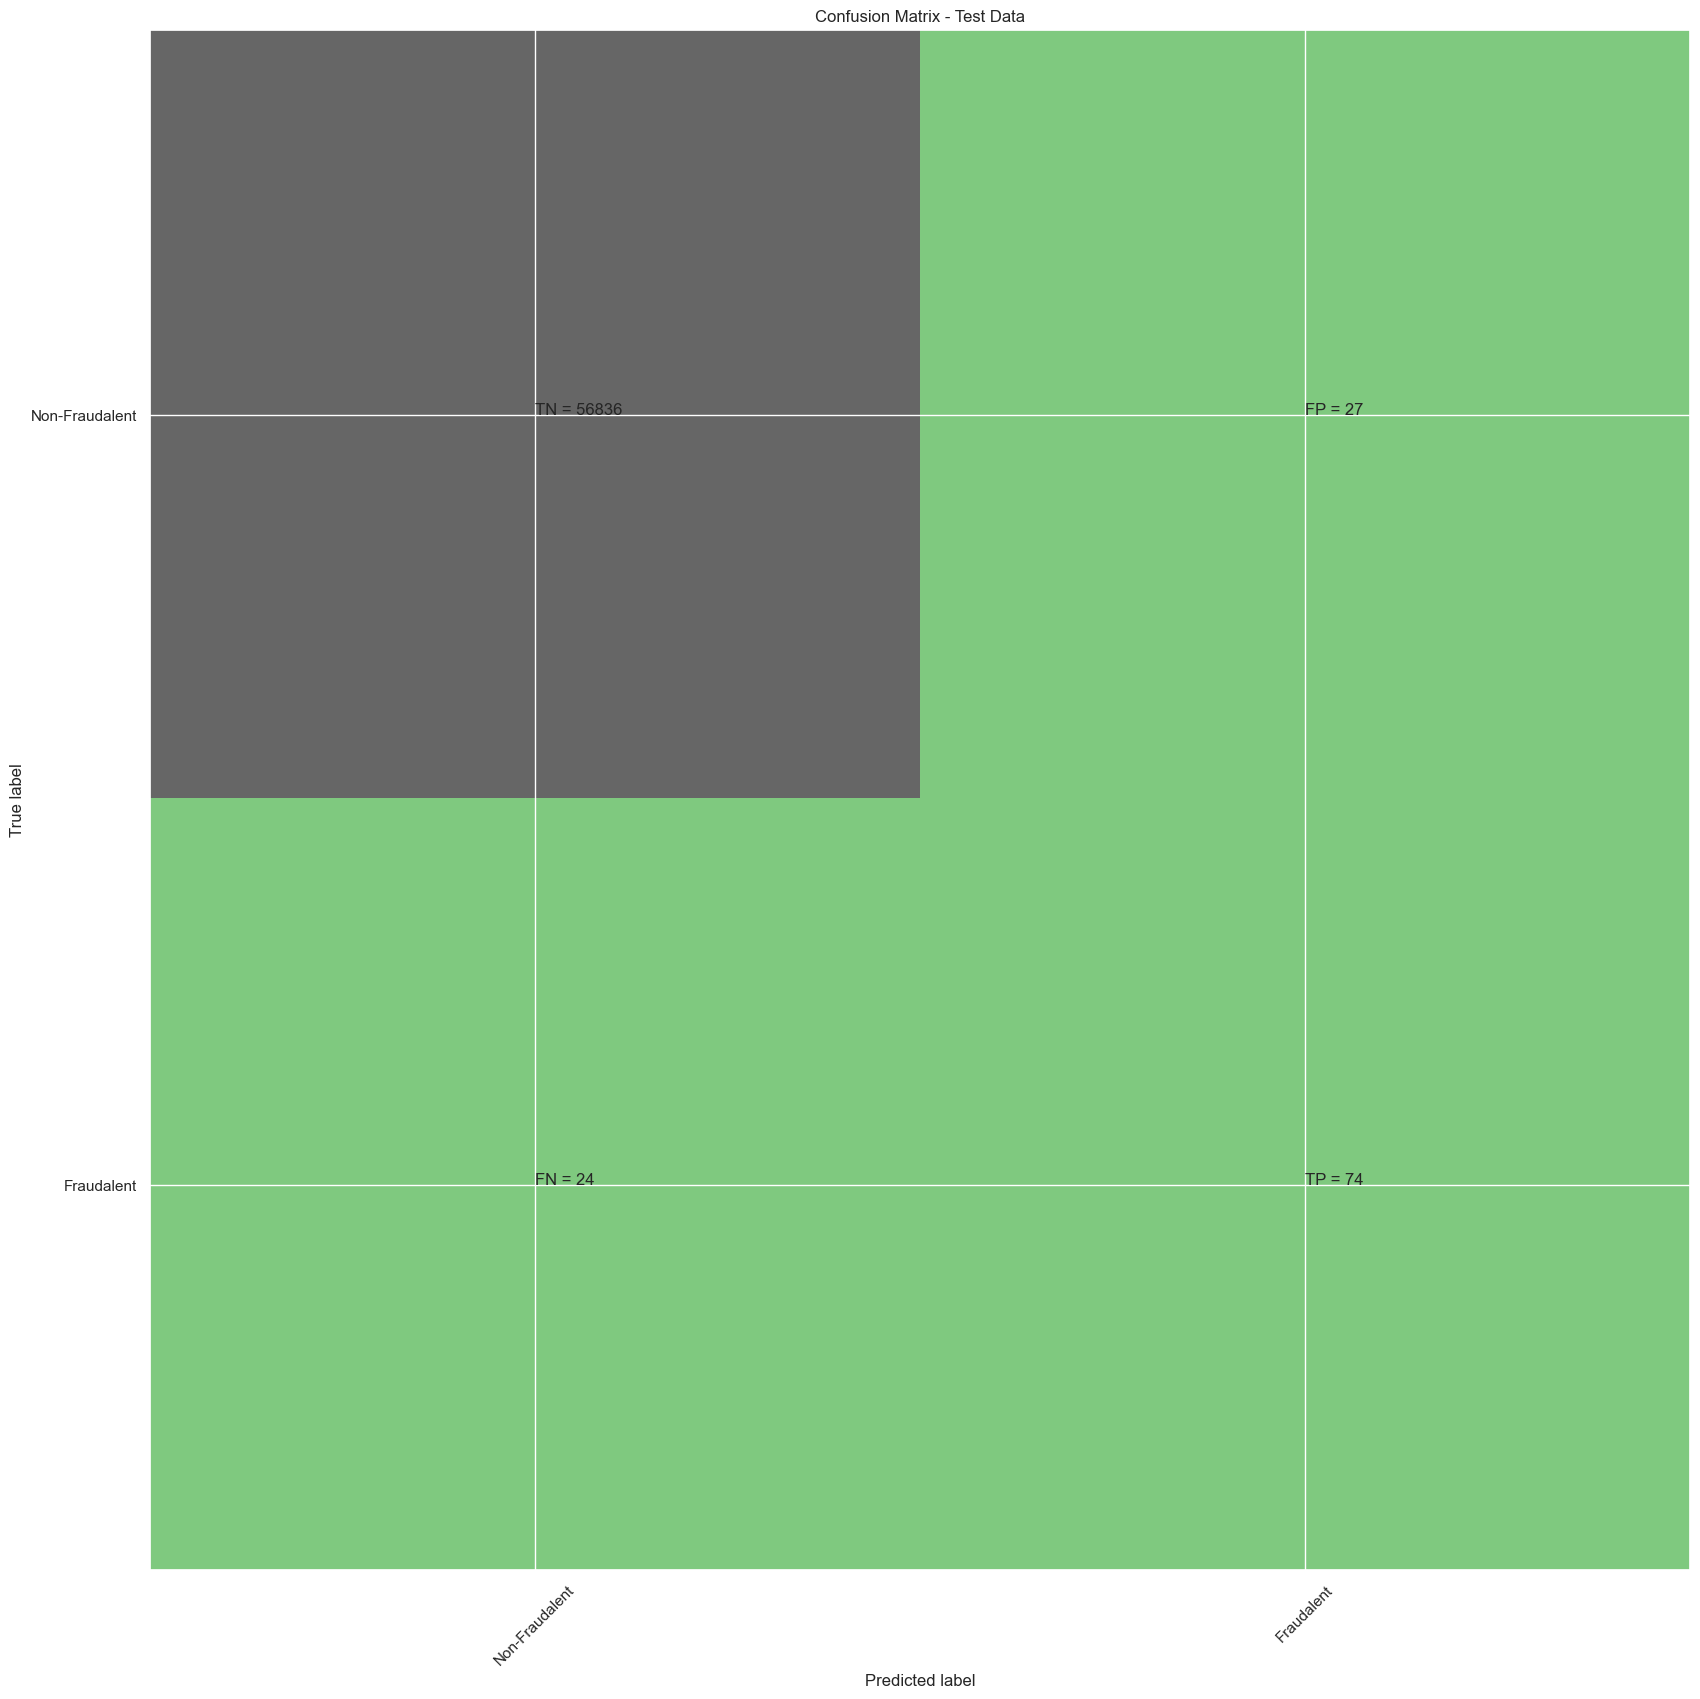

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.73      0.76      0.74        98

    accuracy                           1.00     56961
   macro avg       0.87      0.88      0.87     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9580210150641337
XGBoost threshold: 0.00048074062215164304
ROC for the test dataset 95.8%


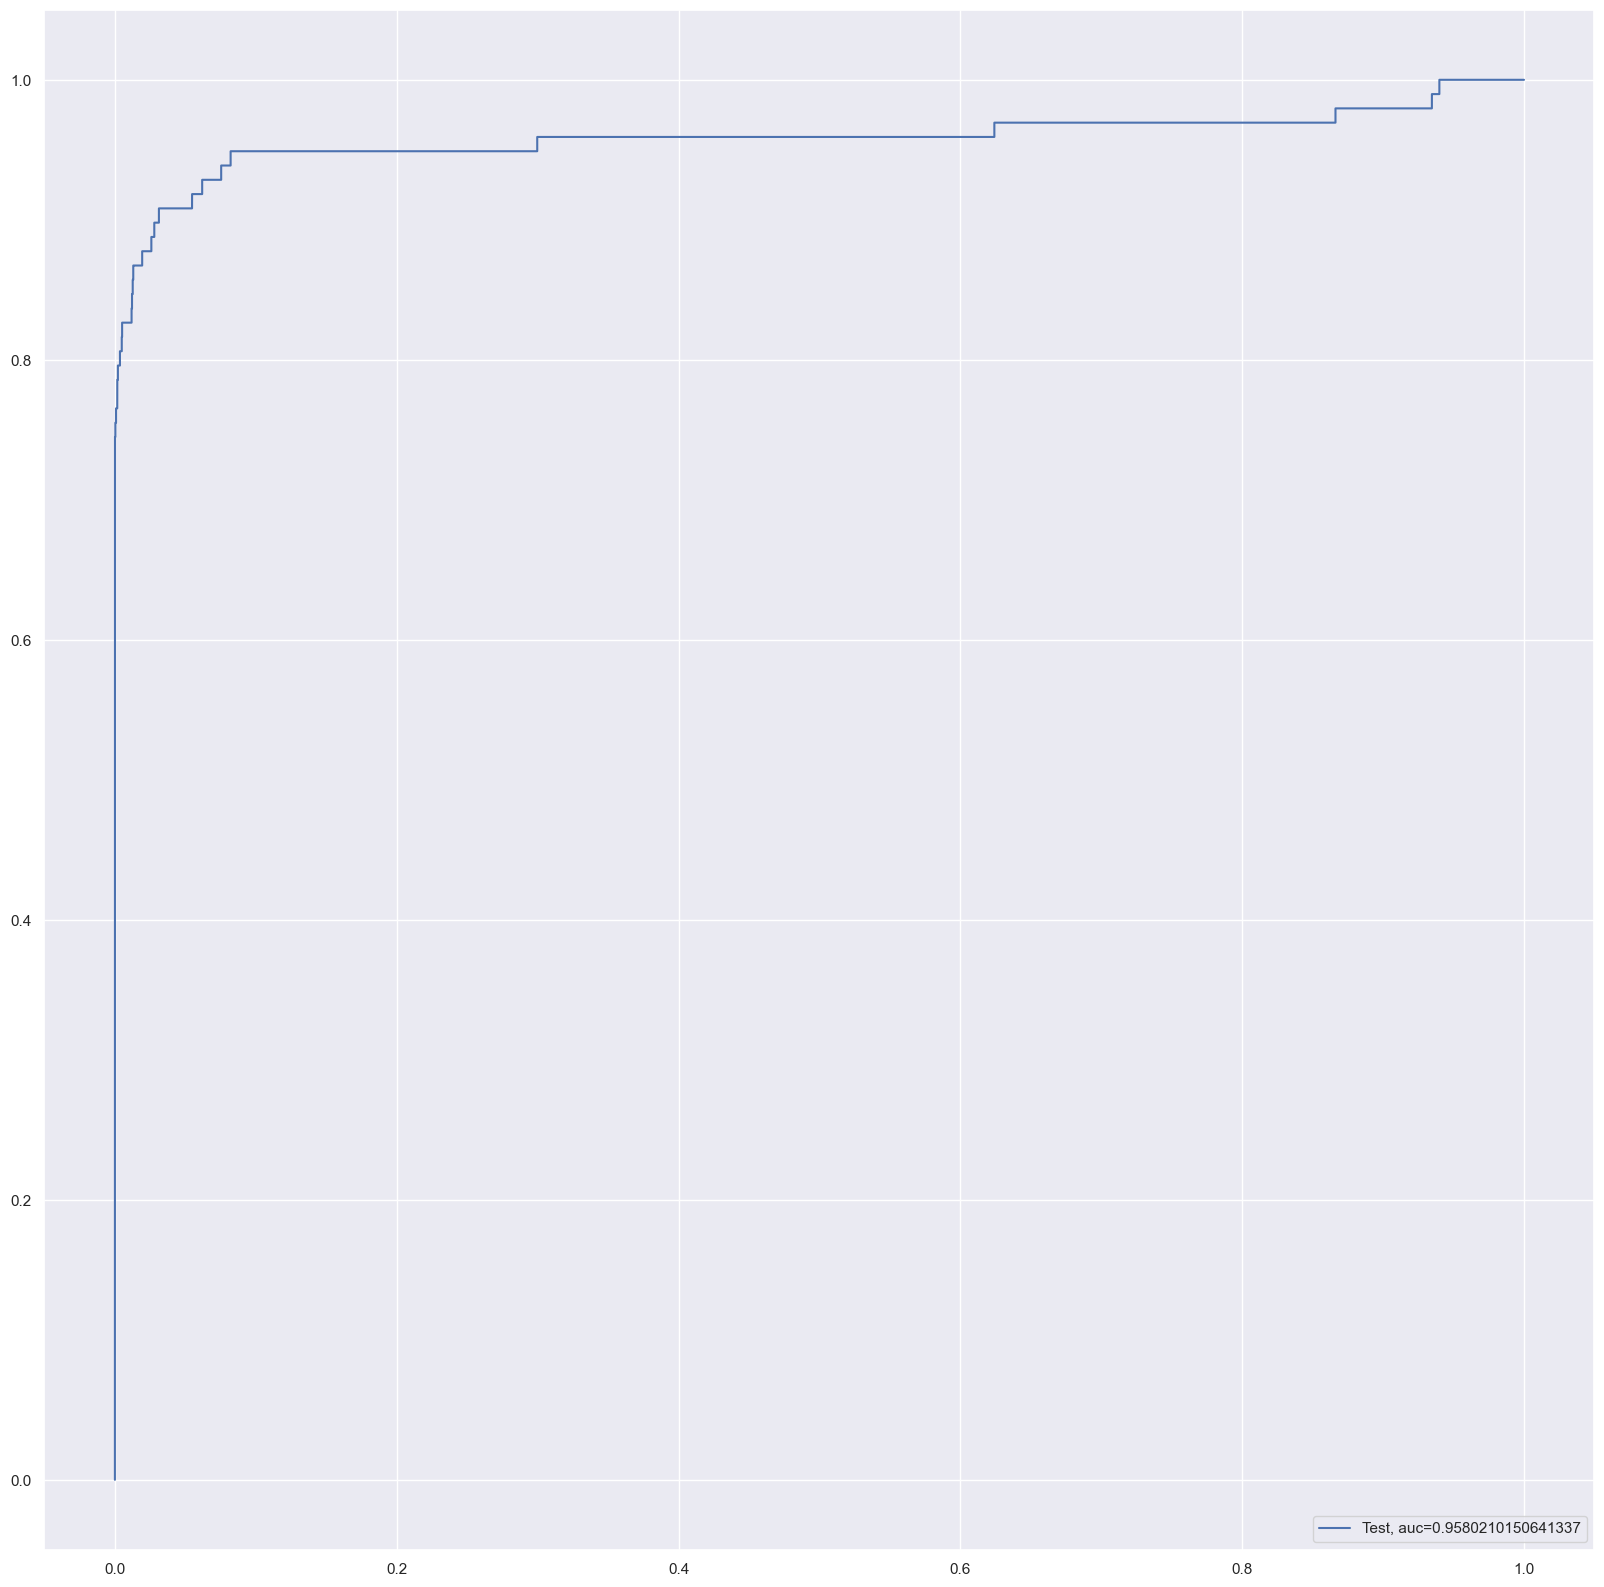

Time Taken by Model: --- 2.871168375015259 seconds ---
--------------------------------------------------------------------------------


In [163]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [164]:
pd.DataFrame(df_Results)

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966307,0.001029
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971547,0.009045
2,Power Transformer,KNN,0.999350,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998999,0.874710,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000
5,Power Transformer,Random Forest,0.999350,0.925014,0.010000
6,Power Transformer,XGBoost,0.999421,0.972360,0.000036
7,Power Transformer,SVM,0.998578,0.887620,0.000766
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.999140,0.987091,0.001703
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999175,0.952205,0.011447


## Results for ADASYN  Oversampling: 

Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

## Overall conclusion after running models on Oversampled data: 

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results


## But looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

#Parameter Tuning for Final Model by Handling class imbalance

In [174]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_ADASYN, y_train_ADASYN)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9991046505503766
XGboost roc_value: 0.9580210150641337
XGBoost threshold: 0.00048074062215164304


In [175]:
export_model_to_pkl(XGBmodel, 'XGBmodel.pkl')

In [176]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)


In [177]:
#Lets tune XGBoost Model for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train_ADASYN, y_train_ADASYN)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 5.86857262,  5.72915292,  5.77643032,  7.00654311,  7.38743353,
          7.16881943,  9.95886035,  9.31340289,  9.82041245, 12.95006375,
         11.85661063, 12.08107586]),
  'std_fit_time': array([0.157712  , 0.05312547, 0.09022521, 0.05921604, 0.20387068,
         0.13794716, 0.35994865, 0.28576927, 0.16055647, 0.3711629 ,
         0.14748194, 0.42268573]),
  'mean_score_time': array([0.02221947, 0.01882973, 0.0191299 , 0.01875939, 0.01604671,
         0.01820064, 0.01979542, 0.01941471, 0.02133245, 0.01737194,
         0.01831775, 0.01656775]),
  'std_score_time': array([0.00280085, 0.00487765, 0.00661394, 0.00539497, 0.00429763,
         0.0040547 , 0.00764312, 0.00600158, 0.00647023, 0.00310168,
         0.0060526 , 0.01171942]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

### Print the important features of the best model to understand the dataset

In [214]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(n_estimators=130,learning_rate=0.2,subsample=0.3, n_jobs=-1,max_depth: 3, min_child_weight: 1
                              eval_metric='mlogloss',use_label_encoder=False)
XGBmodel.fit(X_train_ADASYN, y_train_ADASYN)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9985428882412837
XGboost roc_value: 0.9591591050305396
XGBoost threshold: 0.0022794476244598627


Top var = 14
2nd Top var = 4
3rd Top var = 8


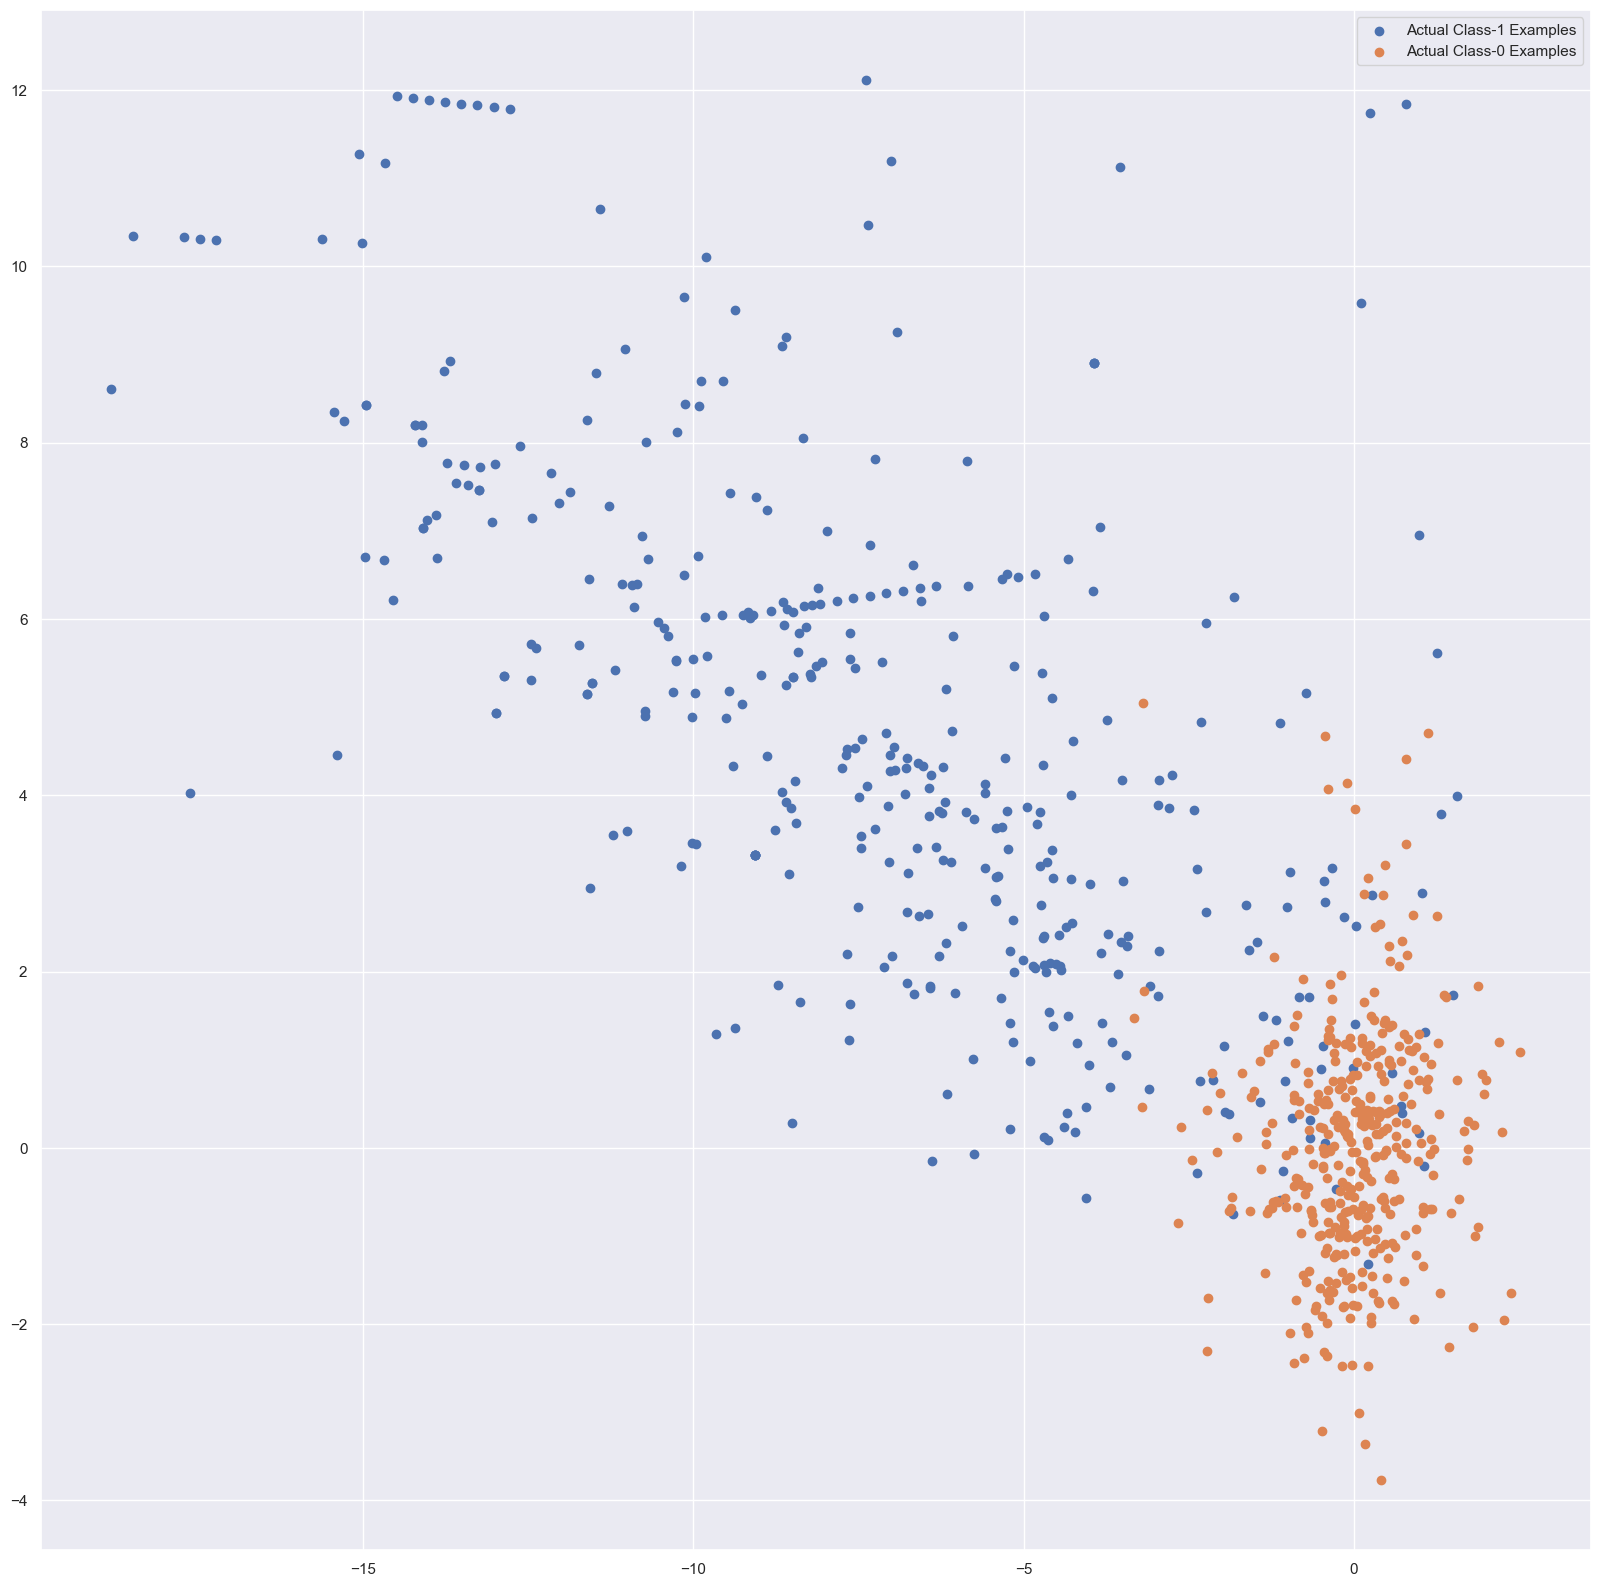

In [215]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [211]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [216]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9591591050305396
XGBoost threshold: 0.0022794476244598627


## Model Selection:
## Overall conclusion after running models on Oversampled data: 

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV 


**Model Accuracy: 0.9985428882412837**

**XGboost roc_value: 0.9591591050305396**

**XGBoost threshold: 0.0022794476244598627**

### We also noticed by looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

